In [ ]:
# # Notes:
# """
# - Data has 8618 entries and 79 columns.
# - Data is stored in sheet 1. Column key is stored in sheet 2

# - Misc TODO/Questions to answer:

#     Revenue/order, prem conv rate, std conv rate by time before popup.
#     Revenue/order, prem conv rate, std conv rate by time of day.
#     Revenue/order, prem conv rate, std conv rate by day of week.
#     Revenue/order, prem conv rate, std conv rate by date.
#     Cost matrix for each type of customer
#     Revenue per order of people who responded yes or no to prompt
#     Why is it working for the hiking products
#     Logistic Regression
    

    
    


# """

In [2]:
# Set up environmnet.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from textwrap import wrap
from scipy.stats import mannwhitneyu as MannWhitneyU

# If you are running this for the first time, you will need to run the bellow scripts to correctly augment the data


# # Set pandas to display all columns and rows.
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)


# # Importing data from xlsx file sheets 1 & 2.
# df = pd.read_excel('data.xlsx', sheet_name=0)
# key_df = pd.read_excel('data.xlsx', sheet_name=1)


# # Replacing '(null)' string with NaN's.
# df = df.replace('(null)', np.nan)


# # Changing columns 21,22,23,24 to floats.
# df.iloc[:, 21:25] = df.iloc[:, 21:25].astype('float64')


# # Adding a total revenue column to df.
# df['total_revenue'] = df.iloc[:, 21:25].sum(axis=1)

# # Adding a standard purchase column to df.
# df['standard_purchase'] = df['purchase_flag']*(1-df['upgrade_and_purchase']) # 1 where purchased is 1 and premium is 0

# # Reverting products 1 - 4 back to null strigns
# df.iloc[:, 13:17] = df.iloc[:, 13:17].fillna('null_str')

# # Adding columns for purchased product type
# products = ['HIKE','COOK','FOOD','SOCKS','WTR','BAG','LEADER','RUN','MULTISLP','PERF']

# for prod in products:
#     df[f'bought_{prod}'] = df.iloc[:, 13:17].applymap(lambda x: prod in x).any(1).astype(int)

# # Change revenue nans to 0 integers and units nans to 0 intigers
# df.iloc[:, 17:25] = df.iloc[:, 17:25].fillna(0)

# # Add dummy columns for os family and state to df
# os_dummies = pd.get_dummies(df['operating_system_family'])
# df = pd.concat([df, os_dummies], axis=1, sort=False)
# state_dummies = pd.get_dummies(df['user_State'])
# df = pd.concat([df, state_dummies], axis=1, sort=False)


# # Saving DataFrames as csv files.
# df.to_csv('data.csv')
# key_df.to_csv('key.csv')


# Reading CSV's as DataFrames (load faster than xlsx)
df = pd.read_csv('data.csv', index_col = 0)
key_df = pd.read_csv('key.csv', index_col = 0)

# # Script to add the type of each column of as a col to key_df
# key_list = []
# for num in range(80):
#     key_list.append(str(type(df.iloc[0,num])))

# key_df['Type'] = pd.DataFrame(key_list)

# Exploratory Data Analysis

### Histograms


##### Visit Number

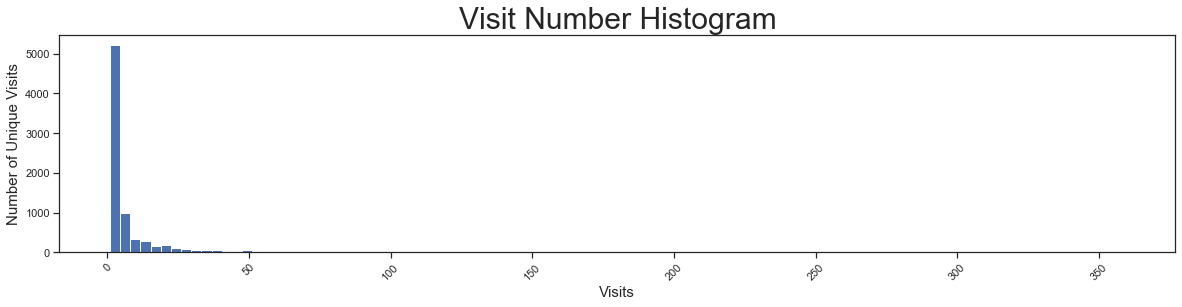

The above figure shows that the vast majority of the site visits of each user were 25 or less


In [3]:
# Removing outliers from column of interest ('visit_num') using a z score of 2

plt.figure(figsize=(20, 4))
plt.title('Visit Number Histogram',fontsize=30)
plt.xticks(rotation=45)
plt.xlabel('Visits',fontsize=15)
plt.ylabel('Number of Unique Visits',fontsize=15)
plt.hist(df[df['visit_num']<df['visit_num'].median()+2*df['visit_num'].std()]['visit_num'], bins=100)
plt.show()
print('The above figure shows that the vast majority of the site visits of each user were 25 or less')

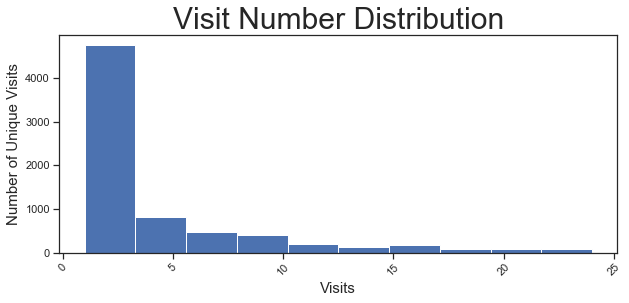

The above figure shows that the vast majority of the site visits of each user were 25 or less


In [4]:
# Removing outliers from column of interest ('visit_num') using a z score of 2

plt.figure(figsize=(10, 4))
plt.title('Visit Number Distribution',fontsize=30)
plt.xticks(rotation=45)
plt.xlabel('Visits',fontsize=15)
plt.ylabel('Number of Unique Visits',fontsize=15)
plt.hist(df[df['visit_num']<25]['visit_num'], bins=10)
plt.show()
print('The above figure shows that the vast majority of the site visits of each user were 25 or less')

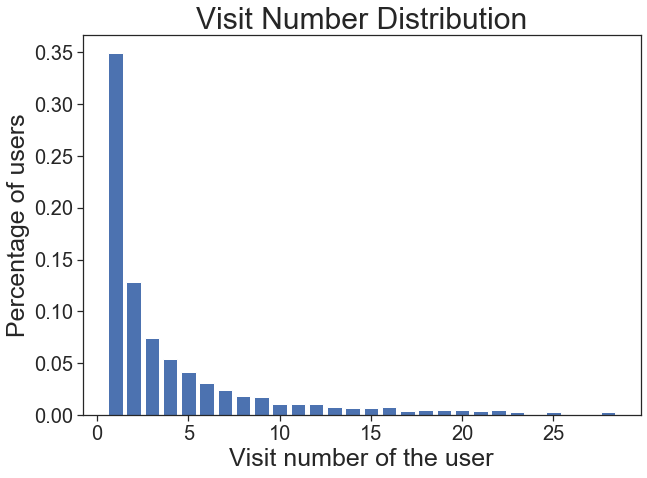

The bar chart above shows that the majority of the users are on their first few visits with the highest on one.


In [219]:
plt.figure(figsize=(10, 7))
plt.title('Visit Number Distribution',fontsize=30)
plt.xlabel('Visit number of the user',fontsize=25)
plt.ylabel('Percentage of users',fontsize=25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.bar((df['visit_num'].value_counts()[:25]/8618).index, (df['visit_num'].value_counts()[:25]/8618).values)
plt.show()
print('The bar chart above shows that the majority of the users are on their first few visits with the highest on one.')

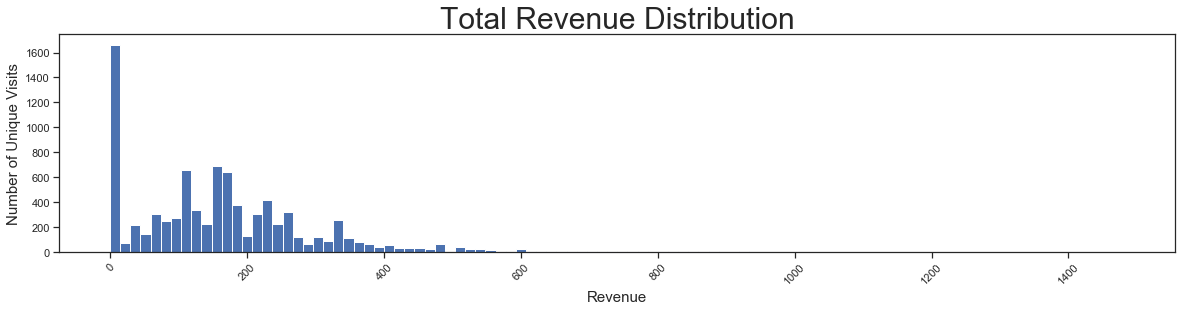

The above figure shows that there is close to a normal distribution of revenue from customers who purchased


In [240]:
# Total revenue histogram
plt.figure(figsize=(20, 4))
plt.title('Total Revenue Distribution',fontsize=30)
plt.xticks(rotation=45)
plt.xlabel('Revenue',fontsize=15)
plt.ylabel('Number of Unique Visits',fontsize=15)
#plt.xlim(right=800)
plt.hist(df['total_revenue'], bins=100)
plt.show()
print('The above figure shows that there is close to a normal distribution of revenue from customers who purchased')

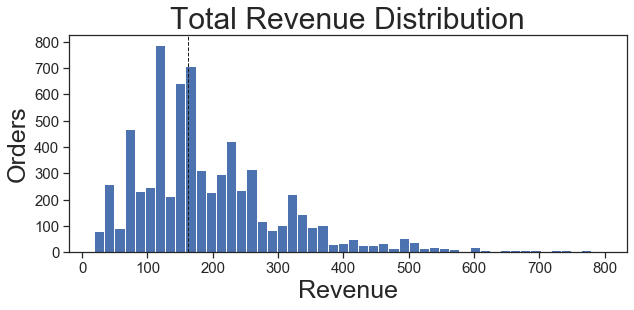

The above figure shows that there is close to a normal distribution of revenue from customers who purchased


In [228]:
# Total revenue histogram
plt.figure(figsize=(10, 4))
plt.title('Total Revenue Distribution',fontsize=30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Revenue',fontsize=25)
plt.ylabel('Orders',fontsize=25)
#plt.xlim(right=800)
plt.hist(df[(df['total_revenue']>0)&(df['total_revenue']<800)]['total_revenue'], bins=50)
plt.axvline(df['total_revenue'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()
print('The above figure shows that there is close to a normal distribution of revenue from customers who purchased')

In [6]:
# Good finding but I want to find the differences in the conversions vs not conversions

In [7]:
# print(df['source_visitor_id'].value_counts(sort=True)[:15])
print('There are only 29 from the 8618 (less than 1%) that had more than 1 row in the frame.')
# print(29/8618)

There are only 29 from the 8618 (less than 1%) that had more than 1 row in the frame.


In [8]:
# Grouped by state DataFrames with all rows(orders and not orders):
grouped_by_state_count_all = df.groupby('user_State').count().sort_values('total_revenue', ascending = False)
grouped_by_state_mean_all = df.groupby('user_State').mean().sort_values('total_revenue', ascending = False)
grouped_by_state_sum_all = df.groupby('user_State').sum().sort_values('total_revenue', ascending = False)

# Grouped by state DataFrames with only placed order rows.
grouped_by_state_count_orders = df[df['purchase_flag']==1].groupby('user_State').count().sort_values('total_revenue', ascending = False)
grouped_by_state_mean_orders = df[df['purchase_flag']==1].groupby('user_State').mean().sort_values('total_revenue', ascending = False)
grouped_by_state_sum_orders = df[df['purchase_flag']==1].groupby('user_State').sum().sort_values('total_revenue', ascending = False)

# Grouped by state looking at conversion rate 


In [9]:
states_over_20 = grouped_by_state_count_orders[grouped_by_state_count_orders['total_revenue']>20].index

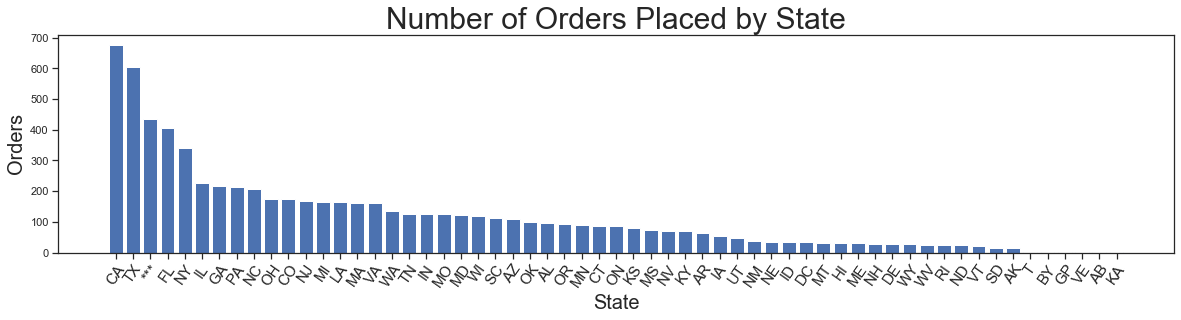

In [121]:
# Bar chart of number of orders placed by state:

plt.figure(figsize=(20, 4))
plt.xticks(rotation=55,fontsize=15)
plt.title('Number of Orders Placed by State',fontsize=30)
plt.xlabel('State',fontsize=20)
plt.ylabel('Orders',fontsize=20)
plt.bar(grouped_by_state_count_orders['total_revenue'].index, grouped_by_state_count_orders['total_revenue'].values)
plt.show()

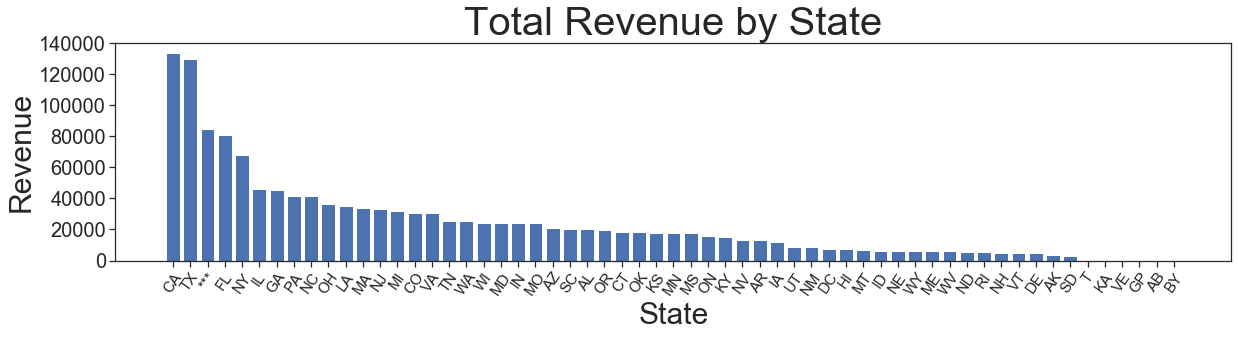

In [229]:
# Bar chart of total revenue by state:

plt.figure(figsize=(20, 4))
plt.xticks(rotation=55, fontsize=15)
plt.yticks(fontsize = 20)
plt.title('Total Revenue by State',fontsize=40)
plt.xlabel('State',fontsize=30)
plt.ylabel('Revenue',fontsize=30)
plt.bar(grouped_by_state_sum_orders['total_revenue'].index, grouped_by_state_sum_orders['total_revenue'].values)
plt.show()

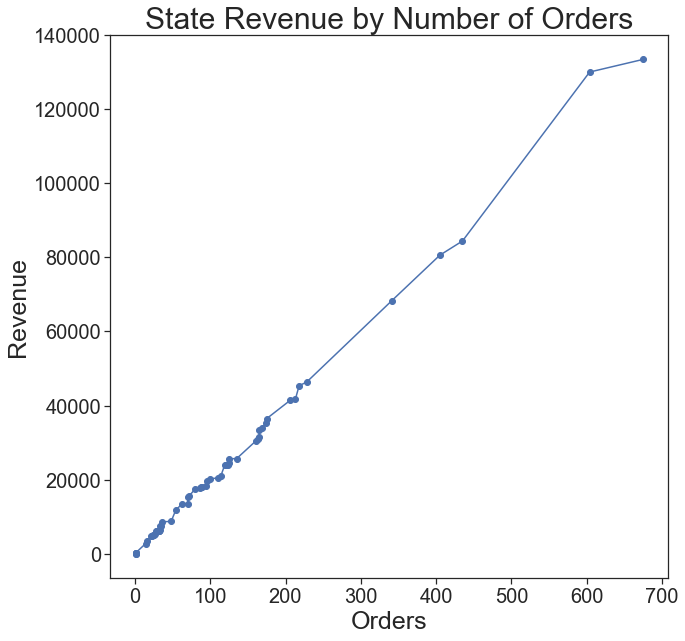

This makes sense, but a sanity check never hurts ;)


In [231]:
# Plot of revenue by state by number of orders placed by that state
plt.figure(figsize=(10,10))
plt.xticks(rotation=0, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.title('State Revenue by Number of Orders',fontsize=30)
plt.xlabel('Orders',fontsize=25)
plt.ylabel('Revenue',fontsize=25)
plt.scatter(grouped_by_state_count_orders['total_revenue'].values,grouped_by_state_sum_orders['total_revenue'].values)
plt.plot(grouped_by_state_count_orders['total_revenue'].values,grouped_by_state_sum_orders['total_revenue'].values)
plt.show()
print('This makes sense, but a sanity check never hurts ;)')

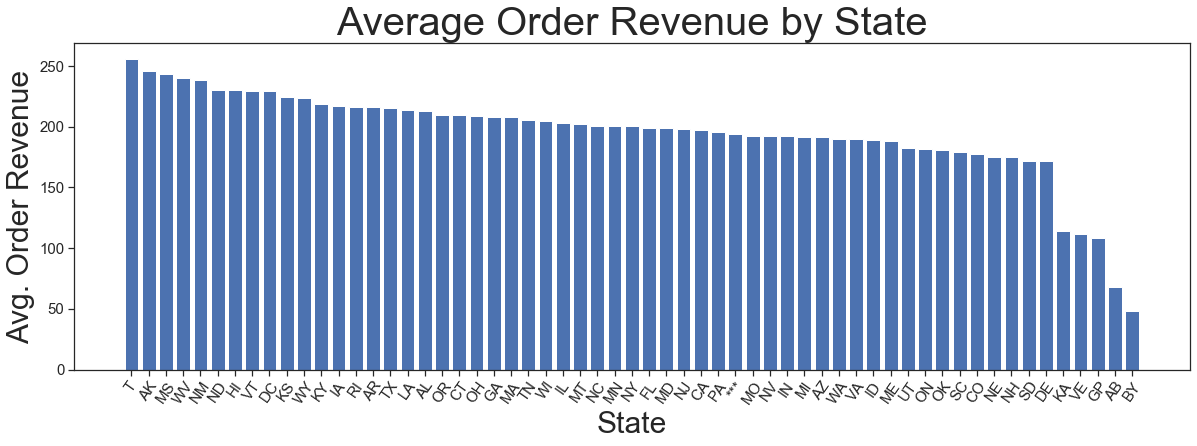

In [234]:
# Bar chart of total revenue by state:

plt.figure(figsize=(20, 6))
plt.xticks(rotation=55, fontsize=15)
plt.yticks(fontsize =15)
plt.title('Average Order Revenue by State',fontsize=40)
plt.xlabel('State',fontsize=30)
plt.ylabel('Avg. Order Revenue',fontsize=30)
plt.bar(grouped_by_state_mean_orders['total_revenue'].index, grouped_by_state_mean_orders['total_revenue'].values)
plt.show()

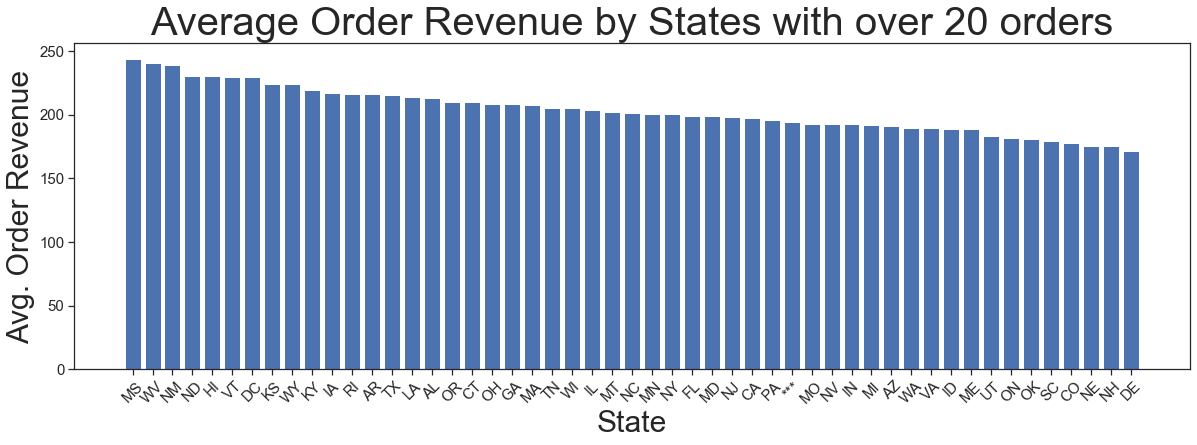

In [237]:
# Bar chart of average revenue per order by states with over 20 orders placed

plt.figure(figsize=(20, 6))
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize = 15)
plt.title('Average Order Revenue by States with over 20 orders',fontsize=40)
plt.xlabel('State',fontsize=30)
plt.ylabel('Avg. Order Revenue',fontsize=30)
plt.bar(grouped_by_state_mean_orders.loc[states_over_20, 'total_revenue'].sort_values(ascending = False).index,
        grouped_by_state_mean_orders.loc[states_over_20, 'total_revenue'].sort_values(ascending = False).values)
plt.show()

# Conversion rate time!

### What is a conversion rate?
A conversion is someone who visits the site and buys a product
A premium conversion is someone who visits the site and upgrades with the prompt given and buys the premium products.

## How do we get the overall conversion rate?

You divide the total users by the ones that made a purchase.

Standard converion: made a not premium

How do we get a premium conversion?

We divide the number of total users by the ones

## Conversion Rates of Loyalty vs Non-Loyalty users

#### Helper Functions Help To Analyze All Columns With One Line Of Code

In [5]:
def total_premium_conversion_rate_binary(column):
    numerator_belongs = df[(df[column]==1)&(df['upgrade_and_purchase']==1)].shape[0]
    denominator_belongs = df[(df[column]==1)].shape[0]
    numerator_not_belongs = df[(df[column]==0)&(df['upgrade_and_purchase']==1)].shape[0]
    denominator_not_belongs = df[(df[column]==0)].shape[0]
    if denominator_belongs == 0: belongs = 0 
    else: belongs = (numerator_belongs/denominator_belongs)
    if denominator_not_belongs == 0: not_belongs = 0 
    else: not_belongs = (numerator_not_belongs/denominator_not_belongs)
    
    return belongs, not_belongs

def total_premium_conversion_rate_binary_pval(column):
    belongs = df[(df[column]==1)]['upgrade_and_purchase']
    not_belongs = df[(df[column]==0)]['upgrade_and_purchase']
    pval = MannWhitneyU(belongs,not_belongs)[1]
    return pval

def said_yes_conversion_rate_binary(column):
    numerator_belongs = df[(df[column]==1)&(df['yes_upgrade_flag']==1)&(df['upgrade_and_purchase']==1)].shape[0]
    denominator_belongs = df[(df[column]==1)&(df['yes_upgrade_flag']==1)].shape[0]
    numerator_not_belongs = df[(df[column]==0)&(df['yes_upgrade_flag']==1)&(df['upgrade_and_purchase']==1)].shape[0]
    denominator_not_belongs = df[(df[column]==0)&(df['yes_upgrade_flag']==1)].shape[0]
    if denominator_belongs == 0: belongs = 0 
    else: belongs = (numerator_belongs/denominator_belongs)
    if denominator_not_belongs == 0: not_belongs = 0 
    else: not_belongs = (numerator_not_belongs/denominator_not_belongs)
    
    return belongs, not_belongs

def said_yes_conversion_rate_binary_pval(column):
    belongs = df[(df[column]==1)&(df['yes_upgrade_flag']==1)]['upgrade_and_purchase']
    not_belongs = df[(df[column]==0)&(df['yes_upgrade_flag']==1)]['upgrade_and_purchase']
    pval = MannWhitneyU(belongs,not_belongs)[1]
    return pval

def total_conversion_rate_binary(column):
    numerator_belongs = df[(df[column]==1)&(df['purchase_flag']==1)].shape[0]
    denominator_belongs = df[(df[column]==1)].shape[0]
    numerator_not_belongs = df[(df[column]==0)&df['purchase_flag']==1].shape[0]
    denominator_not_belongs = df[(df[column]==0)].shape[0]
    if denominator_belongs == 0: belongs = 0 
    else: belongs = (numerator_belongs/denominator_belongs)
    if denominator_not_belongs == 0: not_belongs = 0 
    else: not_belongs = (numerator_not_belongs/denominator_not_belongs)
        
    return belongs, not_belongs 

def total_conversion_rate_binary_pval(column):
    belongs = df[(df[column]==1)]['purchase_flag']
    not_belongs = df[(df[column]==0)]['purchase_flag']
    pval = MannWhitneyU(belongs,not_belongs)[1]
    return pval

def said_no_conversion_rate_binary(column):
    numerator_belongs = df[(df[column]==1)&(df['yes_upgrade_flag']==0)&(df['standard_purchase']==1)].shape[0]
    denominator_belongs = df[(df[column]==1)&(df['yes_upgrade_flag']==0)].shape[0]
    numerator_not_belongs = df[(df[column]==0)&(df['yes_upgrade_flag']==0)&(df['standard_purchase']==1)].shape[0]
    denominator_not_belongs = df[(df[column]==0)&(df['yes_upgrade_flag']==0)].shape[0]
    if denominator_belongs == 0: belongs = 0 
    else: belongs = (numerator_belongs/denominator_belongs)
    if denominator_not_belongs == 0: not_belongs = 0 
    else: not_belongs = (numerator_not_belongs/denominator_not_belongs)
    
    return belongs, not_belongs

def said_no_conversion_rate_binary_pval(column):
    belongs = df[(df[column]==1)&(df['yes_upgrade_flag']==0)]['standard_purchase']
    not_belongs = df[(df[column]==0)&(df['yes_upgrade_flag']==0)]['standard_purchase']
    pval = MannWhitneyU(belongs,not_belongs)[1]
    return pval

def binary_conversion_comparisons(column):
    return [total_premium_conversion_rate_binary(column),
          said_yes_conversion_rate_binary(column),
          total_conversion_rate_binary(column),
          said_no_conversion_rate_binary(column),
          total_premium_conversion_rate_binary_pval(column),
          said_yes_conversion_rate_binary_pval(column),
          total_conversion_rate_binary_pval(column),
          said_no_conversion_rate_binary_pval(column)]

def plot_comparisons(column):
    
    
    names = [f'{column}',f'Non {column}']
    values = binary_conversion_comparisons(column)[:4]
    p_vals = binary_conversion_comparisons(column)[4:]
    titles = [f"Premier CR of {column} vs Non {column}",
              f"Premier CR of {column} vs Non {column} Who Selected 'YES'",
              f"Total CR: Users That Made a Purchase",
              f"Standard CR of {column} vs Non {column} Who Selected 'NO'"]

    fig, axs = plt.subplots(2,2, figsize=(20, 8), sharey=True)

    axs[0,0].bar(names, values[0])
    axs[0,1].bar(names, values[1])
    axs[1,0].bar(names, values[2])
    axs[1,1].bar(names, values[3])
    
    if p_vals[0] <0.001:
        axs[0,0].annotate(f"p value: \n<0.001",xy=(0.425,-.2),xycoords='axes fraction',fontsize=14)
    else: axs[0,0].annotate(f"p value: \n{round(p_vals[0], 5)}",xy=(0.425,-.2),xycoords='axes fraction',fontsize=14)
    if p_vals[1] <0.001:
        axs[0,1].annotate(f"p value: \n<0.001",xy=(0.425,-.2),xycoords='axes fraction',fontsize=14)
    else: axs[0,1].annotate(f"p value: \n{round(p_vals[1], 5)}",xy=(0.425,-.2),xycoords='axes fraction',fontsize=14)
    if p_vals[2] <0.001:
        axs[1,0].annotate(f"p value: \n<0.001",xy=(0.425,-.2),xycoords='axes fraction',fontsize=14)
    else: axs[1,0].annotate(f"p value: \n{round(p_vals[2], 5)}",xy=(0.425,-.2),xycoords='axes fraction',fontsize=14)
    if p_vals[3] <0.001:
        axs[1,1].annotate(f"p value: \n<0.001",xy=(0.425,-.2),xycoords='axes fraction',fontsize=14)
    else: axs[1,1].annotate(f"p value: \n{round(p_vals[3], 5)}",xy=(0.425,-.2),xycoords='axes fraction',fontsize=14)
    
    axs[0,0].set_title("\n".join(wrap(titles[0], 35)), fontsize = 30)
    axs[0,1].set_title("\n".join(wrap(titles[1], 35)), fontsize = 30)
    axs[1,0].set_title("\n".join(wrap(titles[2], 35)), fontsize = 30)
    axs[1,1].set_title("\n".join(wrap(titles[3], 35)), fontsize = 30)

    axs[0,0].tick_params(axis="x", labelsize=22)
    axs[0,1].tick_params(axis="x", labelsize=22)
    axs[1,0].tick_params(axis="x", labelsize=22)
    axs[1,1].tick_params(axis="x", labelsize=22)
    
    axs[0,0].tick_params(axis="y", labelsize=17)
    axs[1,0].tick_params(axis="y", labelsize=17)

    plt.subplots_adjust(hspace=.95)
    return plt.show()


In [6]:
binary_cols = ['First_Visit',
               'loyalty_user',
               'camp_page_flag',
               'hiking__page_flag',
               'kayak_page_flag',
               'run_page_flag',
               'deals_page_flag',
               'winter_page_flag',
               'snow_page_flag',
               'socks+hiking_flag',
               'landpage-hiking',
               'landpage camping',
               'landpage run',
               'loyalty_user',
               'landpage winter',
               'SEO',
               'SEM',
               'login_page_flag',
               'review_order_flag',
               'OpS_Android',
               'OpS_Chrome_OS',
               'OpS_iOS',
               'OpS_Linux',
               'OpS_Mac OS X',
               'OpS_Ubuntu',
               'OpS_Windows 10',
               'OpS_Windows_7',
               'OpS_Windows8',
               'OpS_Windows_8.1',
               'OpS_Windows_Vista',
               'OpS_Windows_XP',
                '***',
                '3',
                '40',
                'AB',
                'AK',
                'AL',
                'AR',
                'AZ',
                'BC',
                'BY',
                'C',
                'CA',
                'CO',
                'CT',
                'DC',
                'DE',
                'DL',
                'ENG',
                'FL',
                'GA',
                'GJ',
                'GP',
                'HI',
                'IA',
                'ID',
                'IL',
                'IN',
                'KA',
                'KS',
                'KY',
                'LA',
                'MA',
                'MD',
                'ME',
                'MI',
                'MN',
                'MO',
                'MS',
                'MT',
                'NC',
                'ND',
                'NE',
                'NH',
                'NJ',
                'NM',
                'NV',
                'NY',
                'OH',
                'OK',
                'ON',
                'OR',
                'OU',
                'OY',
                'PA',
                'QC',
                'RI',
                'SC',
                'SD',
                'T',
                'TA',
                'TN',
                'TX',
                'UT',
                'VA',
                'VE',
                'VLG',
                'VT',
                'WA',
                'WI',
                'WV',
                'WY'
                  ]

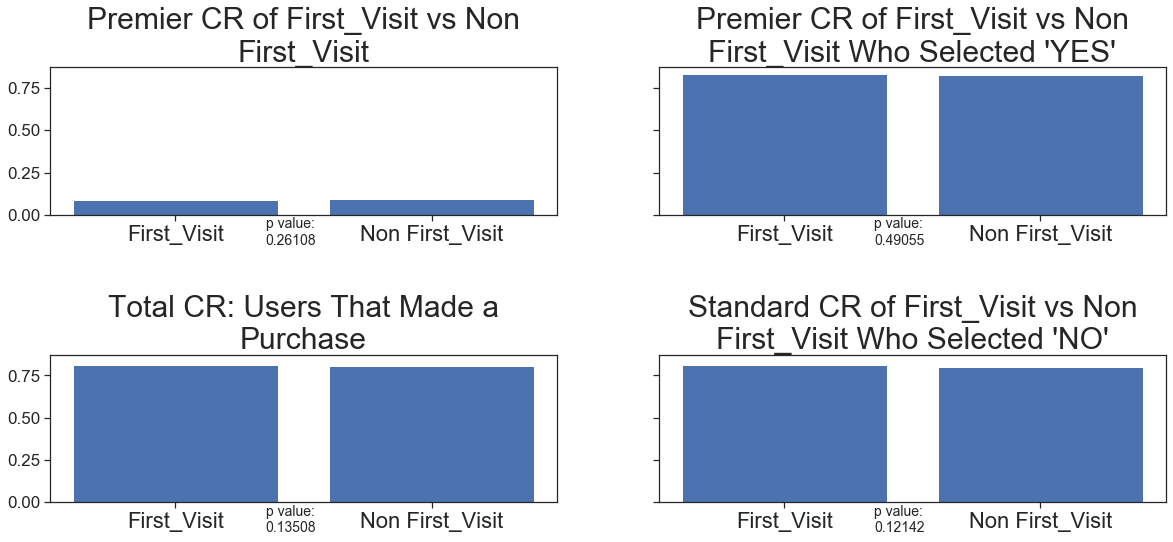

____________________________________________________________________________________________________


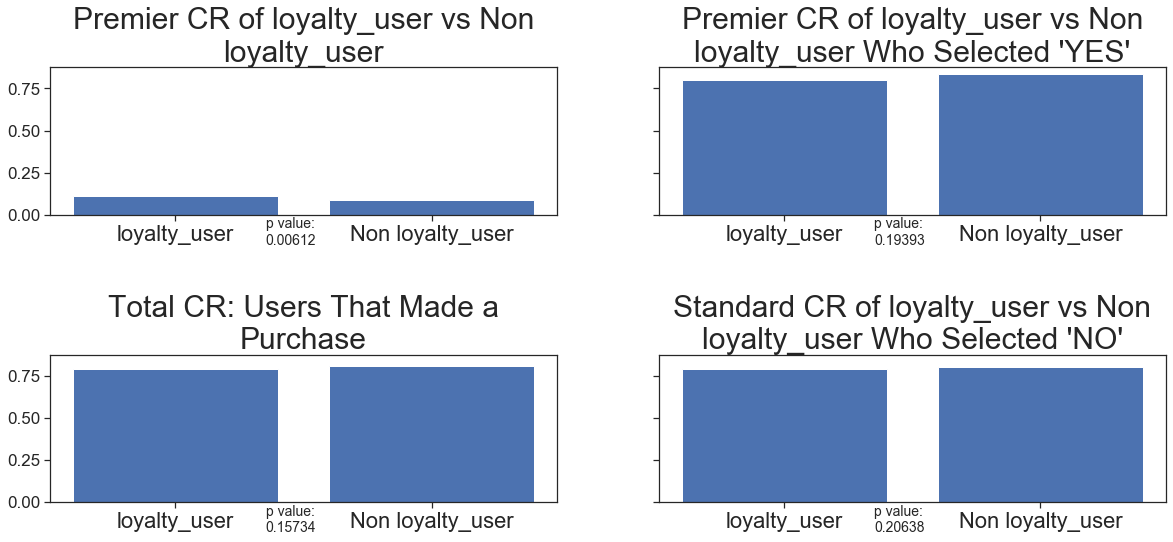

____________________________________________________________________________________________________


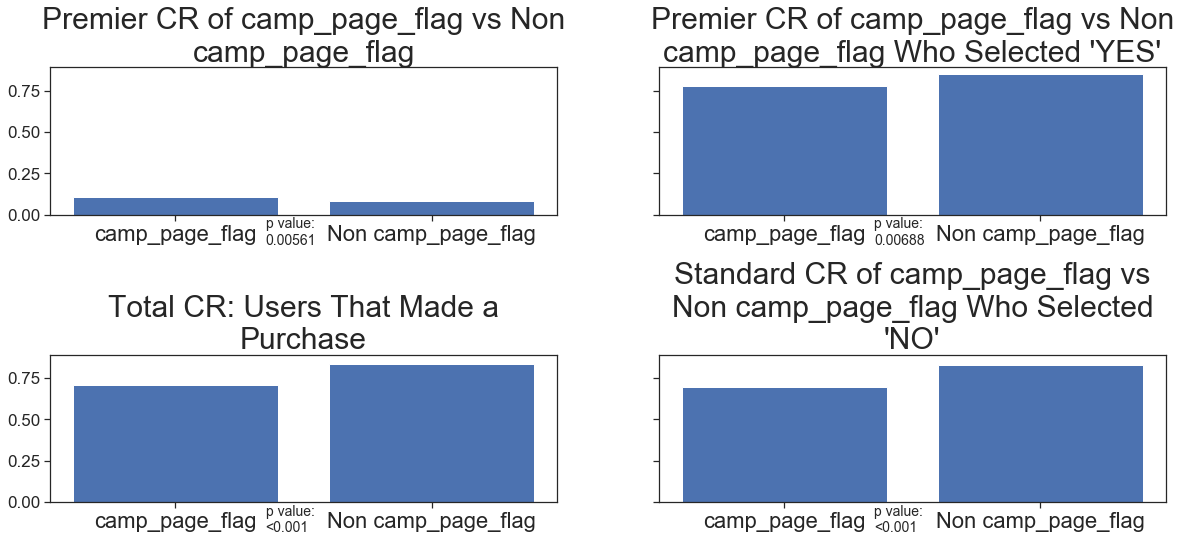

____________________________________________________________________________________________________


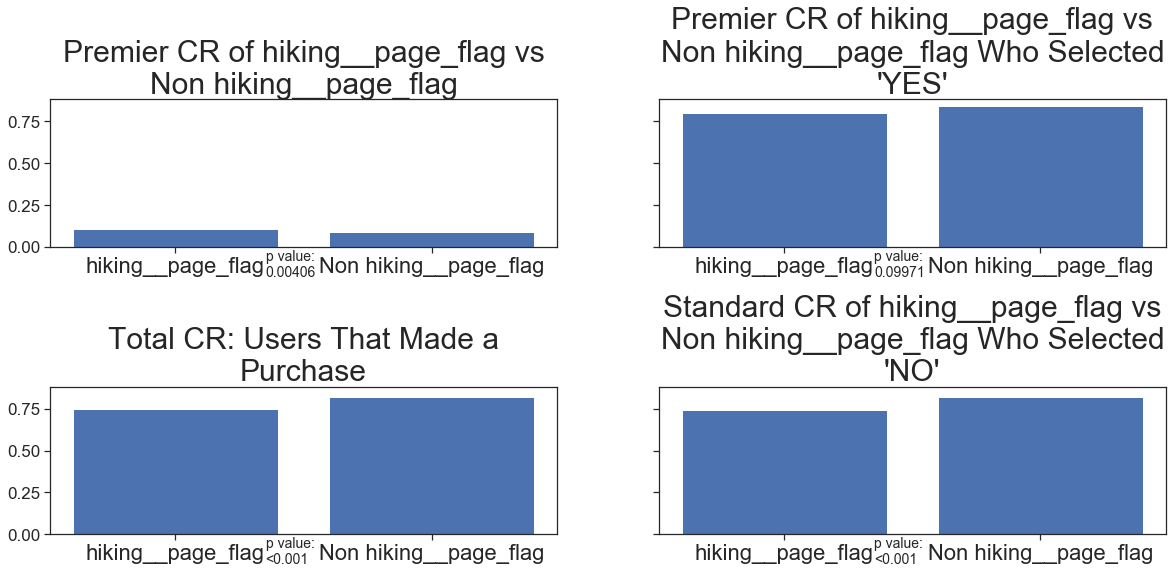

____________________________________________________________________________________________________


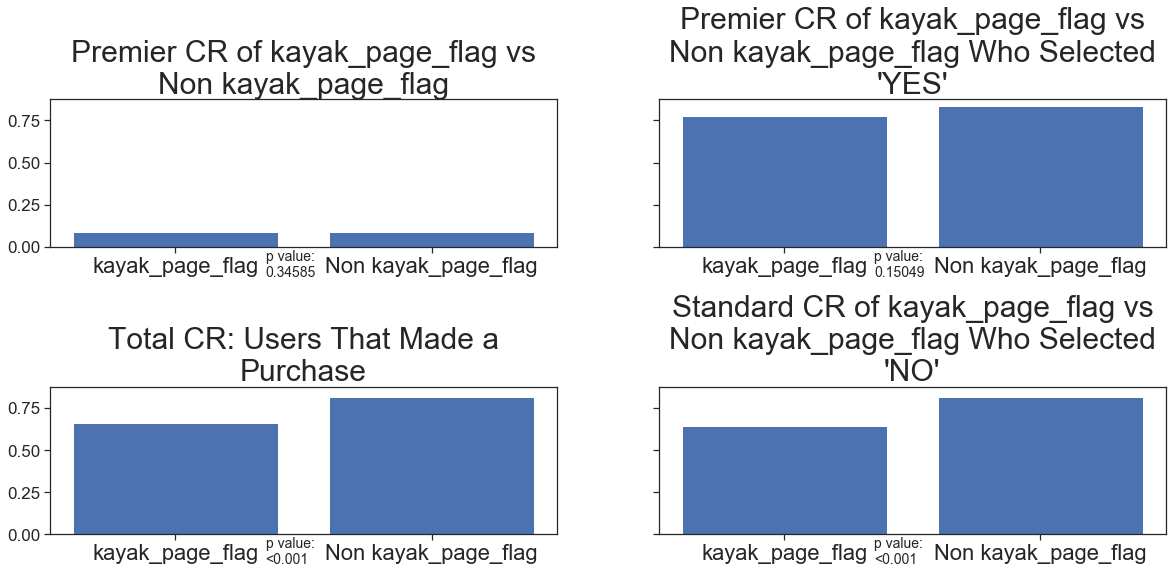

____________________________________________________________________________________________________


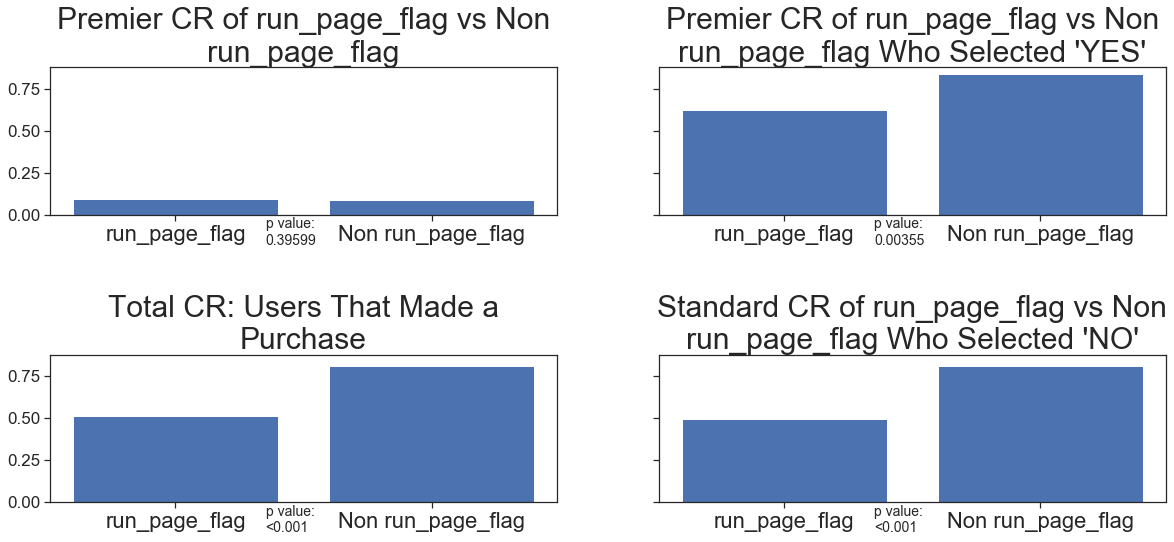

____________________________________________________________________________________________________


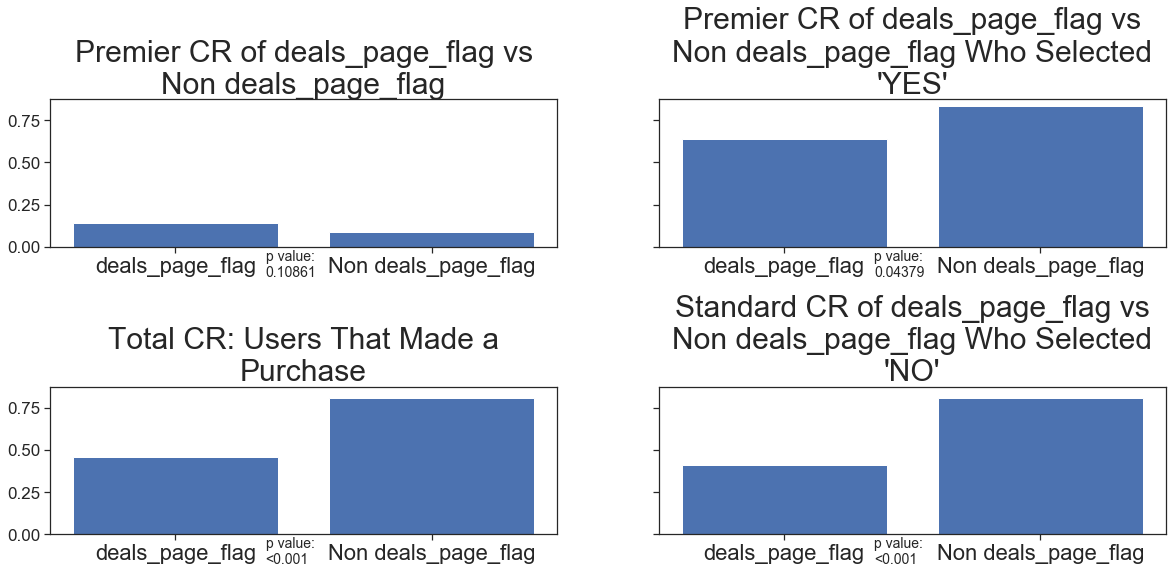

____________________________________________________________________________________________________


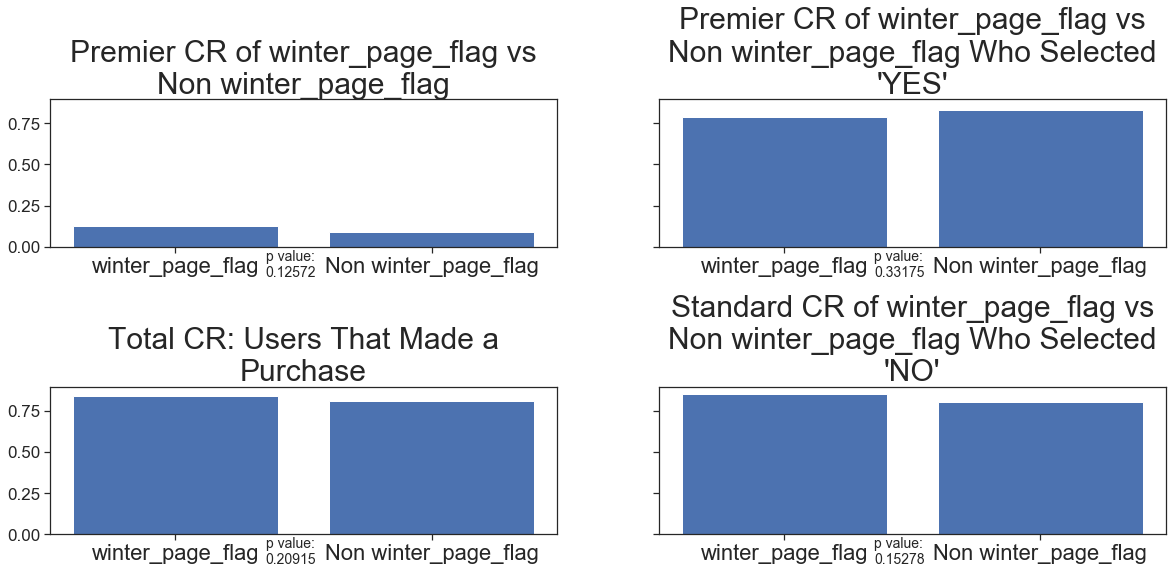

____________________________________________________________________________________________________


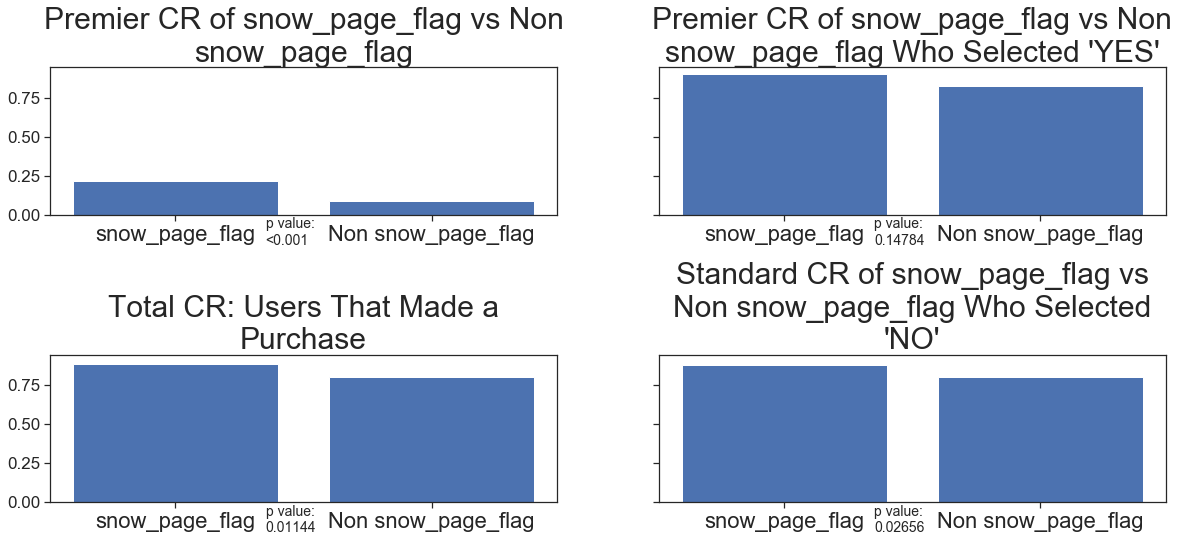

____________________________________________________________________________________________________


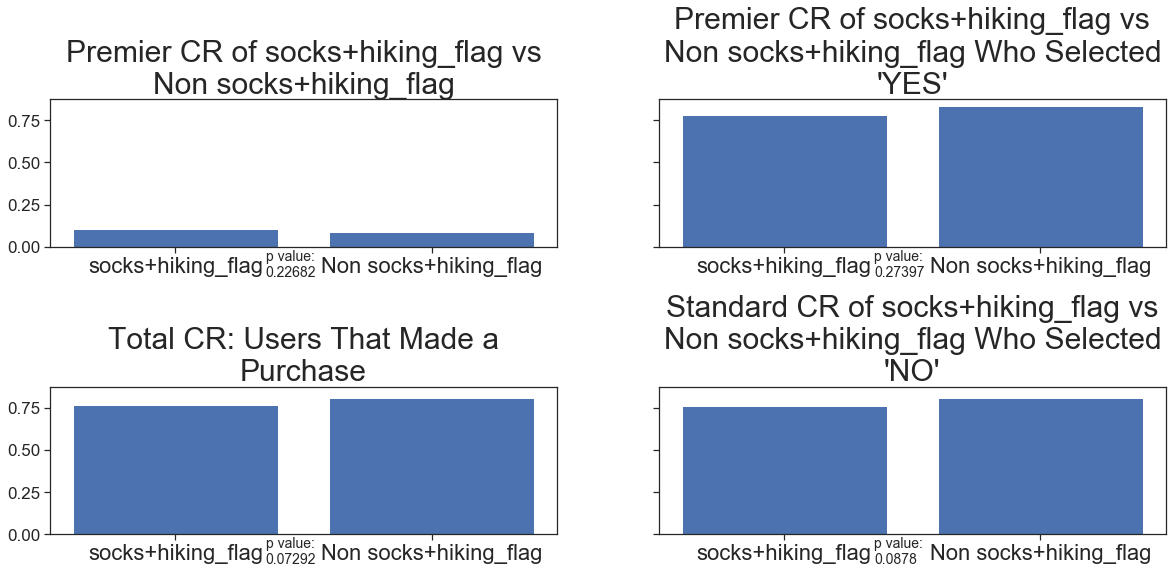

____________________________________________________________________________________________________


/Users/Justin_Turner/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


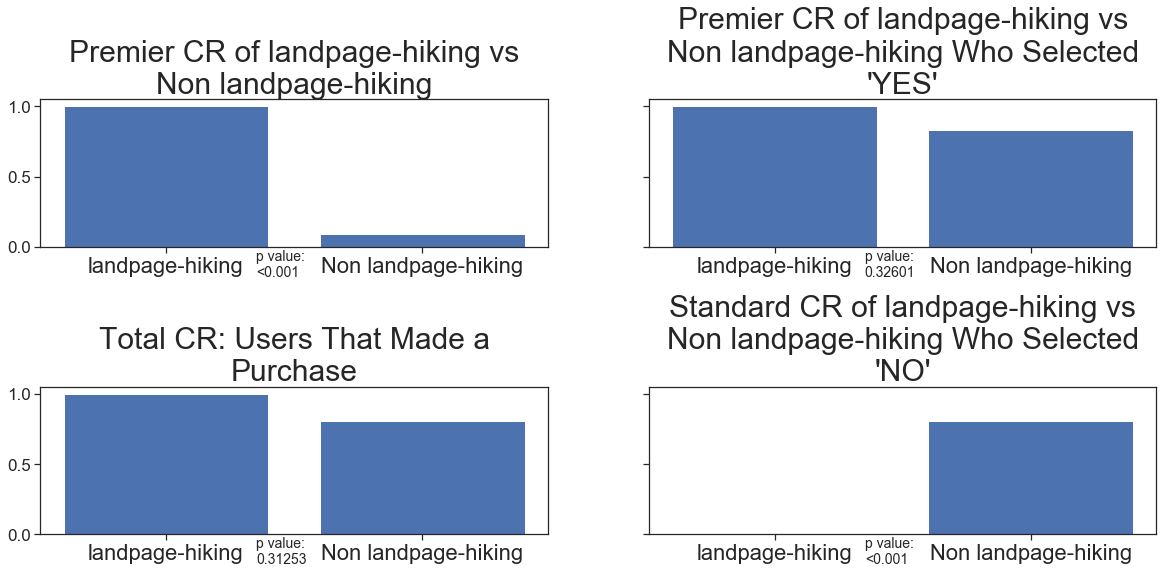

____________________________________________________________________________________________________


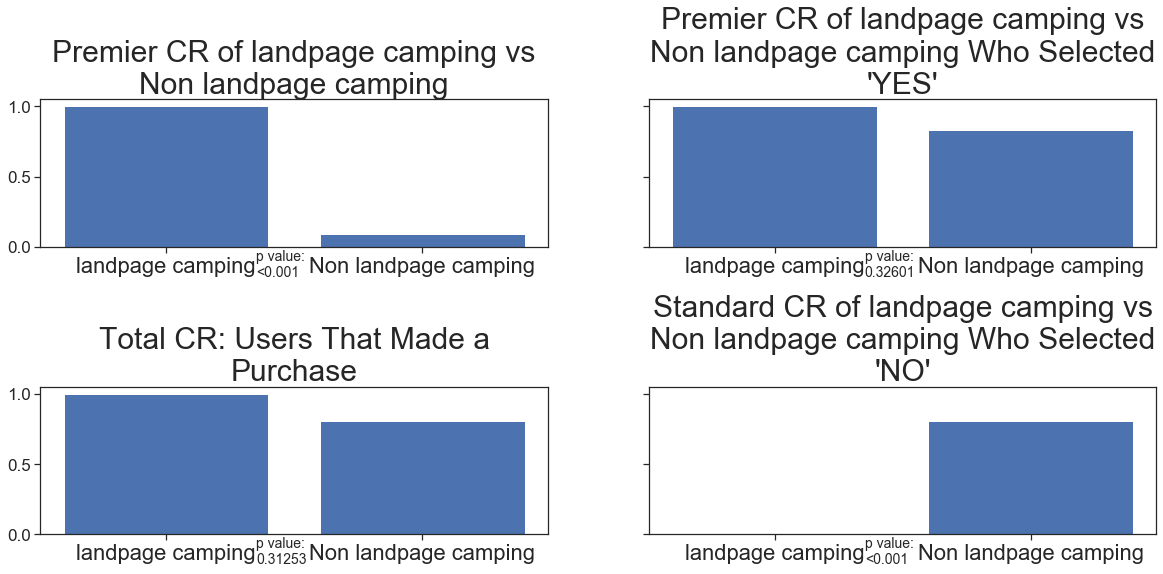

____________________________________________________________________________________________________


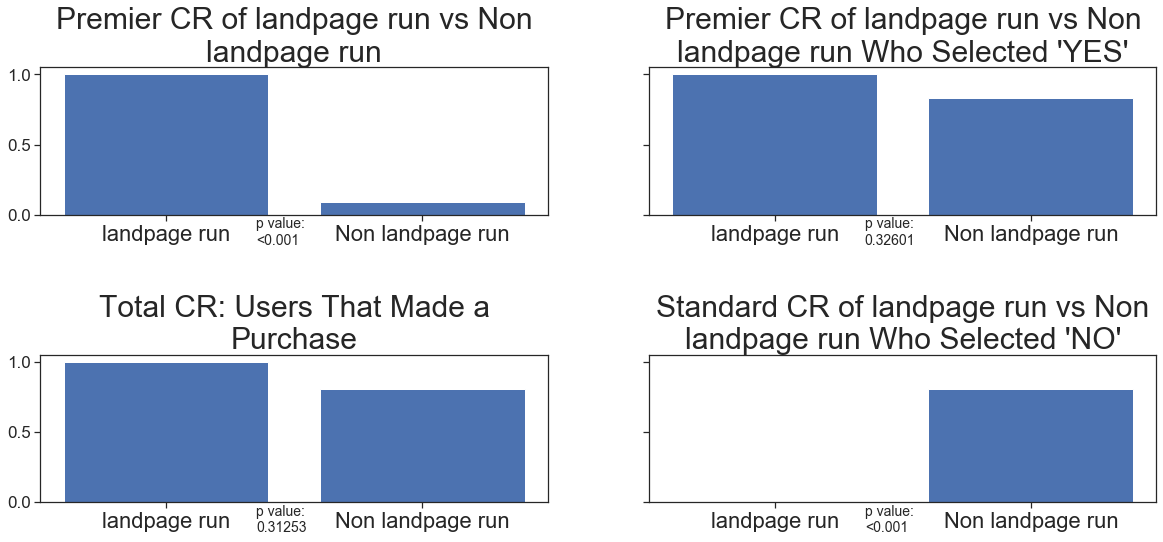

____________________________________________________________________________________________________


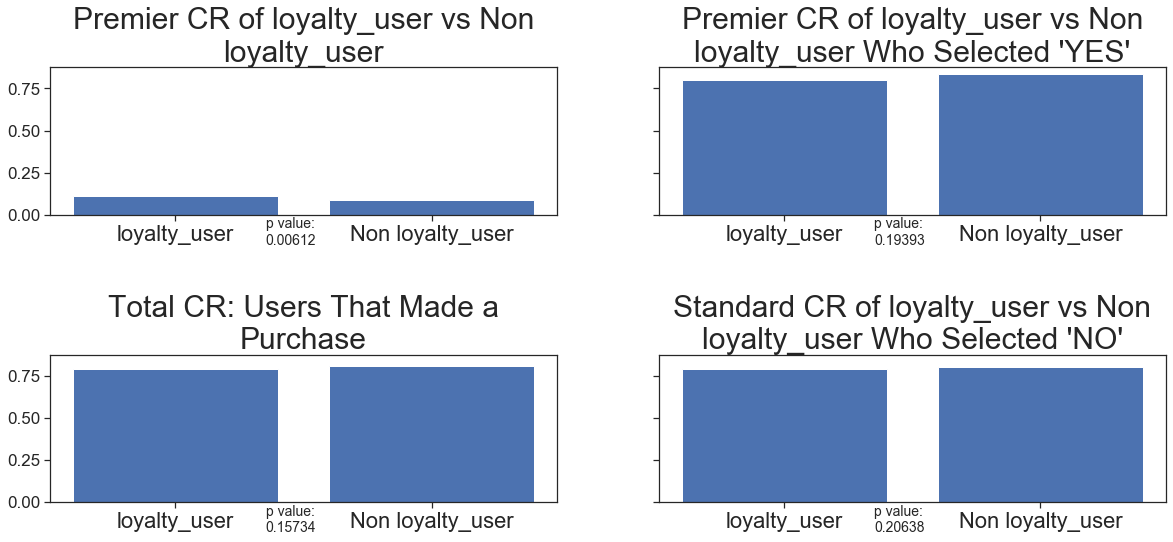

____________________________________________________________________________________________________


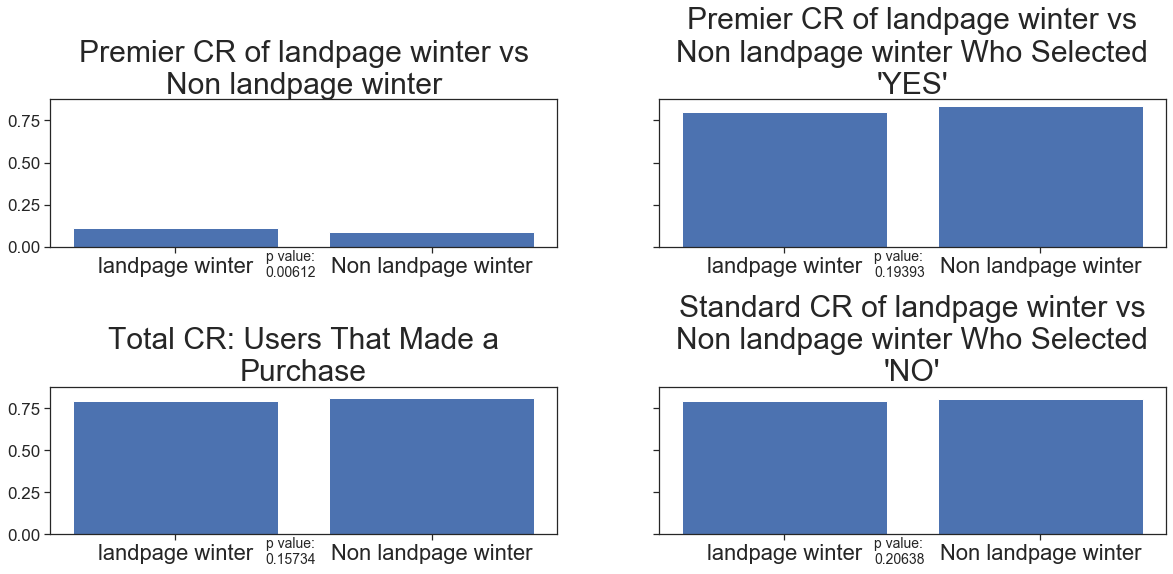

____________________________________________________________________________________________________


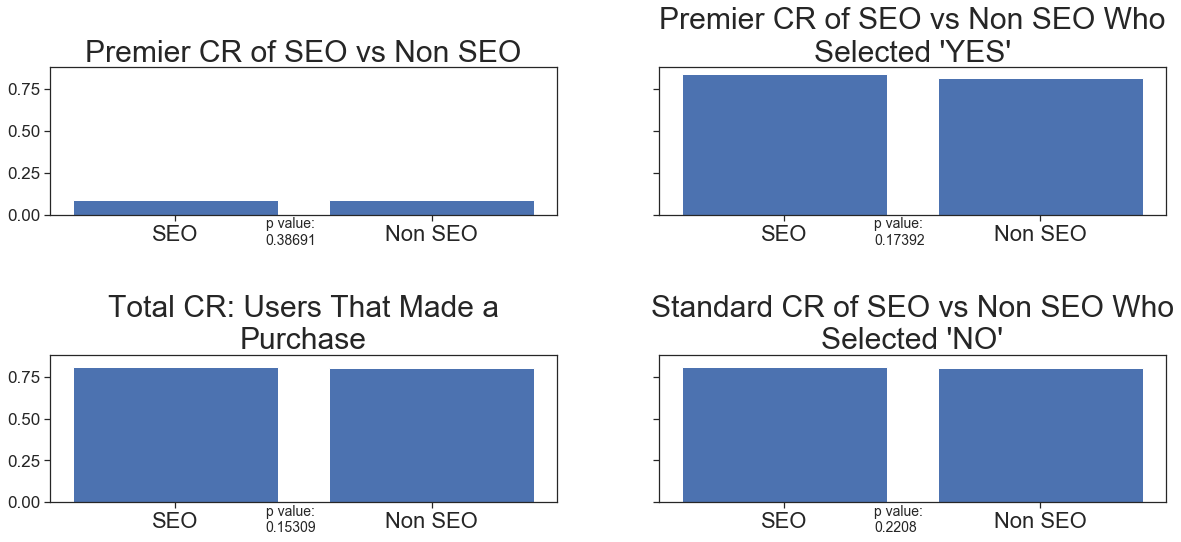

____________________________________________________________________________________________________


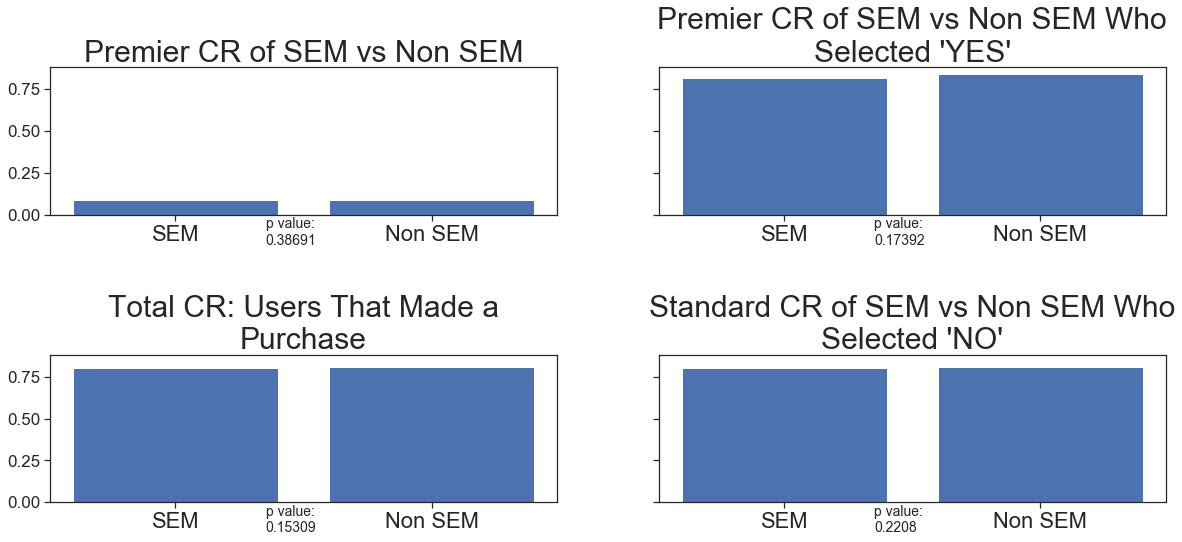

____________________________________________________________________________________________________


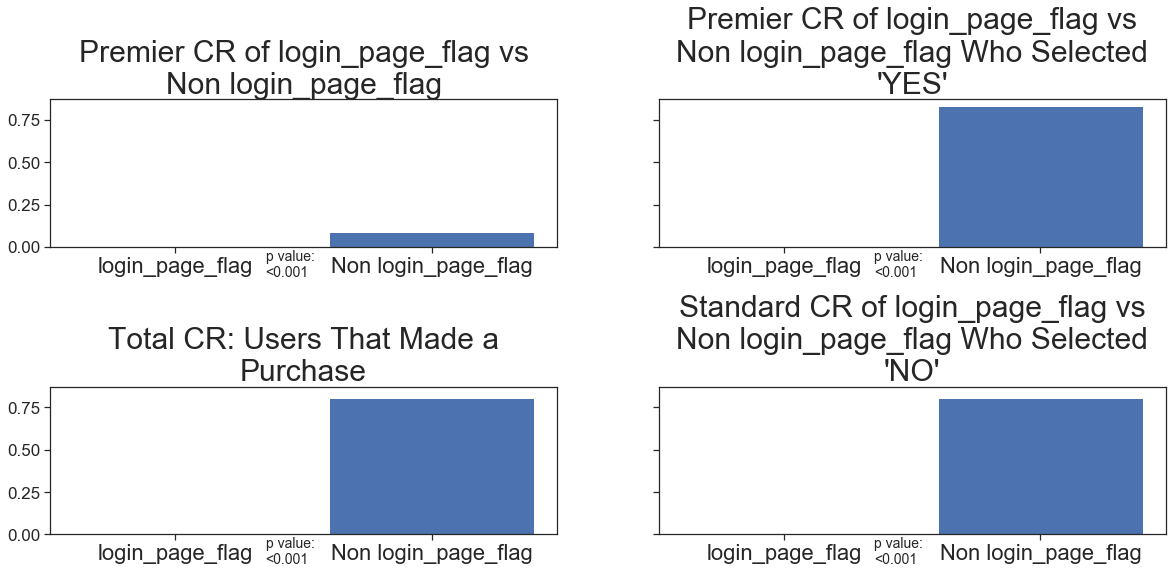

____________________________________________________________________________________________________


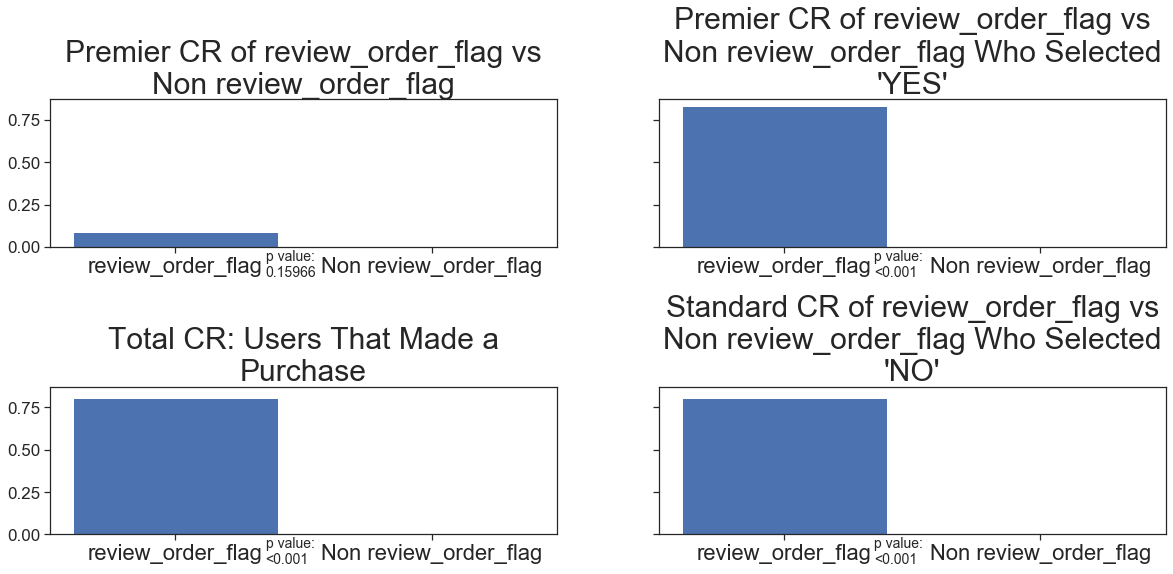

____________________________________________________________________________________________________


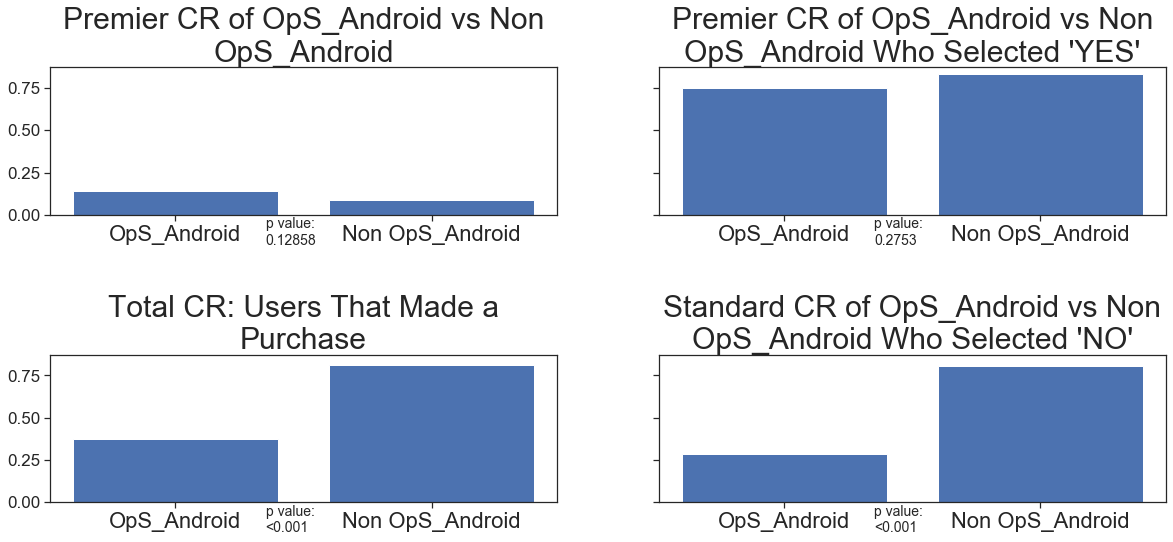

____________________________________________________________________________________________________


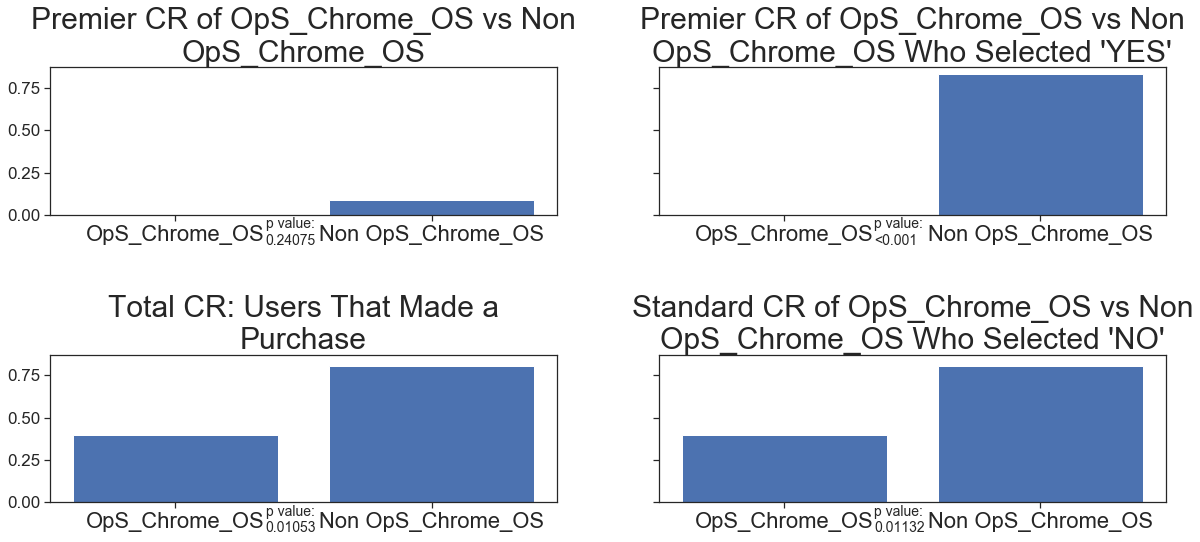

____________________________________________________________________________________________________


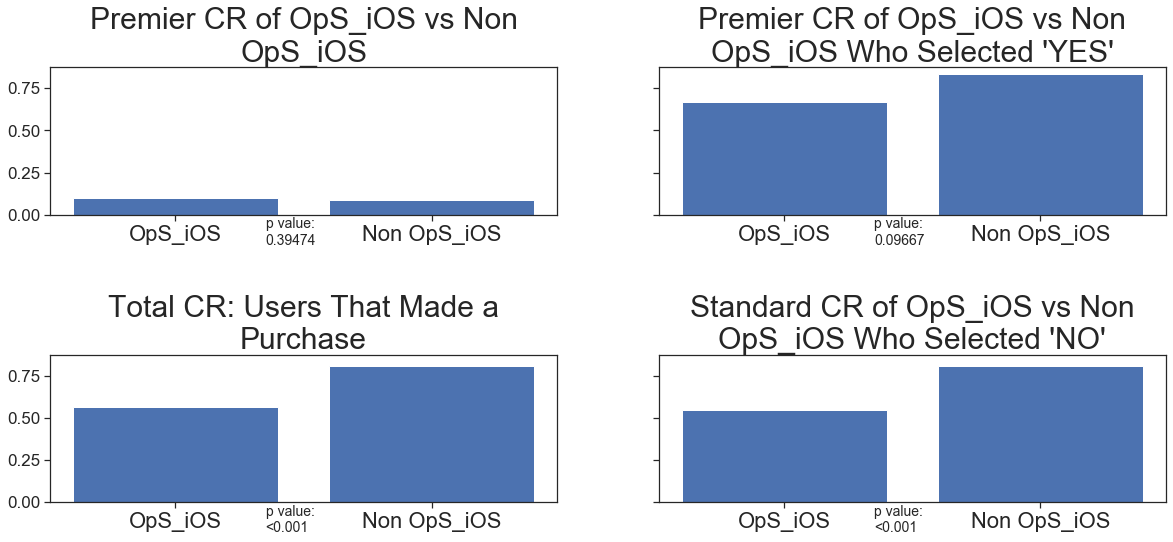

____________________________________________________________________________________________________


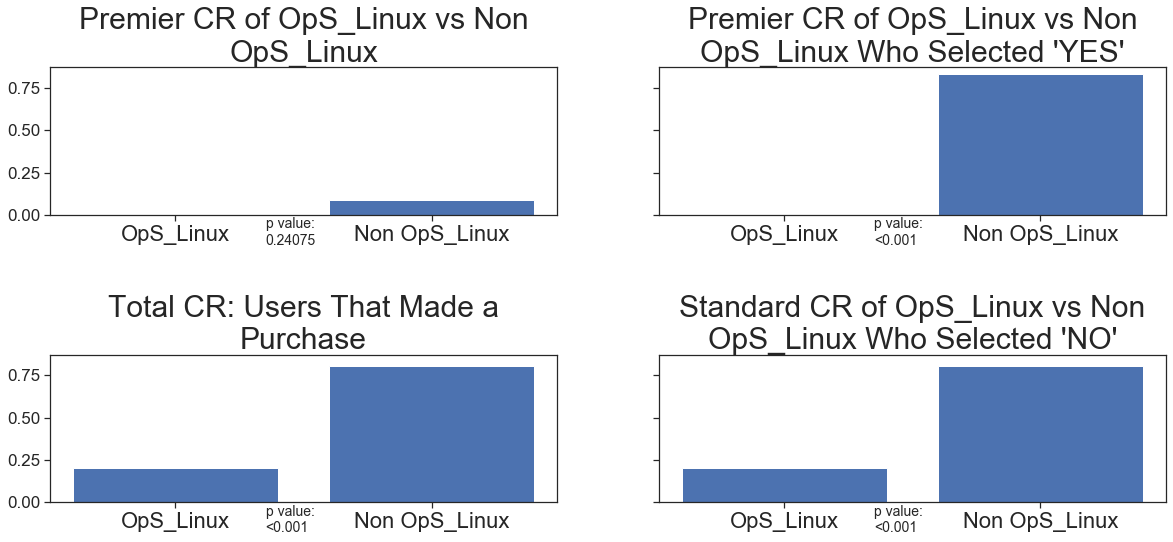

____________________________________________________________________________________________________


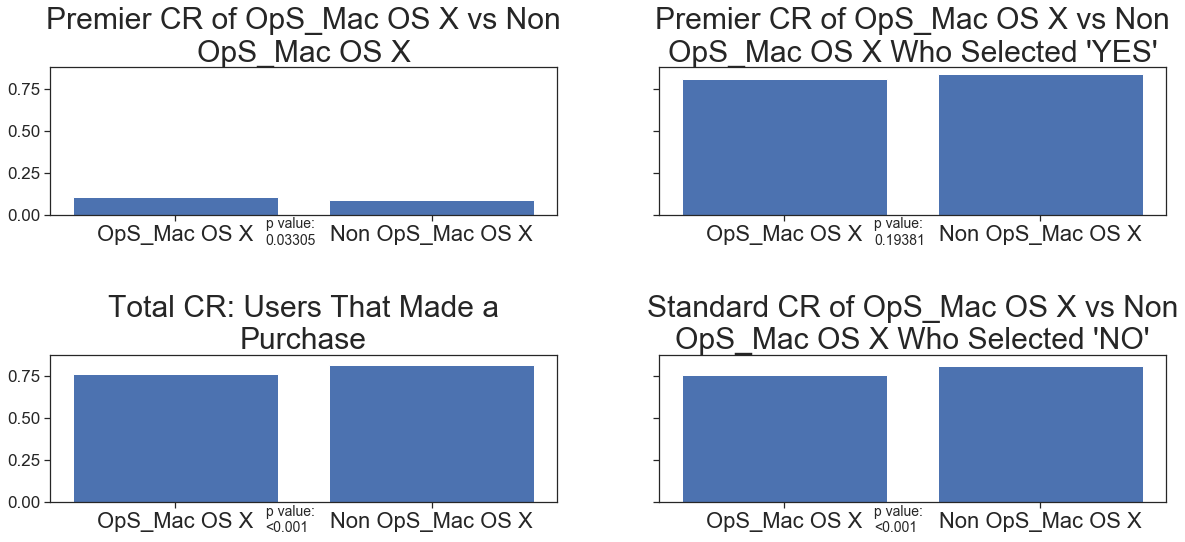

____________________________________________________________________________________________________


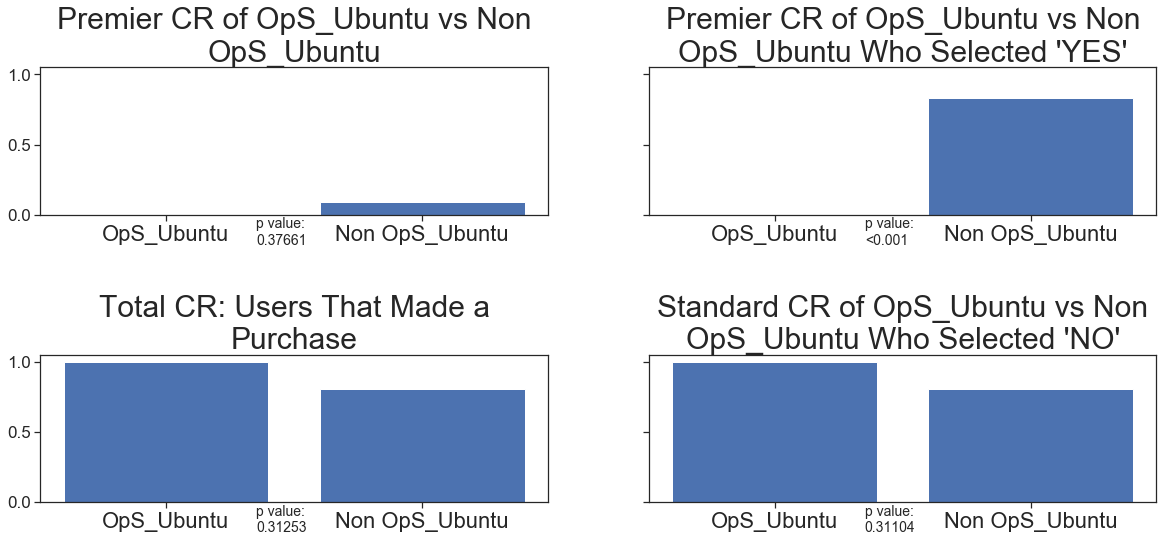

____________________________________________________________________________________________________


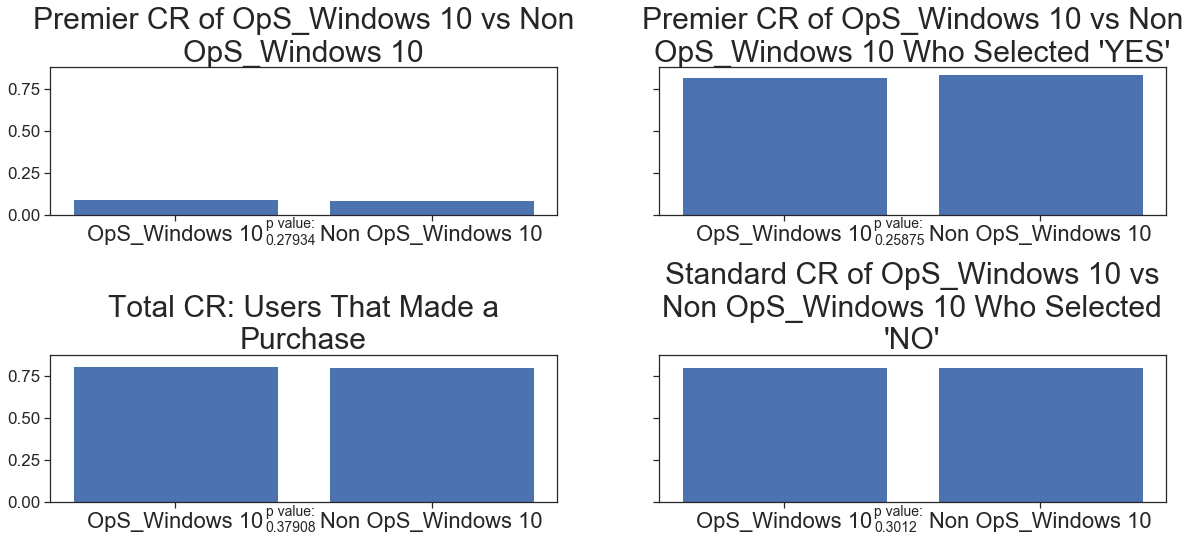

____________________________________________________________________________________________________


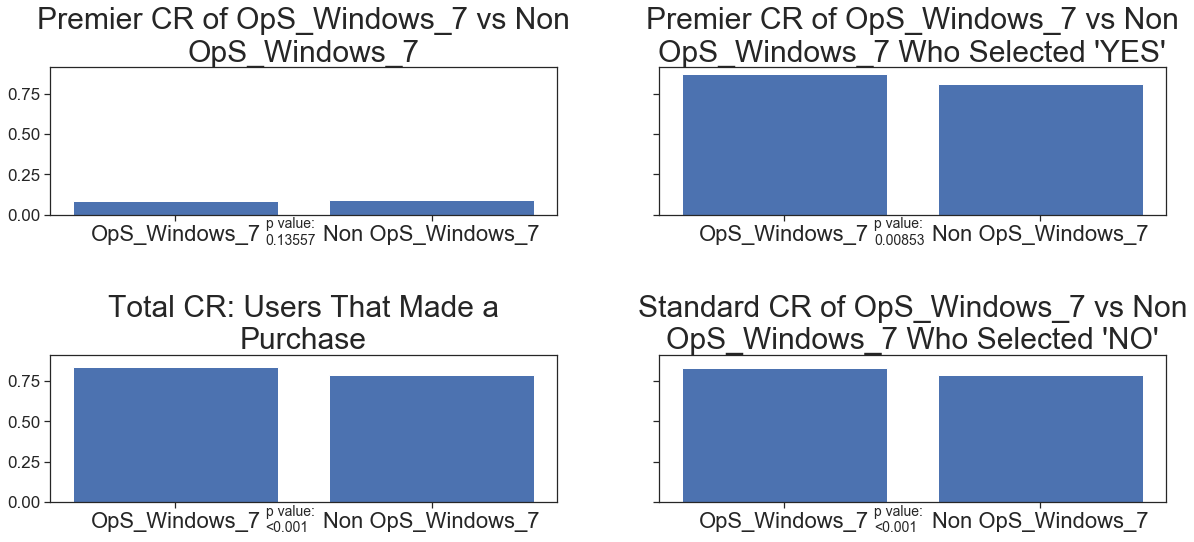

____________________________________________________________________________________________________


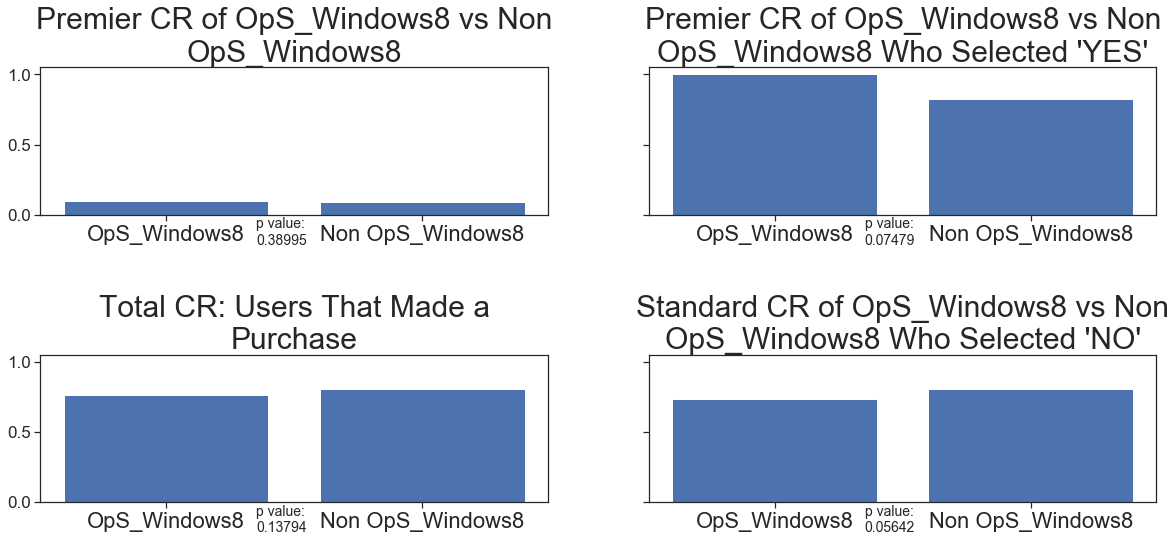

____________________________________________________________________________________________________


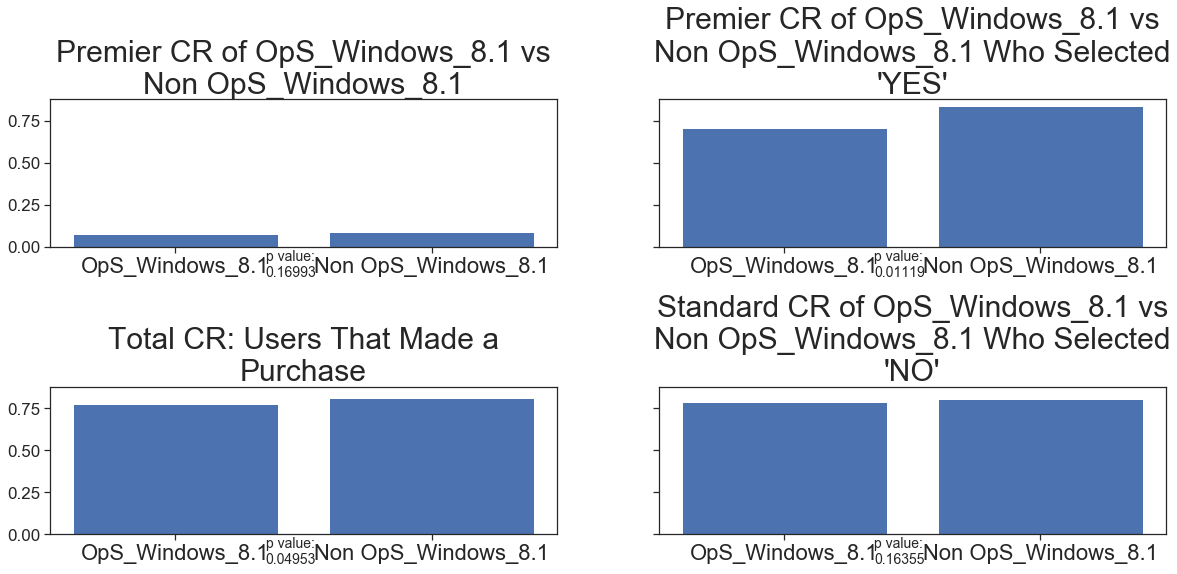

____________________________________________________________________________________________________


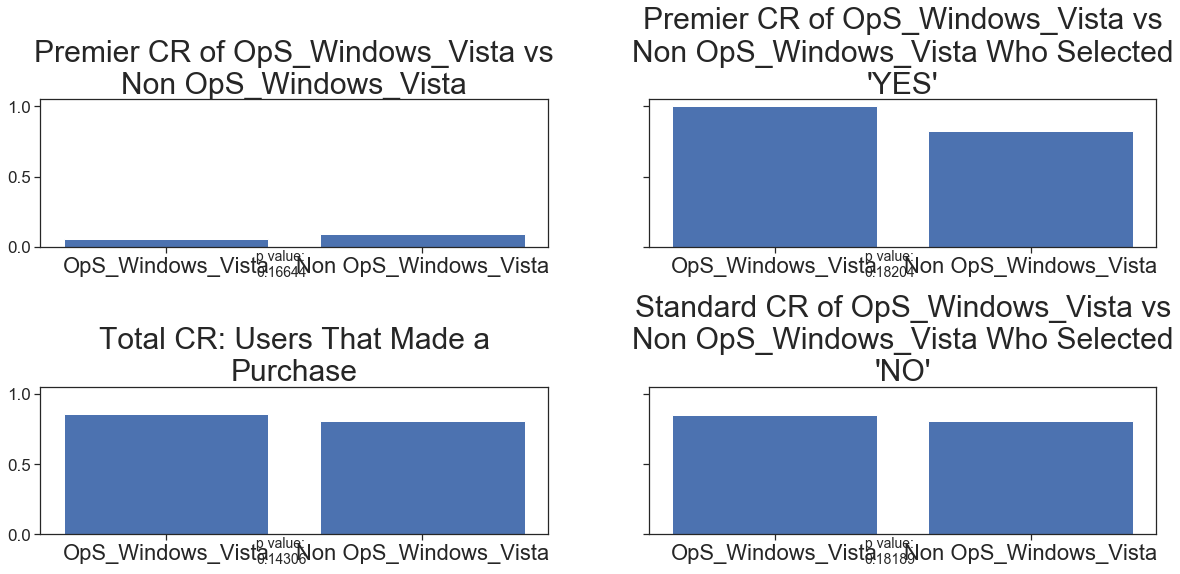

____________________________________________________________________________________________________


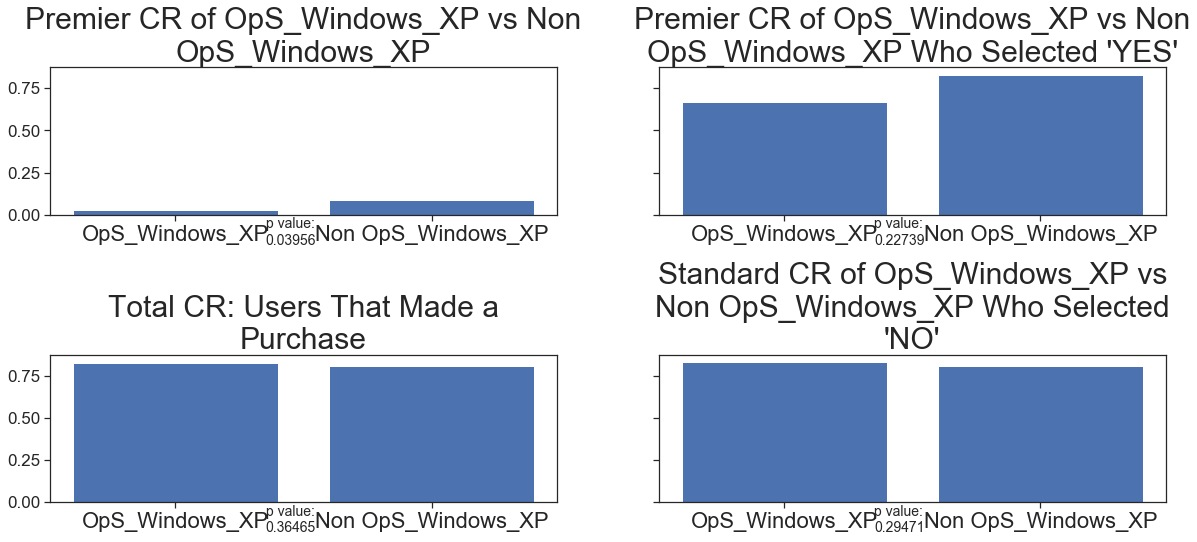

____________________________________________________________________________________________________


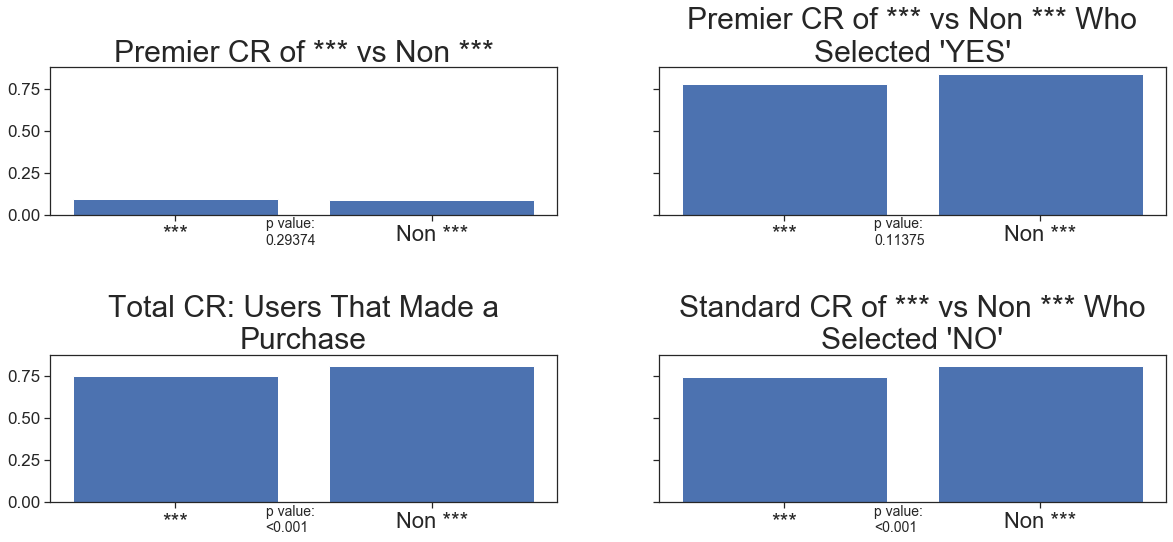

____________________________________________________________________________________________________


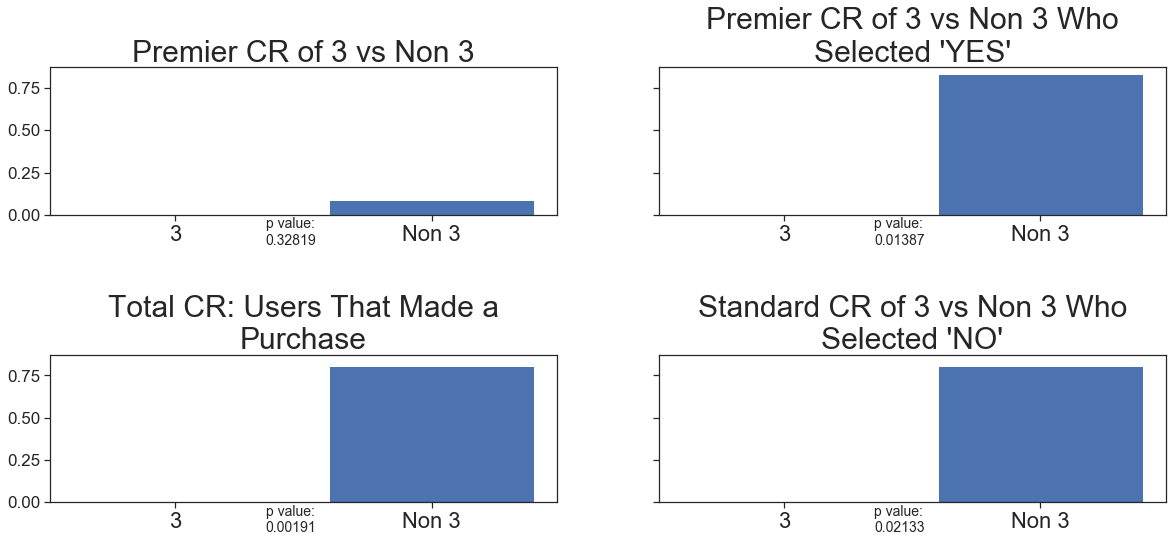

____________________________________________________________________________________________________


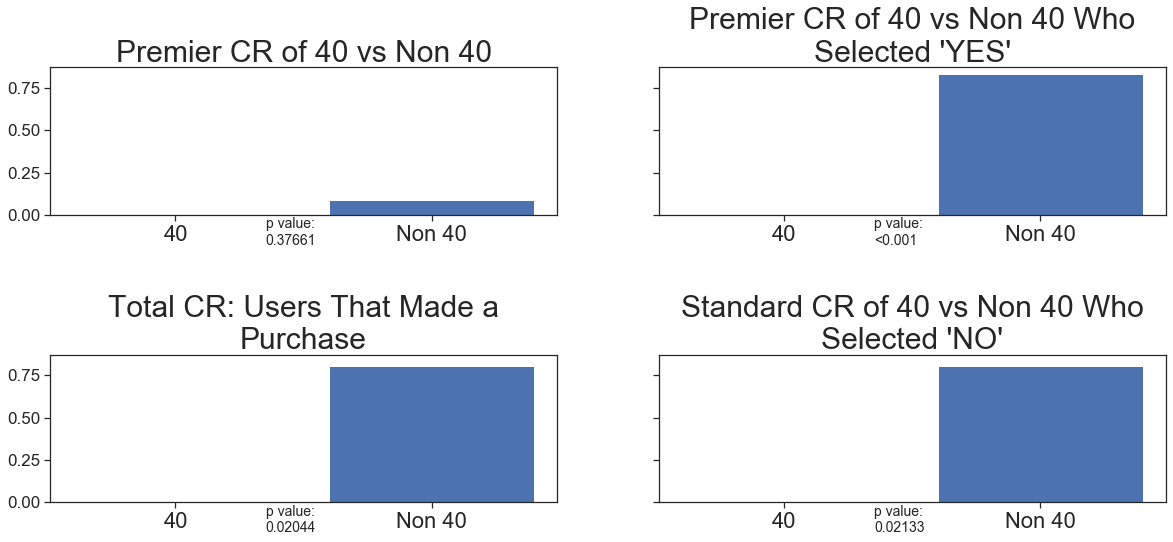

____________________________________________________________________________________________________


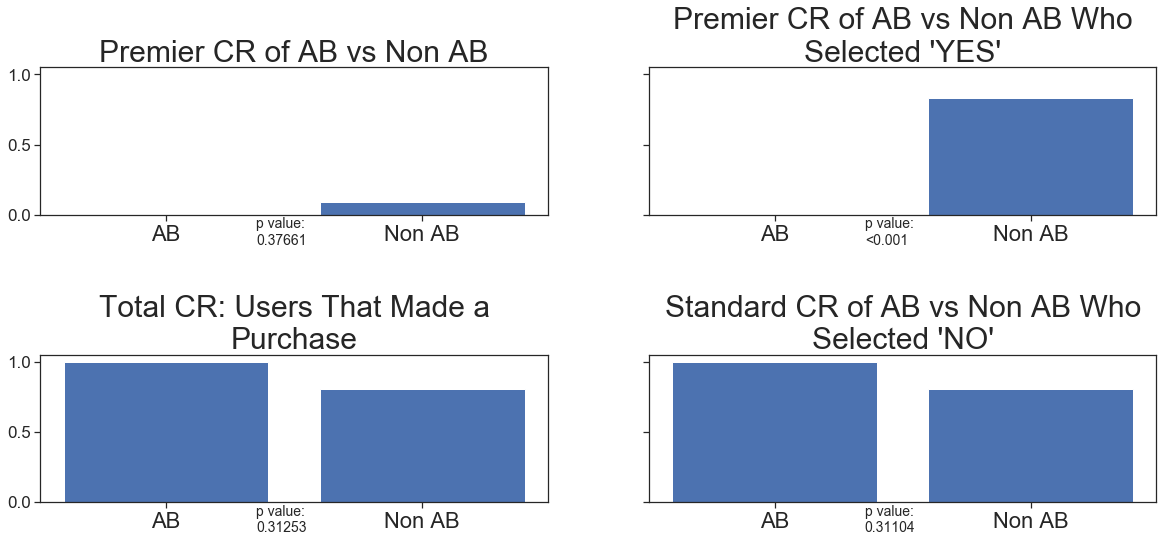

____________________________________________________________________________________________________


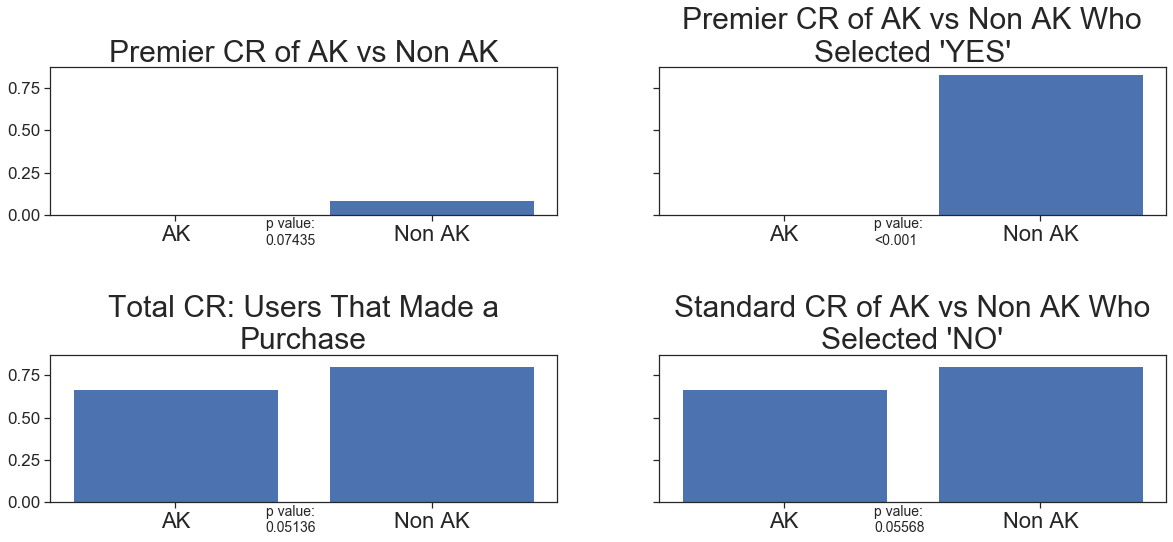

____________________________________________________________________________________________________


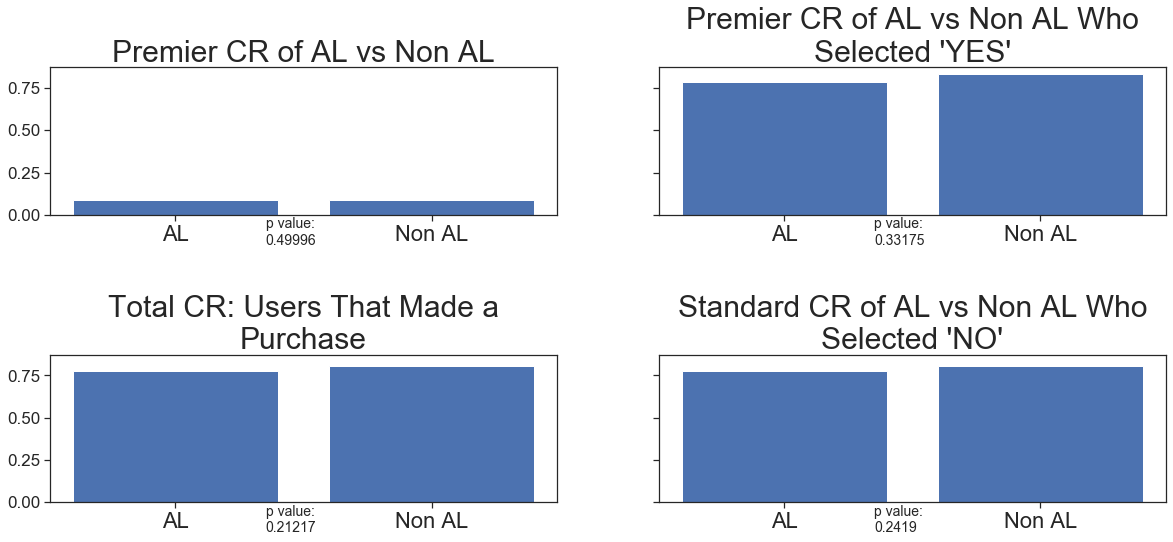

____________________________________________________________________________________________________


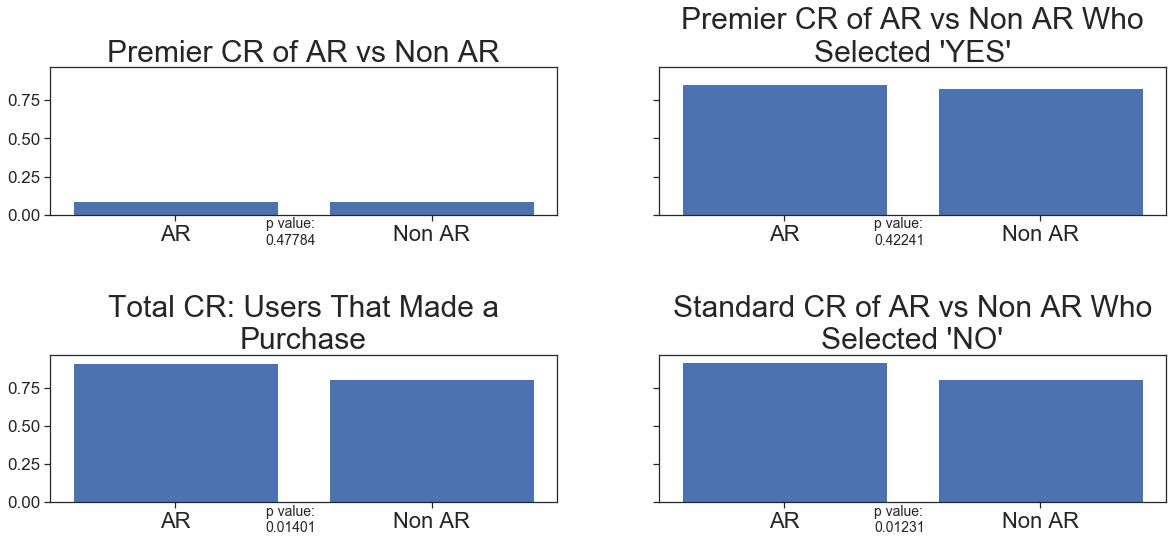

____________________________________________________________________________________________________


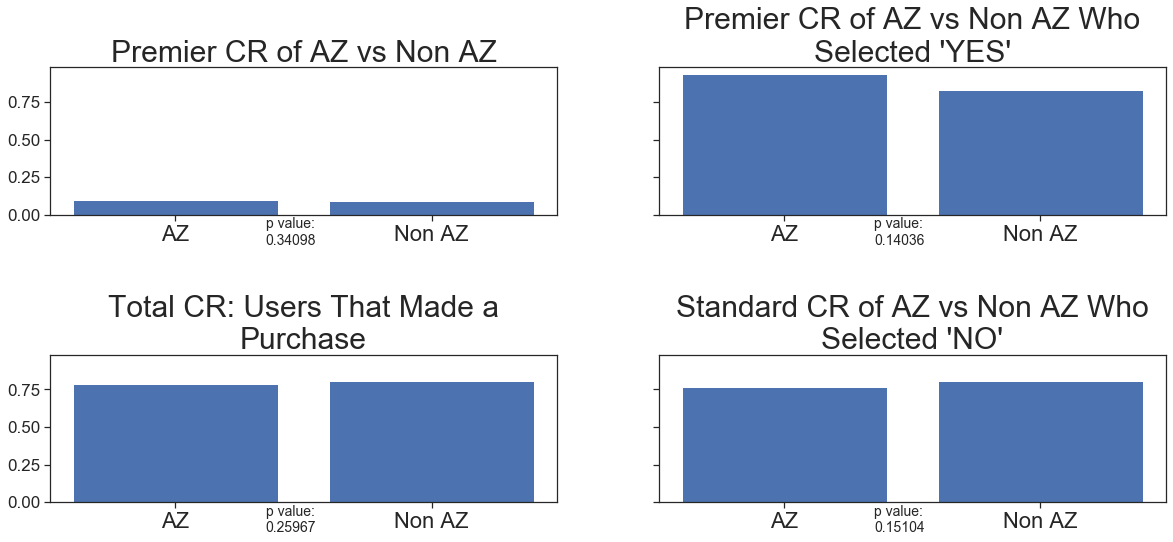

____________________________________________________________________________________________________


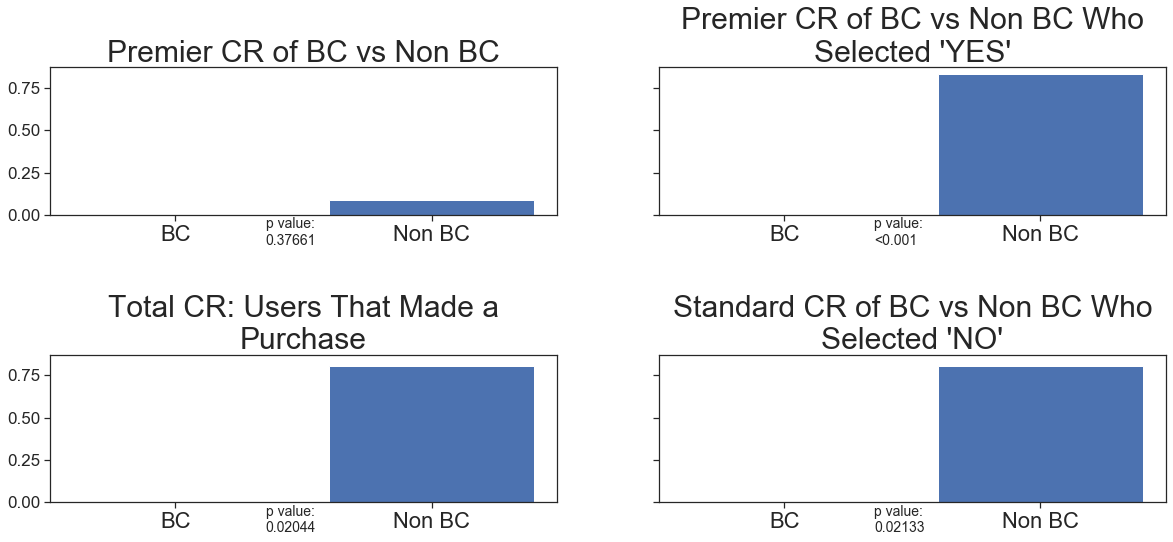

____________________________________________________________________________________________________


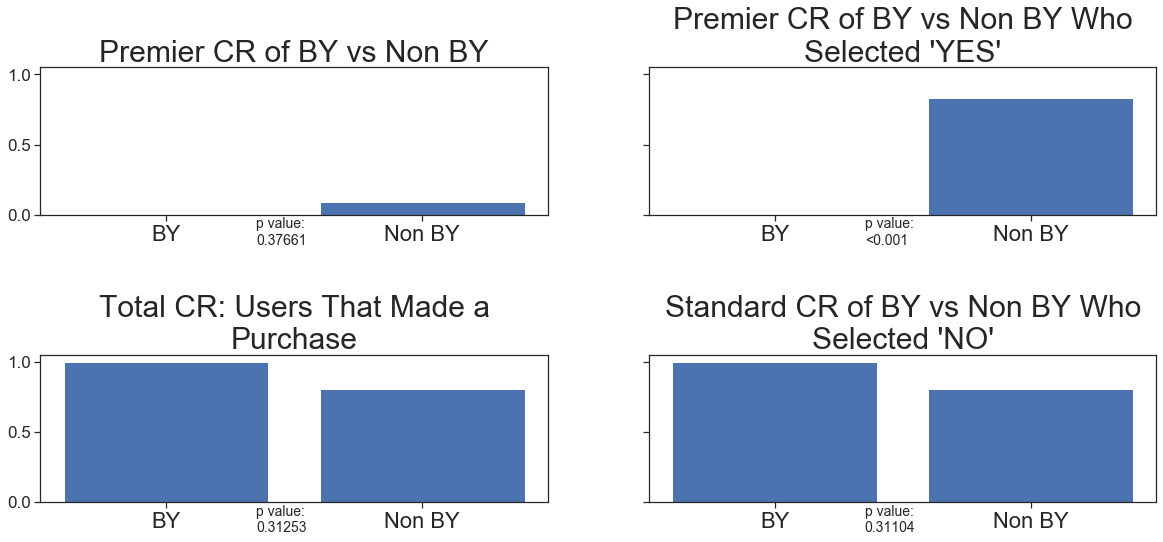

____________________________________________________________________________________________________


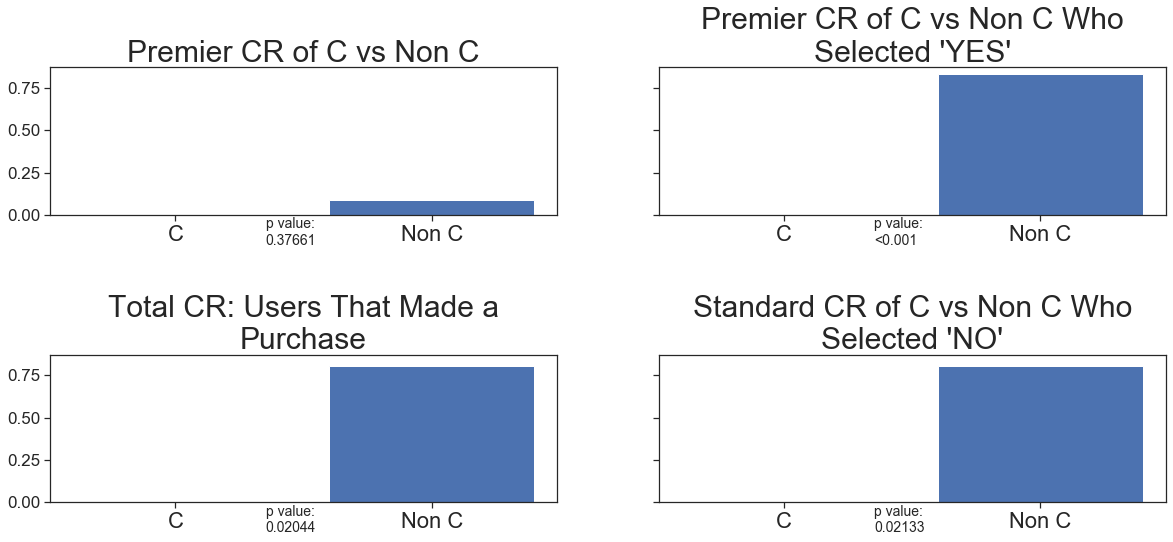

____________________________________________________________________________________________________


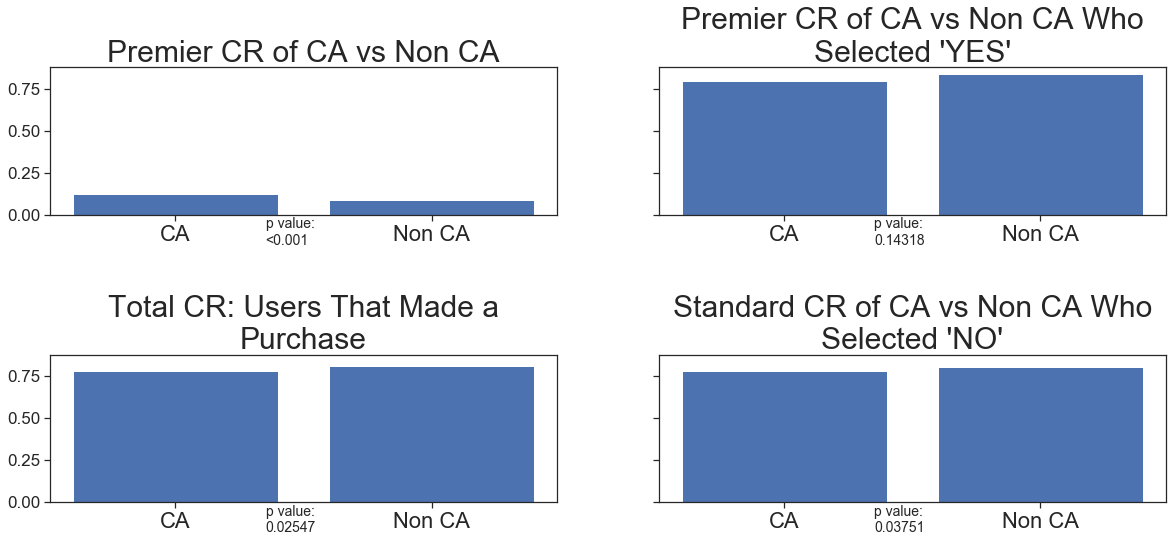

____________________________________________________________________________________________________


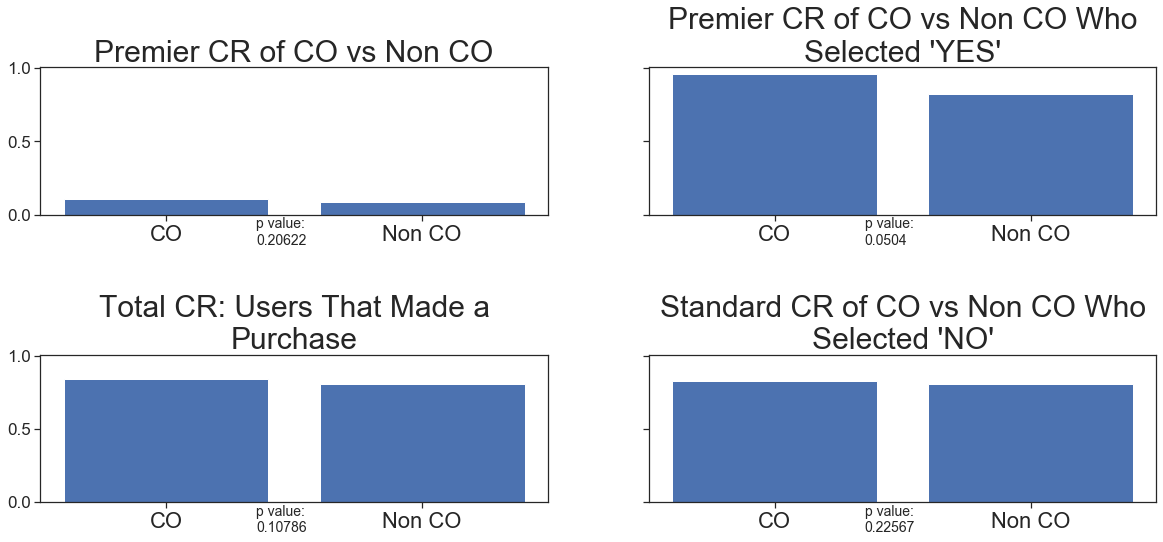

____________________________________________________________________________________________________


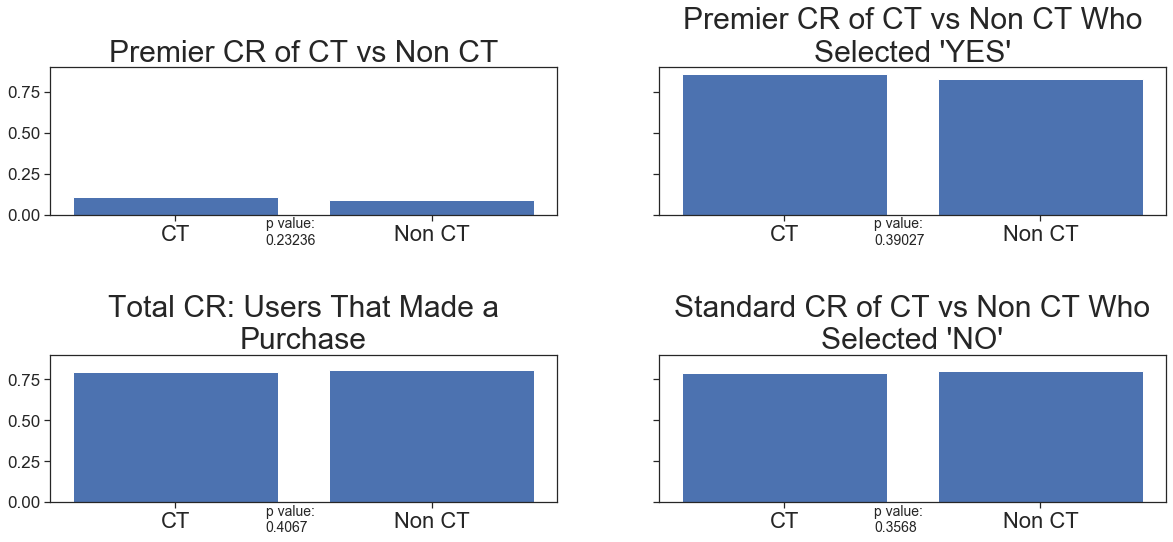

____________________________________________________________________________________________________


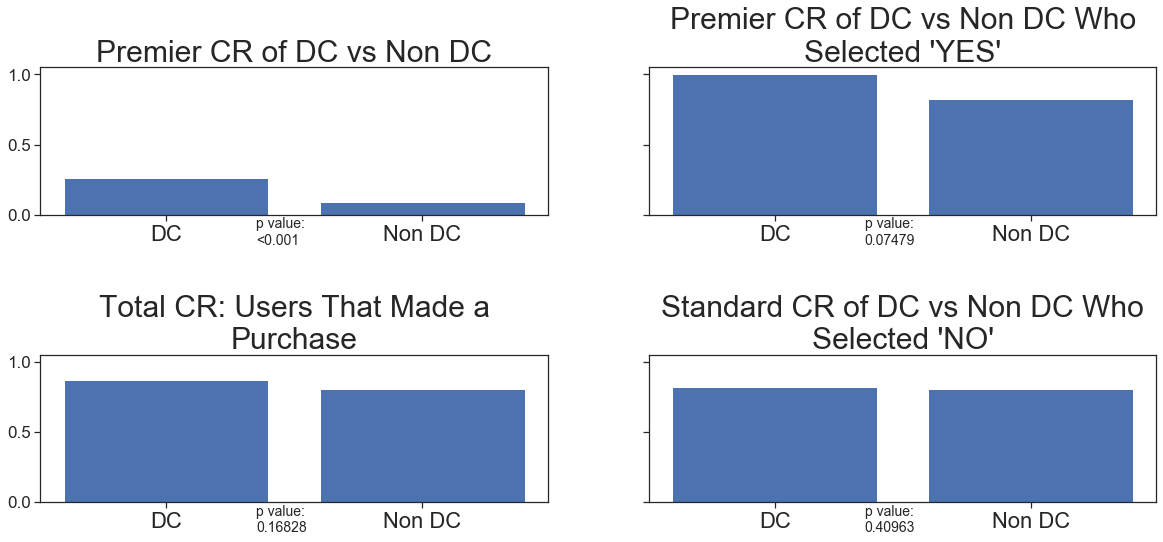

____________________________________________________________________________________________________


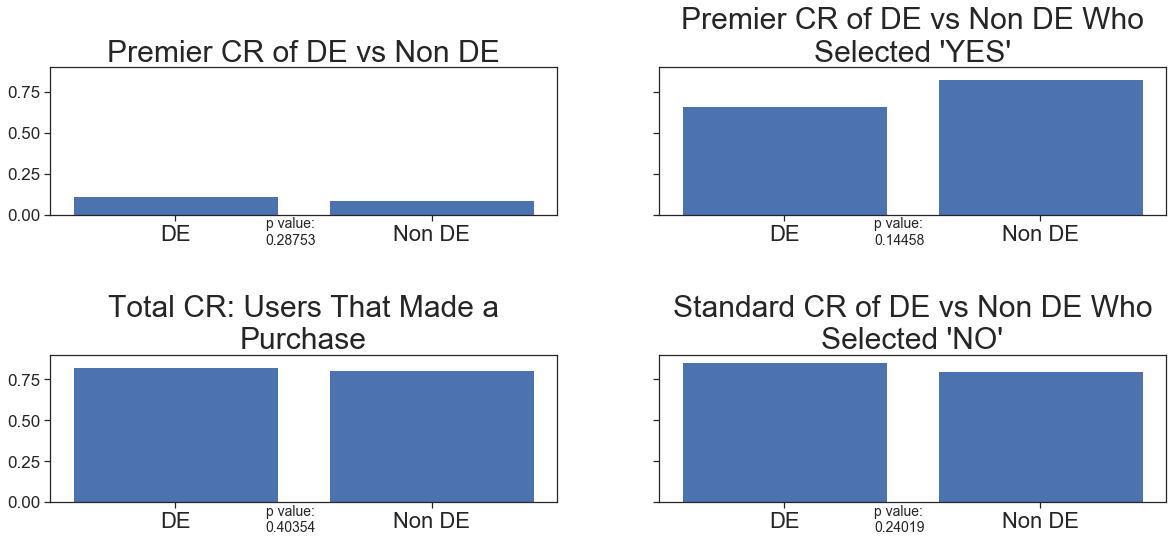

____________________________________________________________________________________________________


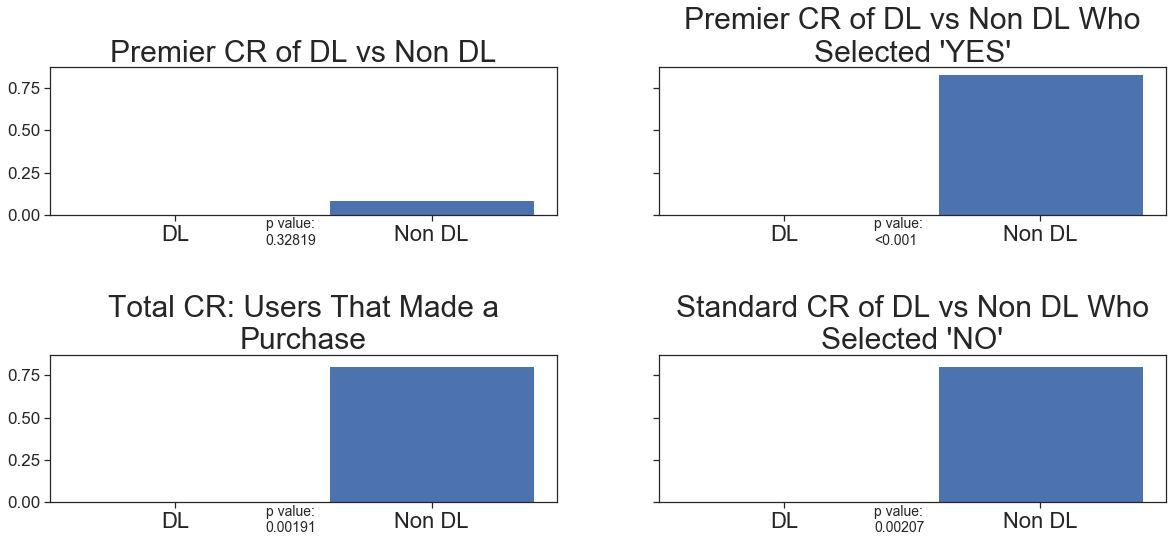

____________________________________________________________________________________________________


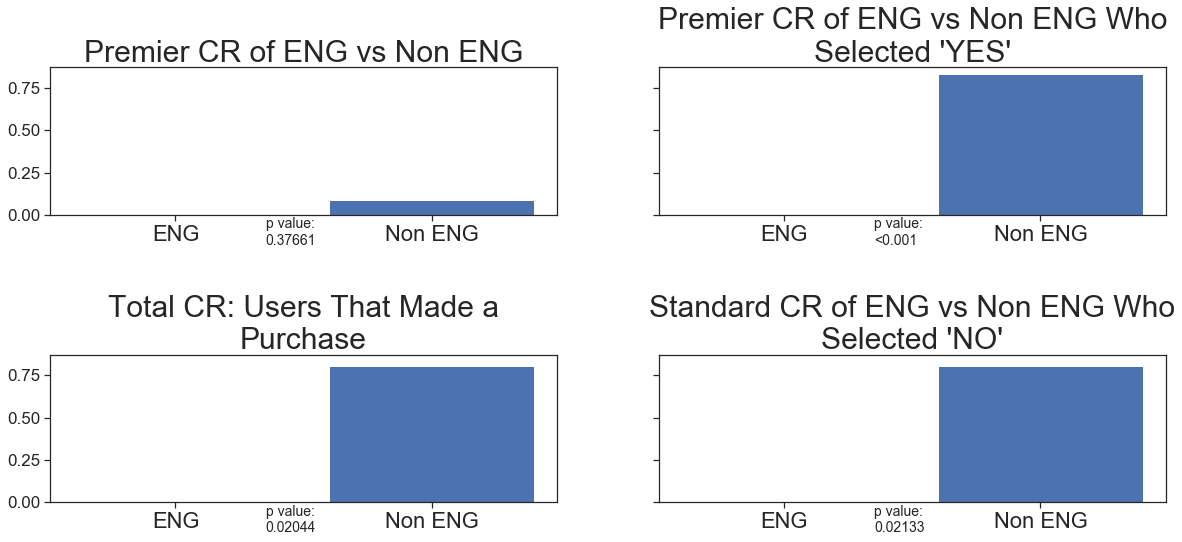

____________________________________________________________________________________________________


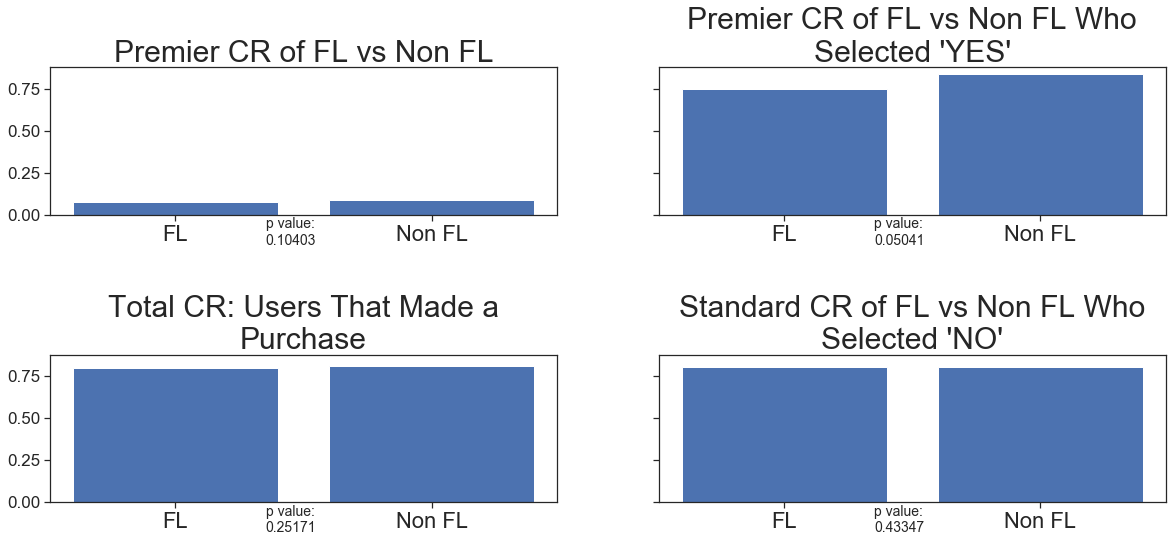

____________________________________________________________________________________________________


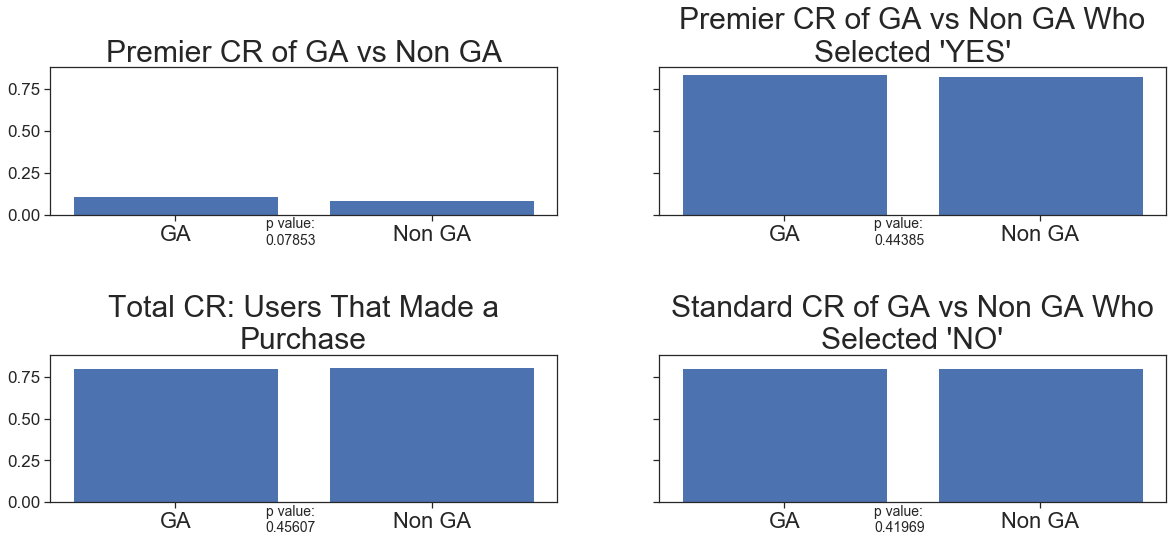

____________________________________________________________________________________________________


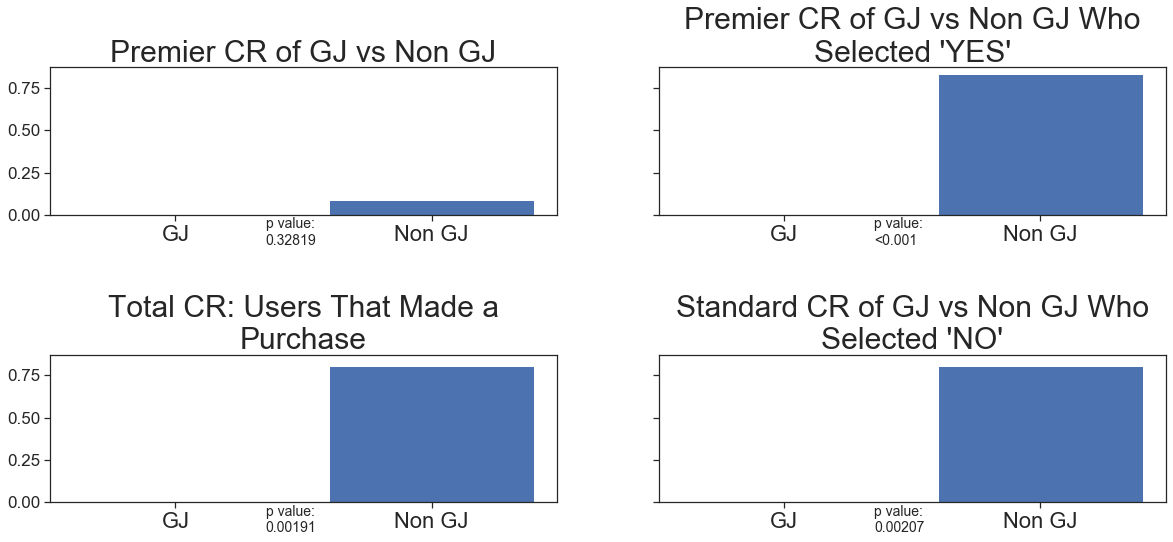

____________________________________________________________________________________________________


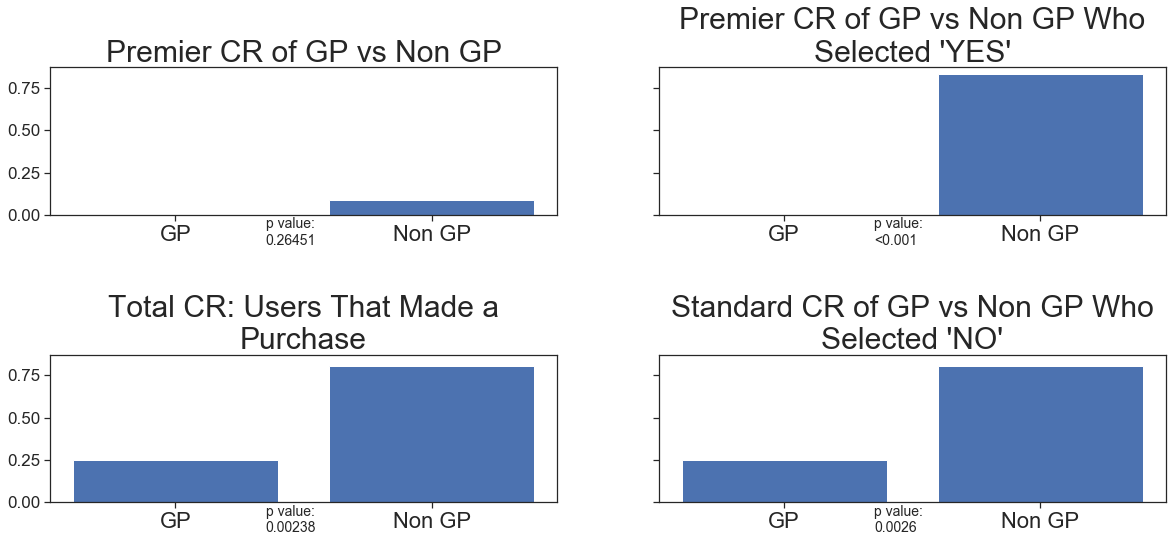

____________________________________________________________________________________________________


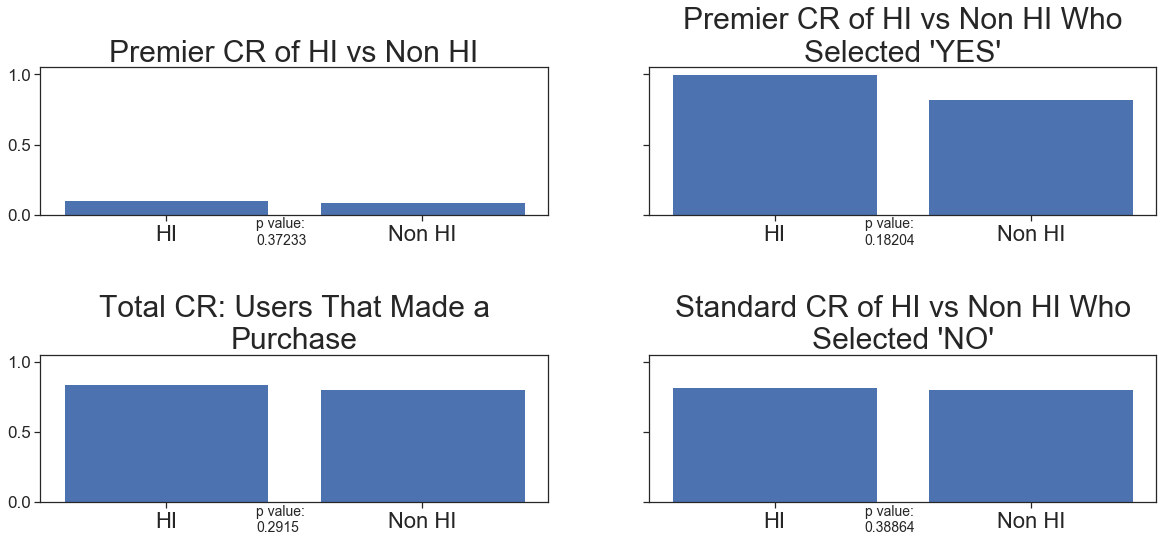

____________________________________________________________________________________________________


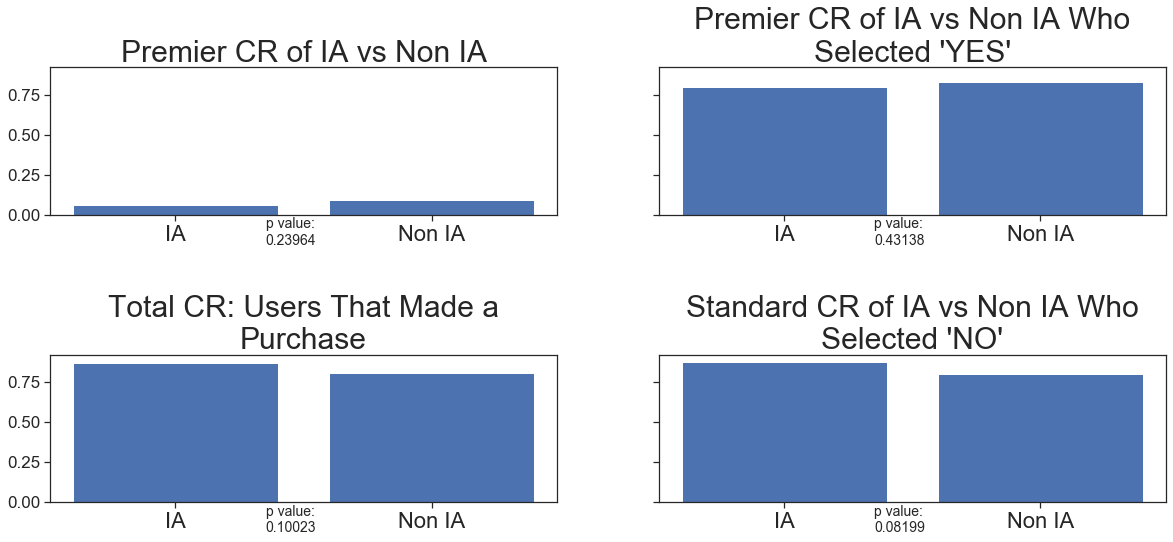

____________________________________________________________________________________________________


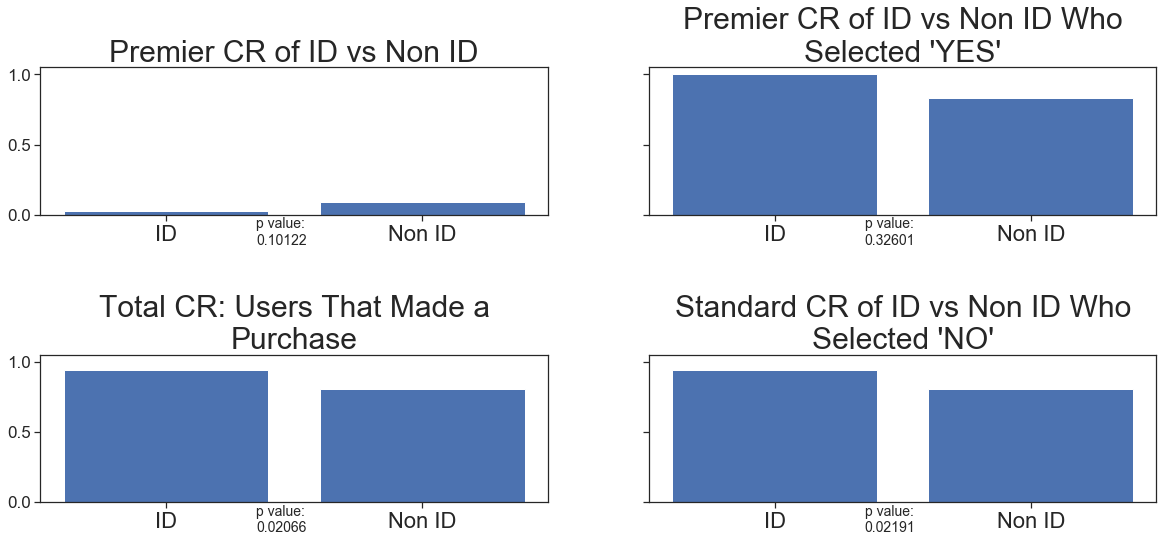

____________________________________________________________________________________________________


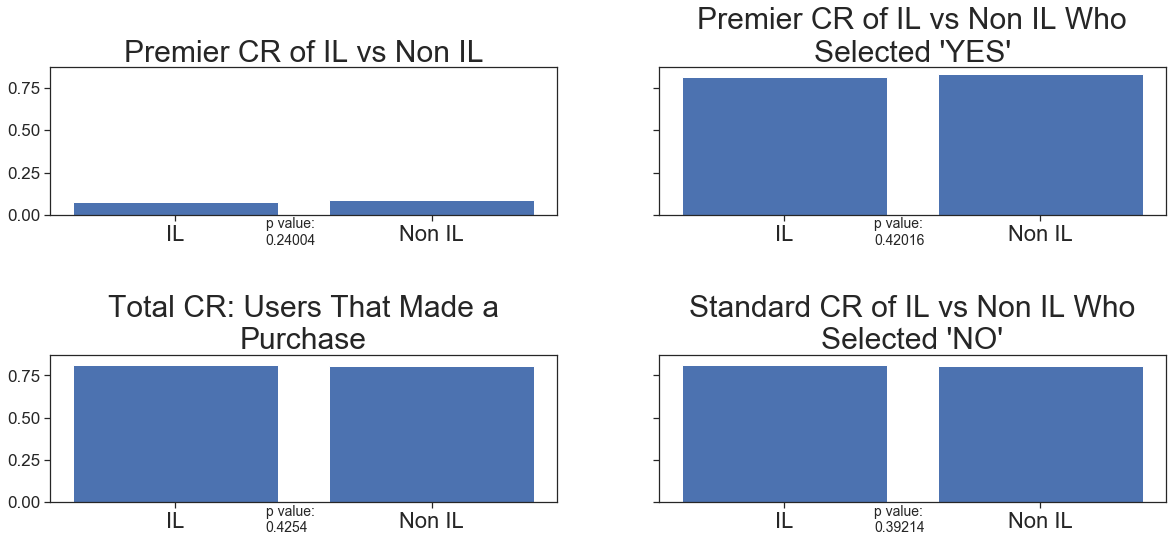

____________________________________________________________________________________________________


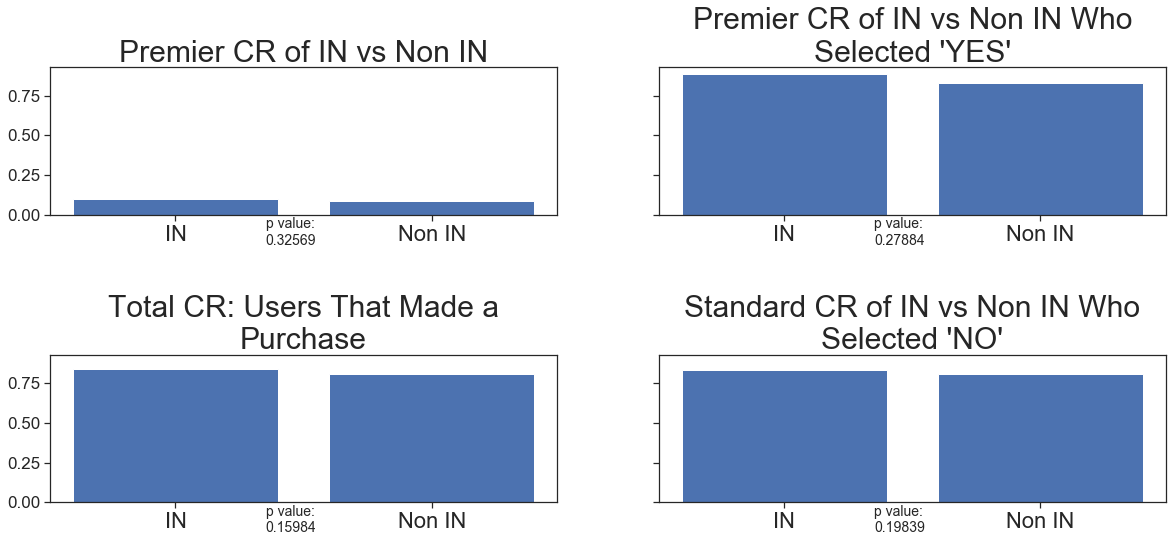

____________________________________________________________________________________________________


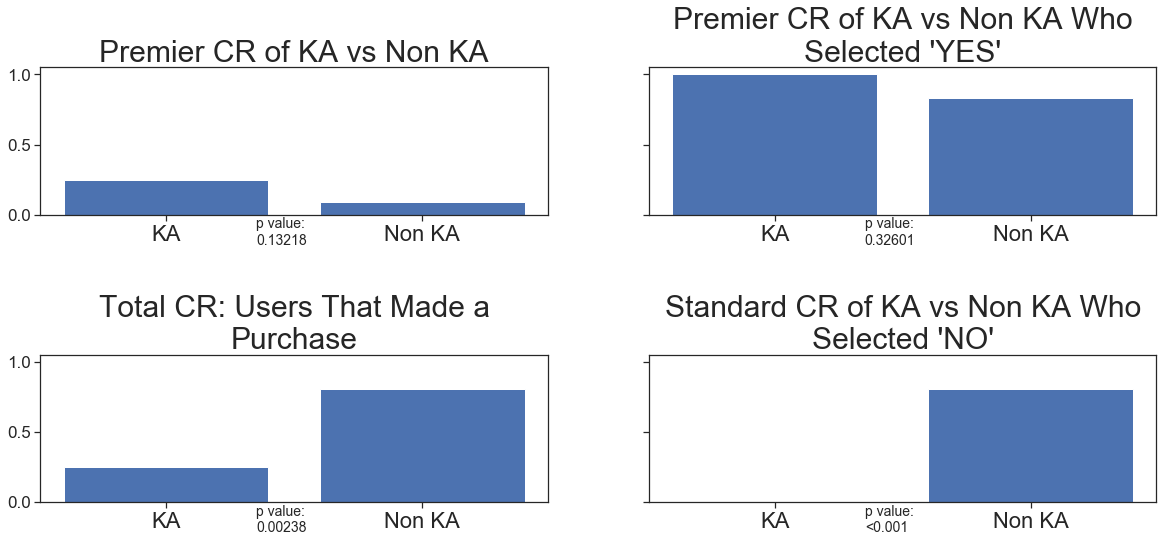

____________________________________________________________________________________________________


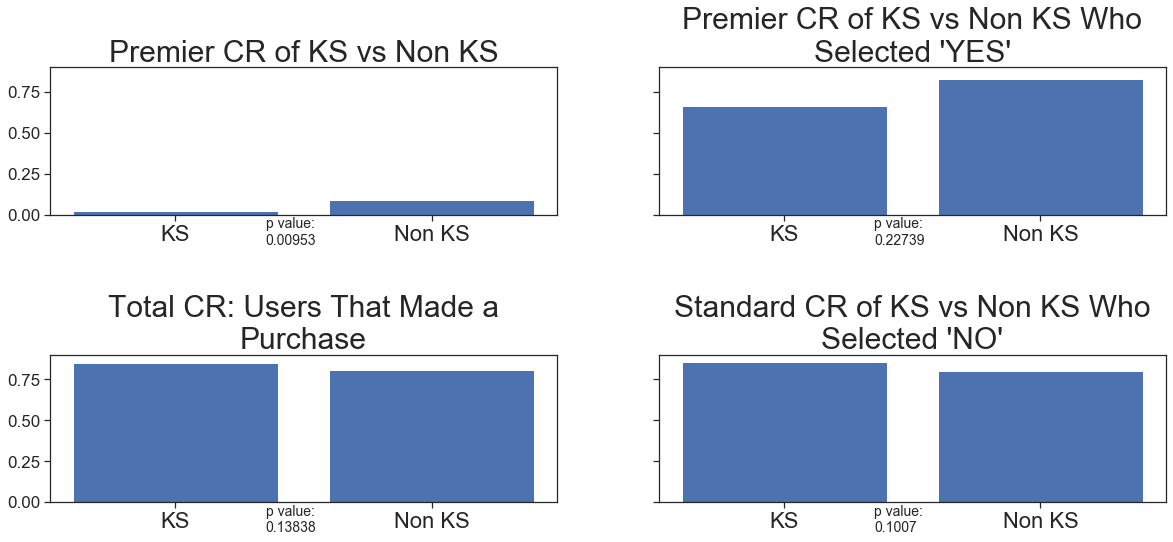

____________________________________________________________________________________________________


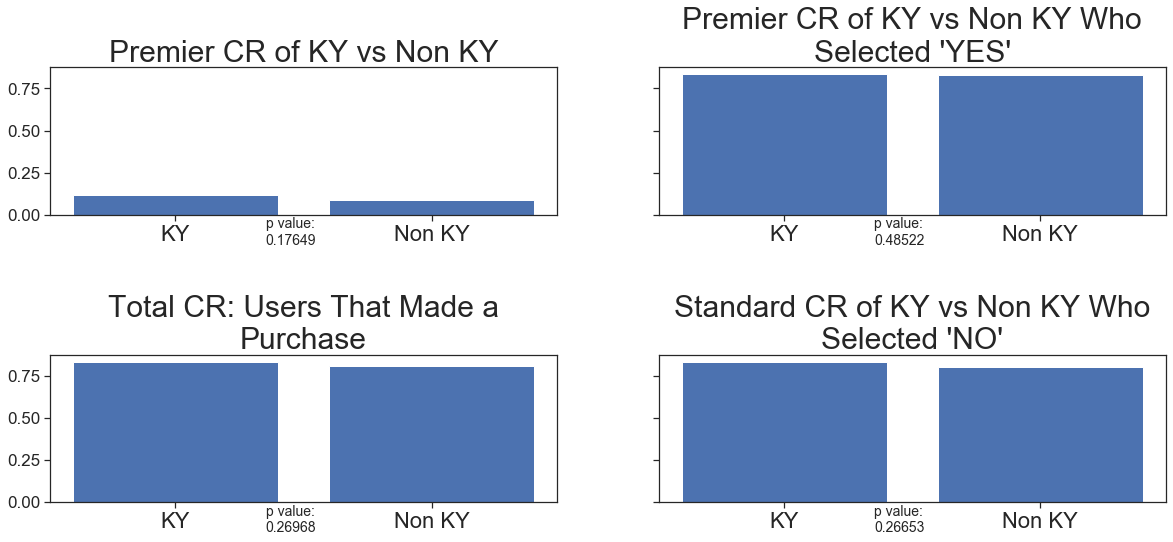

____________________________________________________________________________________________________


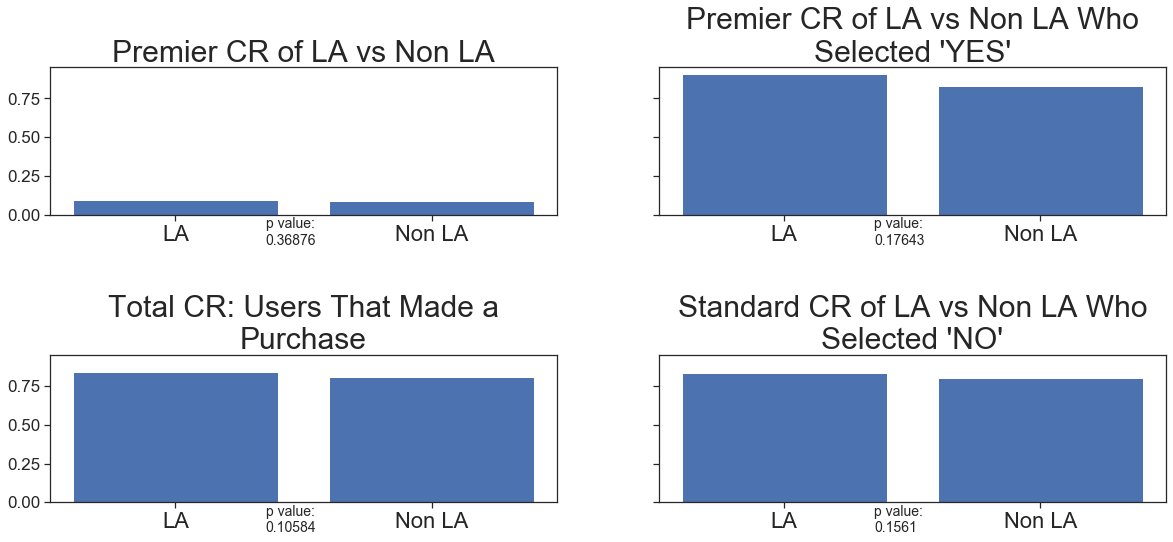

____________________________________________________________________________________________________


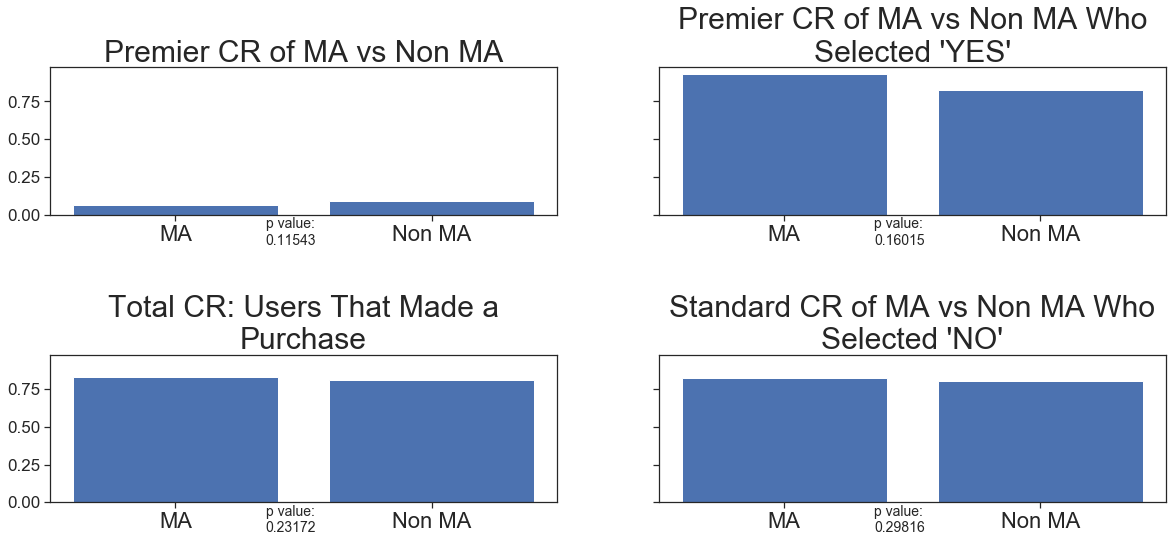

____________________________________________________________________________________________________


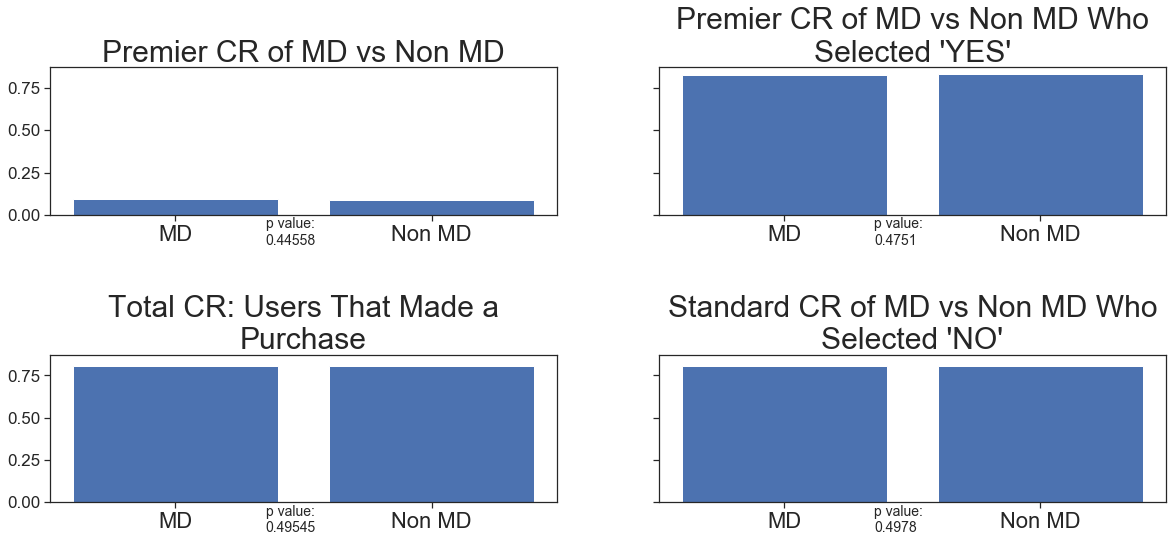

____________________________________________________________________________________________________


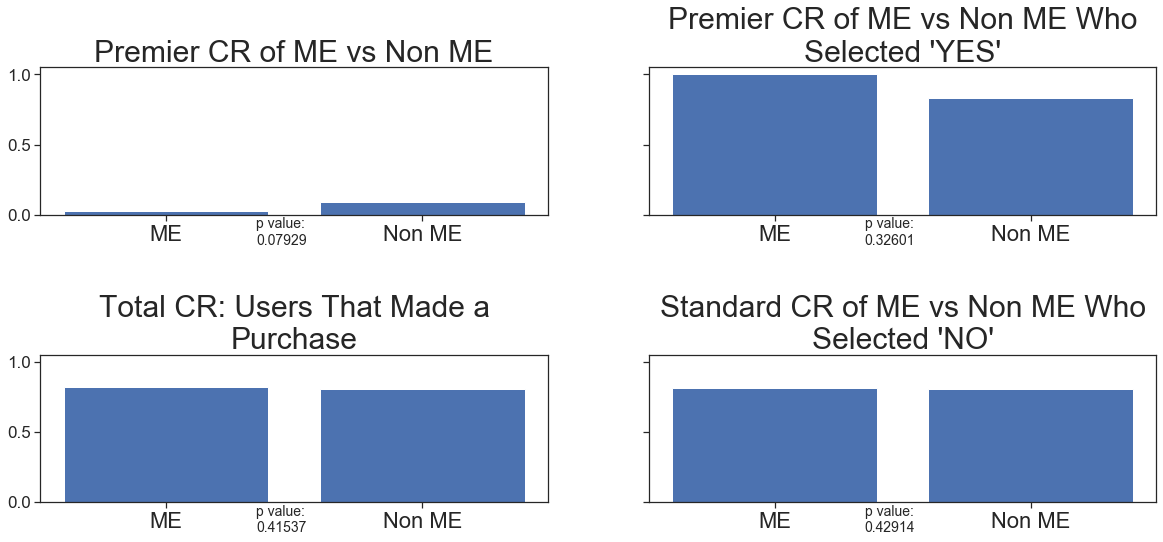

____________________________________________________________________________________________________


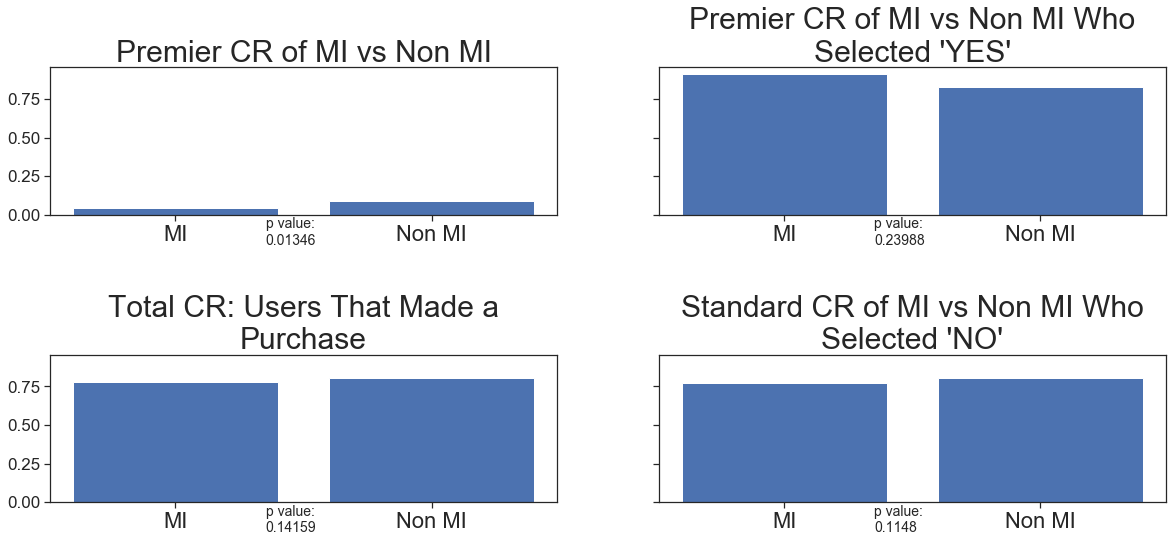

____________________________________________________________________________________________________


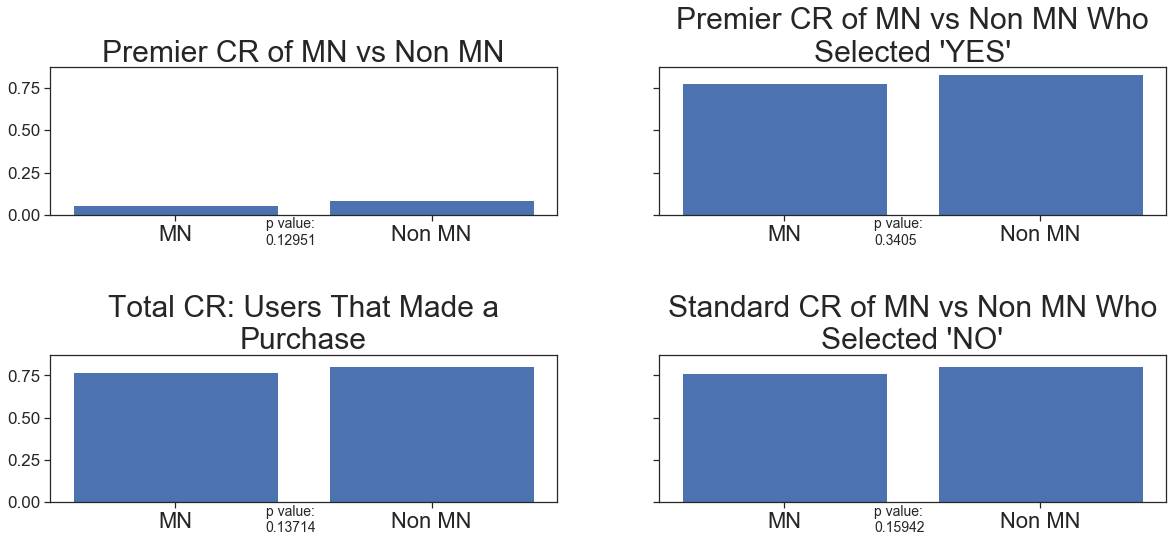

____________________________________________________________________________________________________


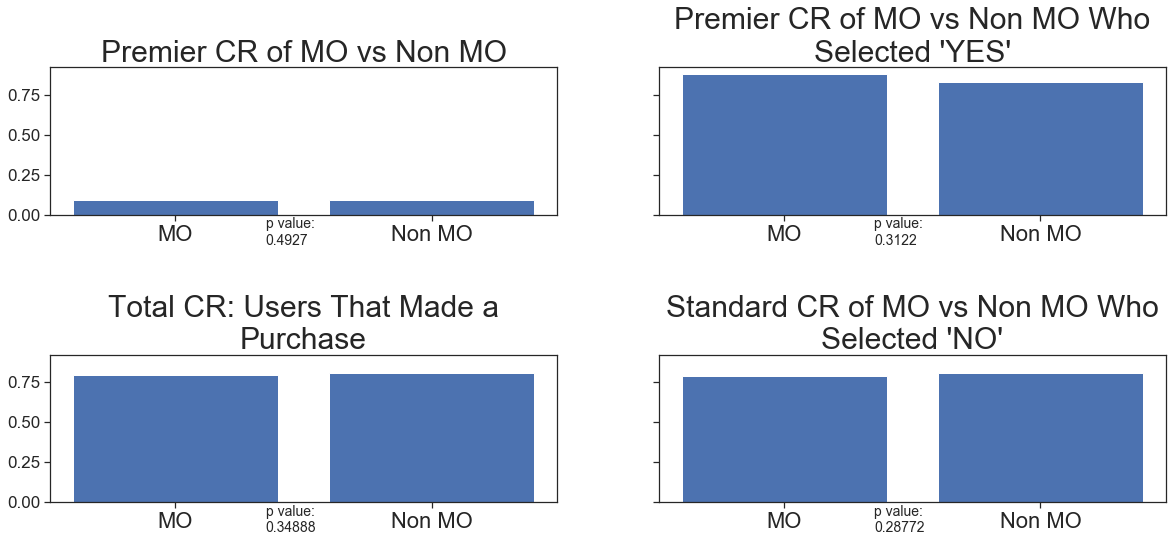

____________________________________________________________________________________________________


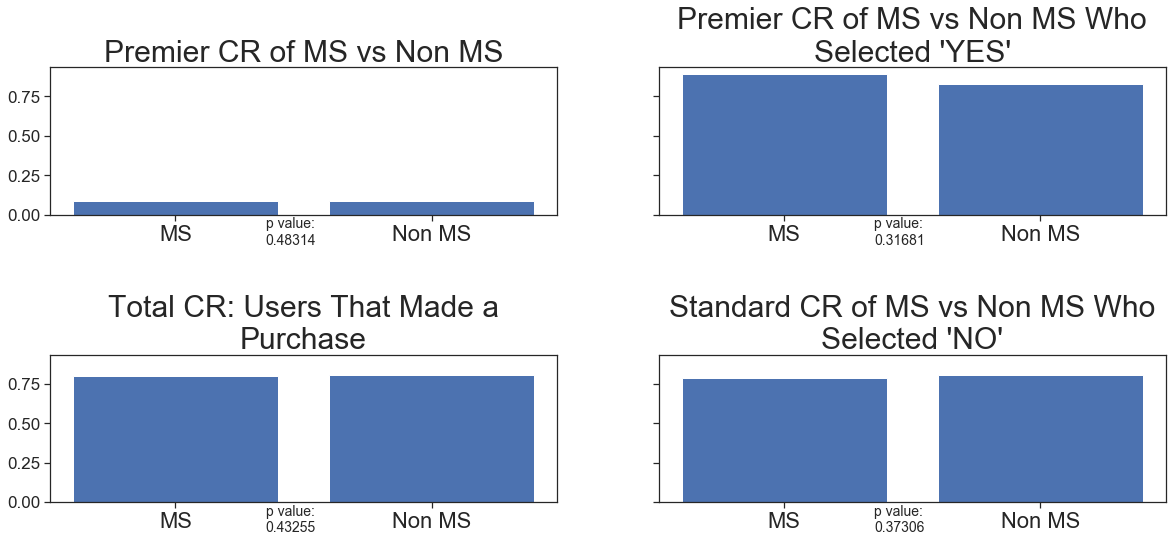

____________________________________________________________________________________________________


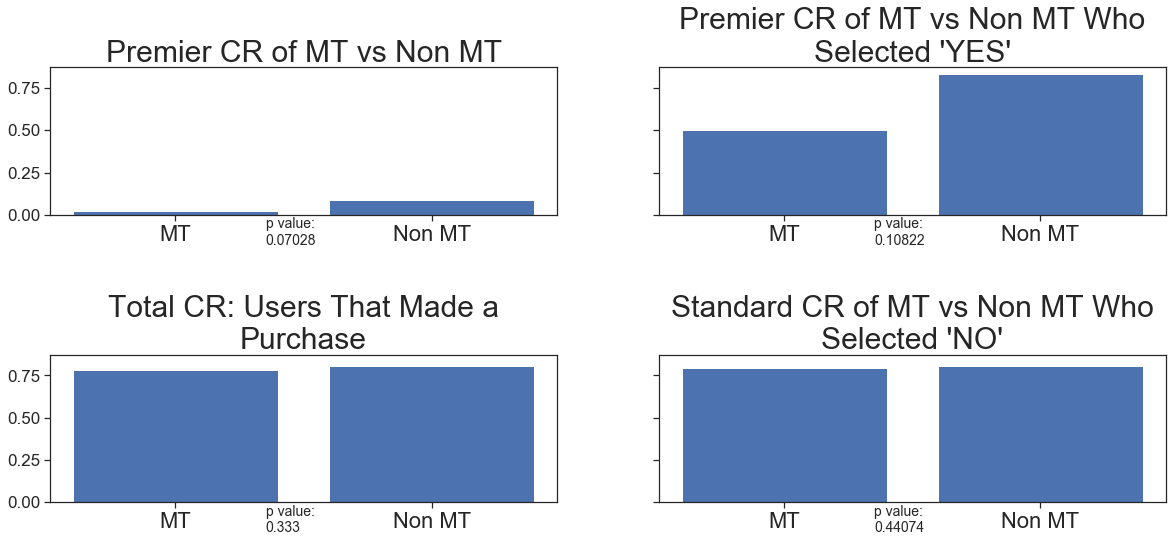

____________________________________________________________________________________________________


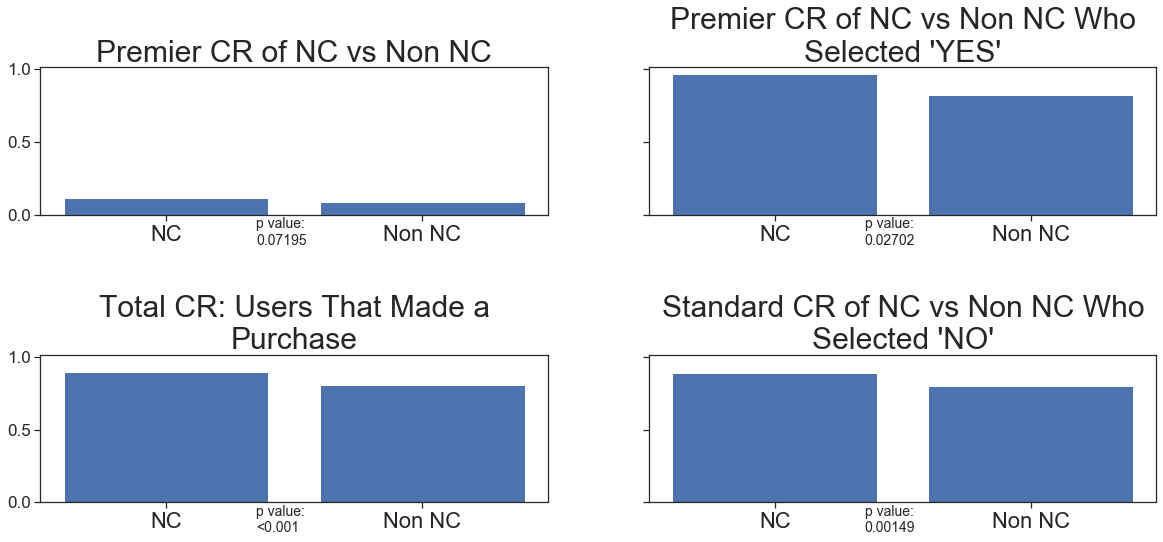

____________________________________________________________________________________________________


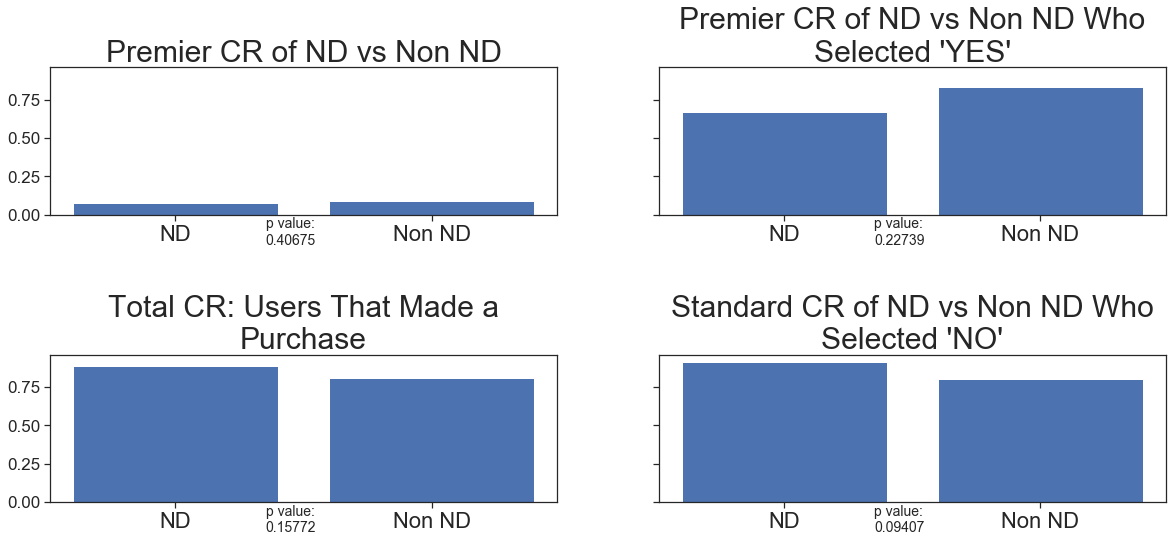

____________________________________________________________________________________________________


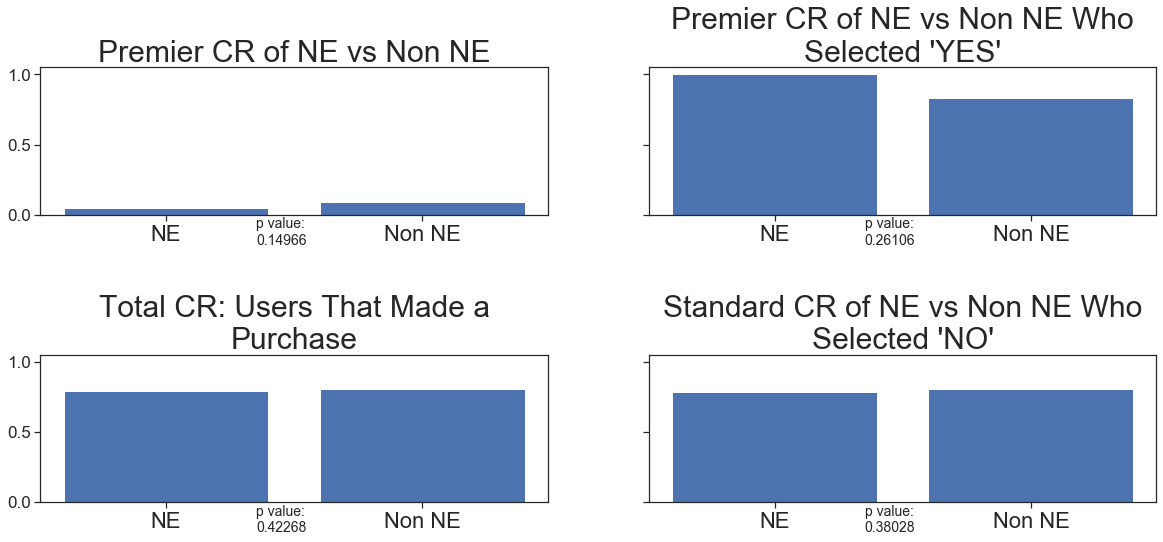

____________________________________________________________________________________________________


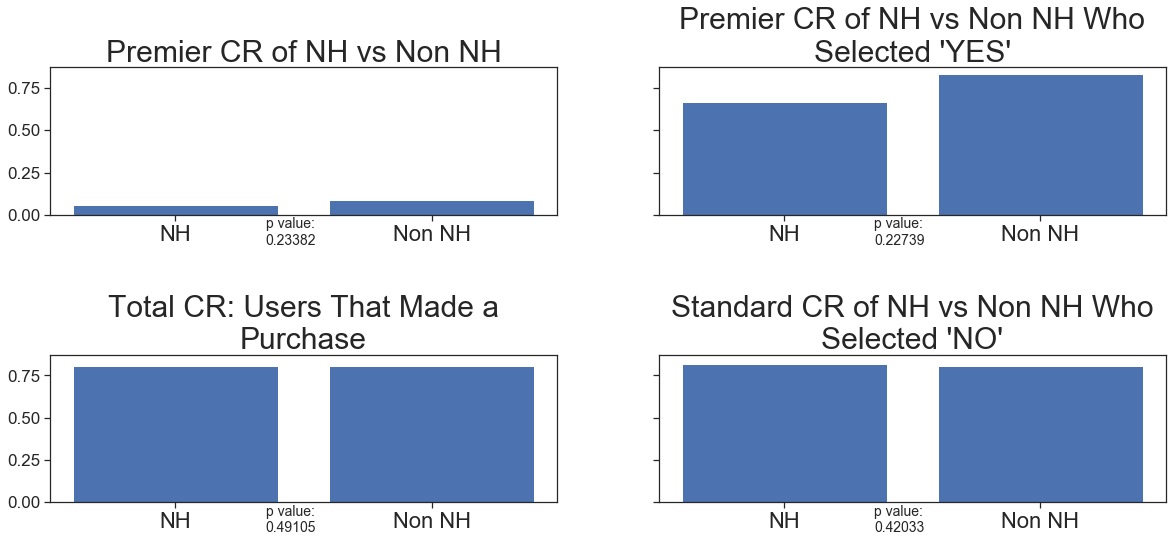

____________________________________________________________________________________________________


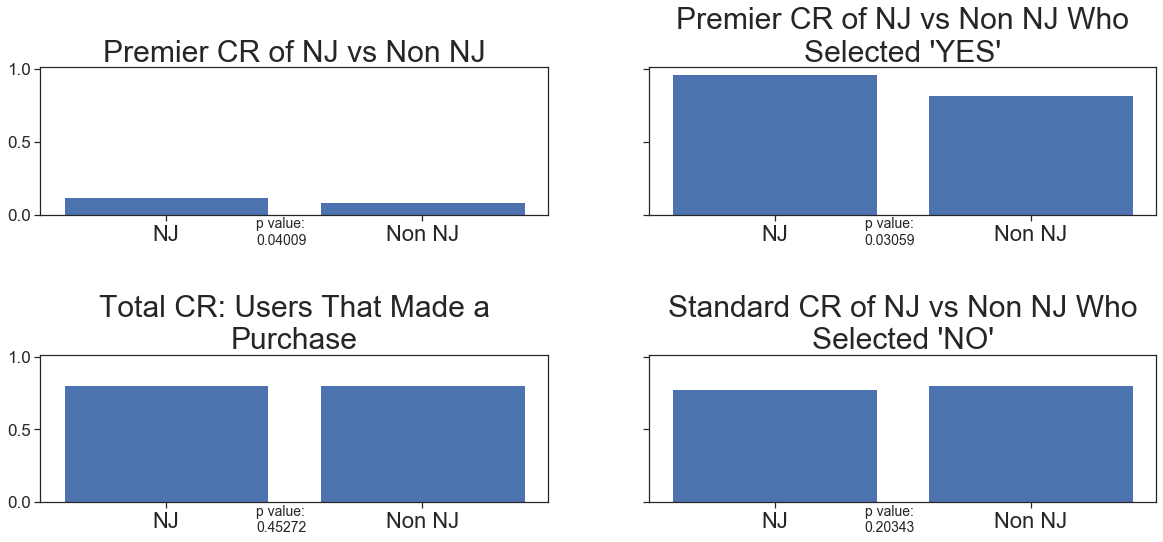

____________________________________________________________________________________________________


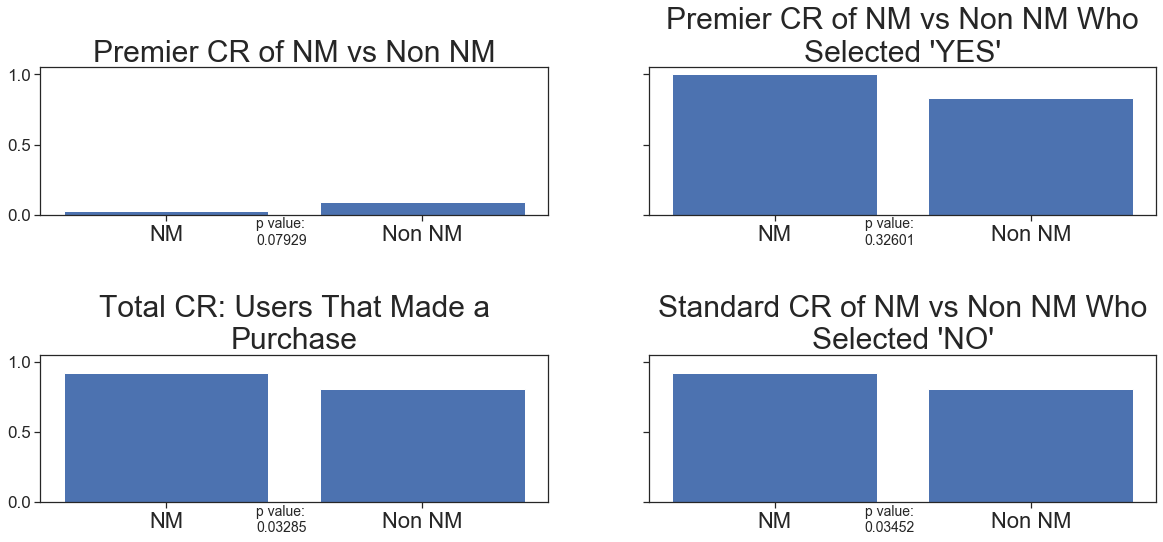

____________________________________________________________________________________________________


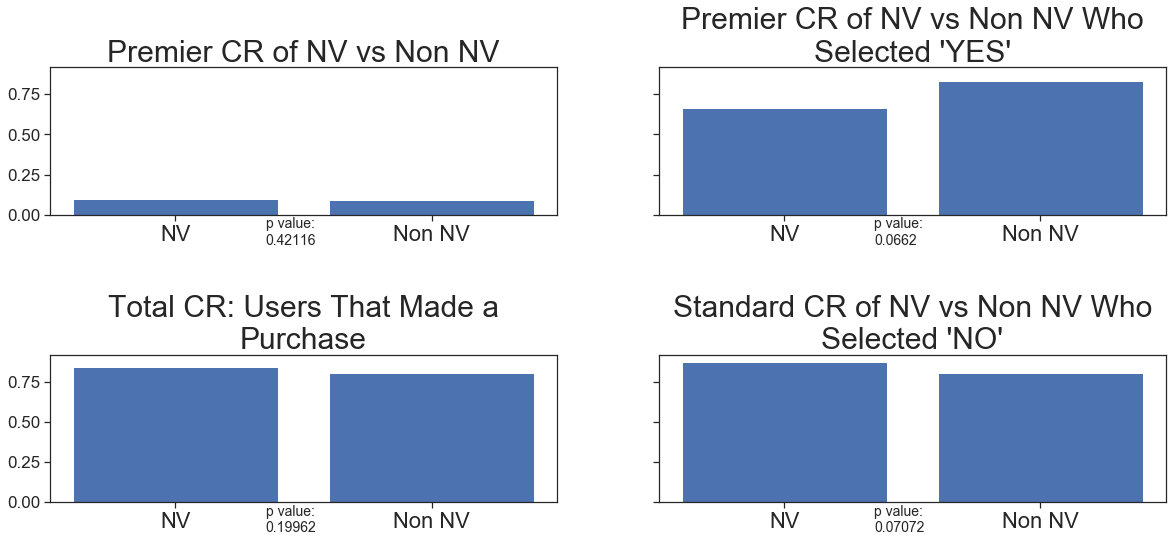

____________________________________________________________________________________________________


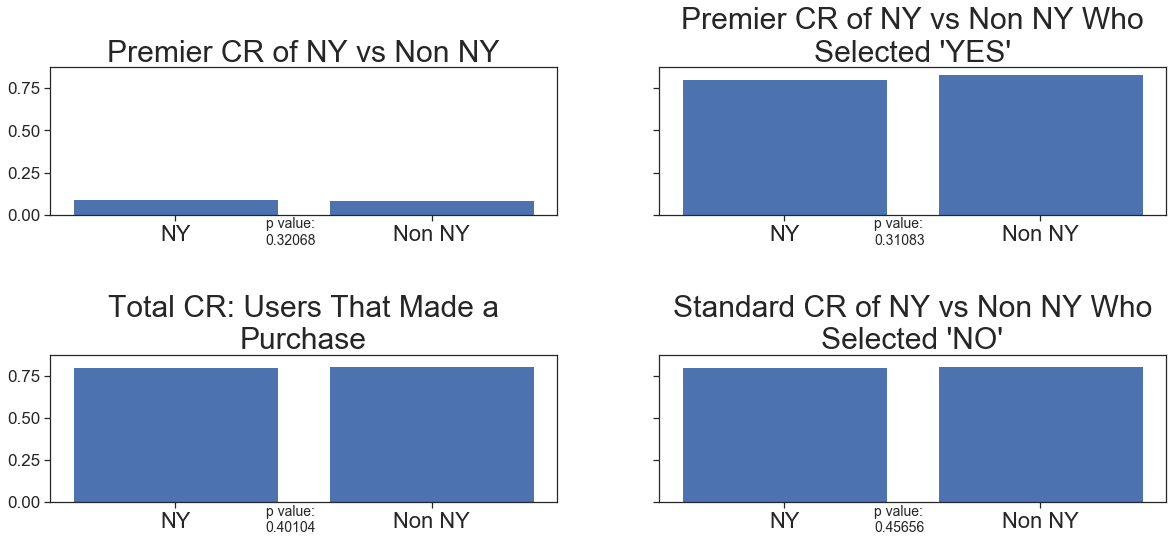

____________________________________________________________________________________________________


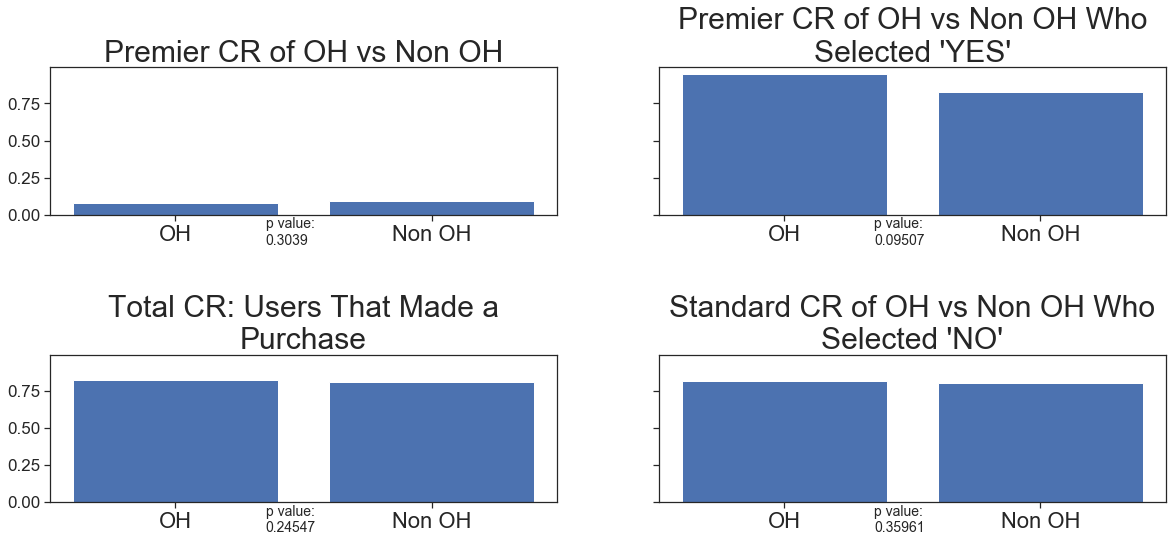

____________________________________________________________________________________________________


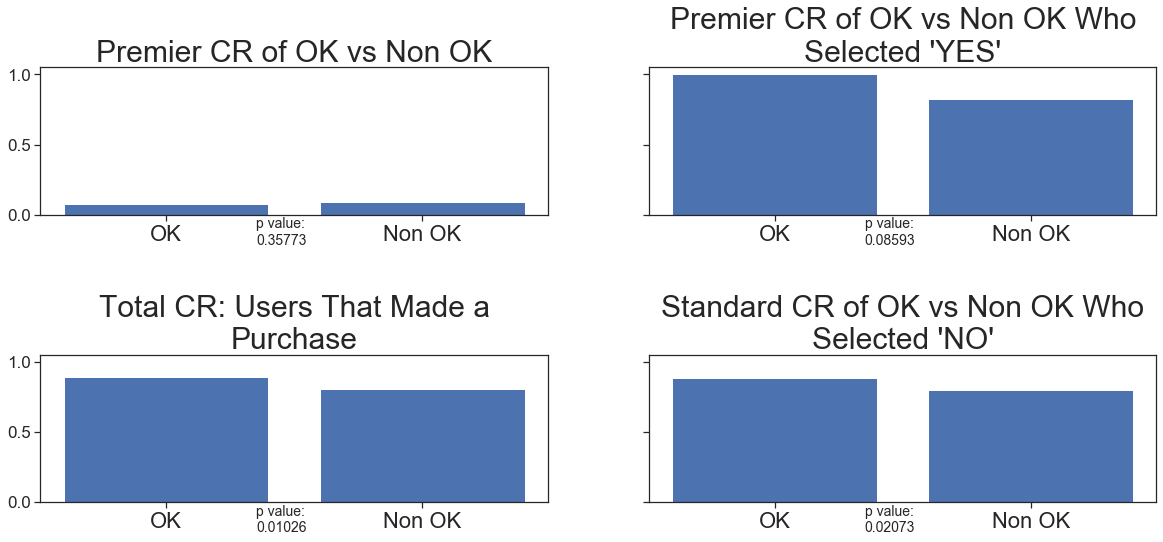

____________________________________________________________________________________________________


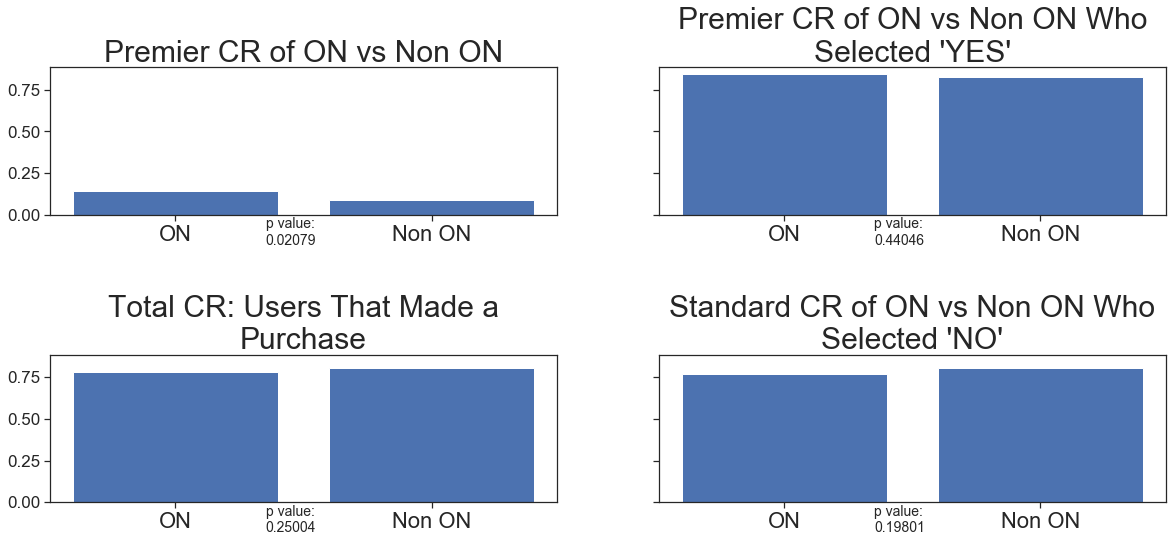

____________________________________________________________________________________________________


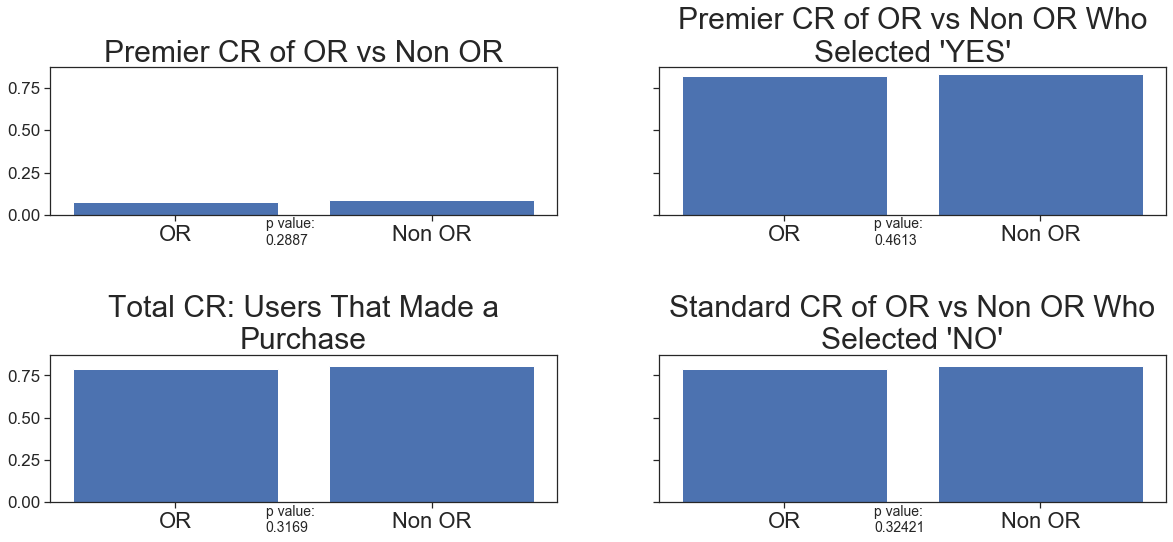

____________________________________________________________________________________________________


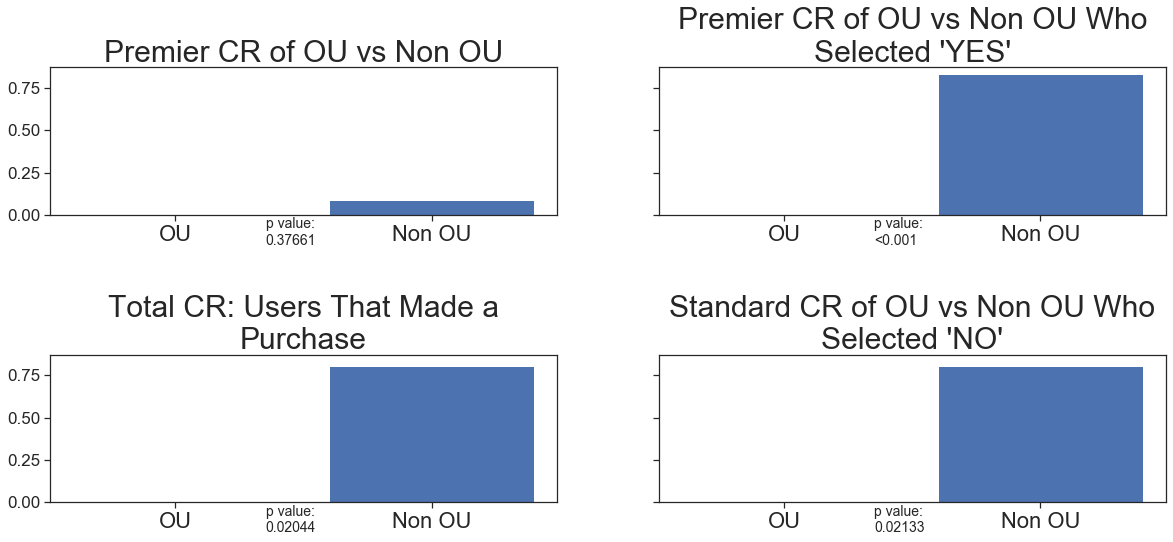

____________________________________________________________________________________________________


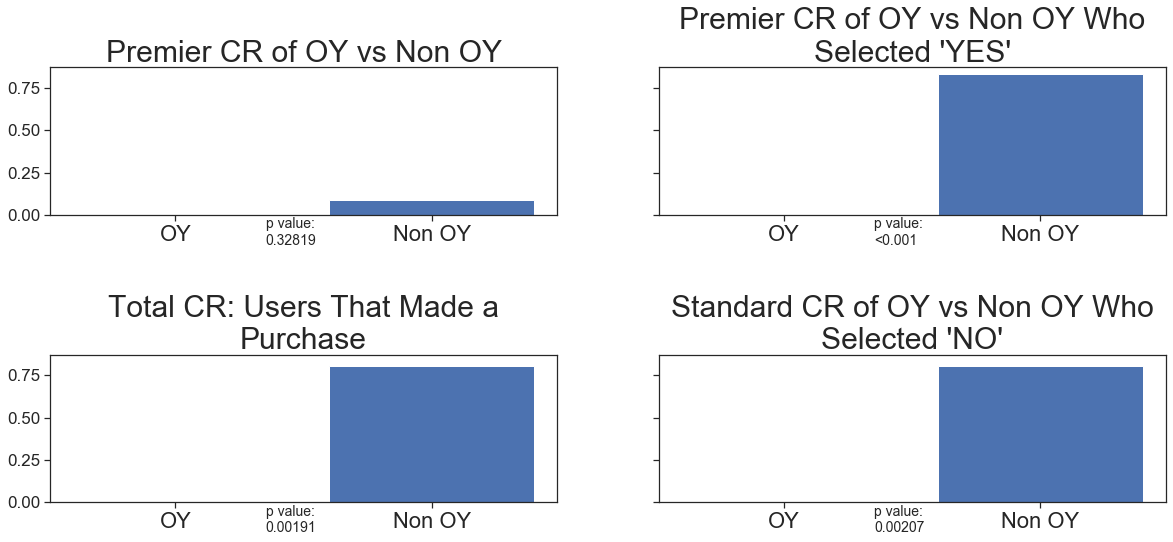

____________________________________________________________________________________________________


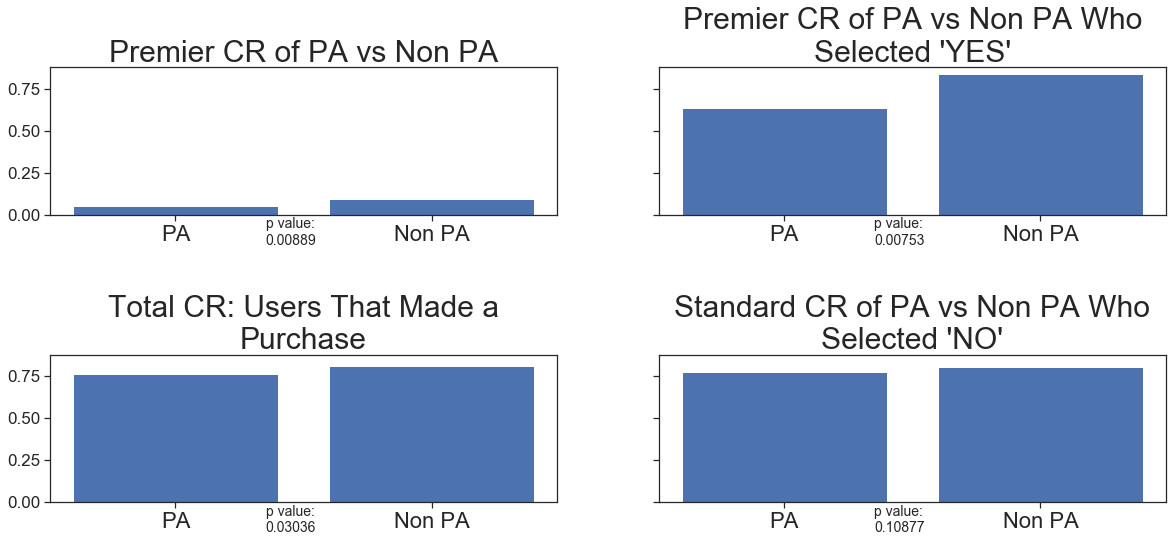

____________________________________________________________________________________________________


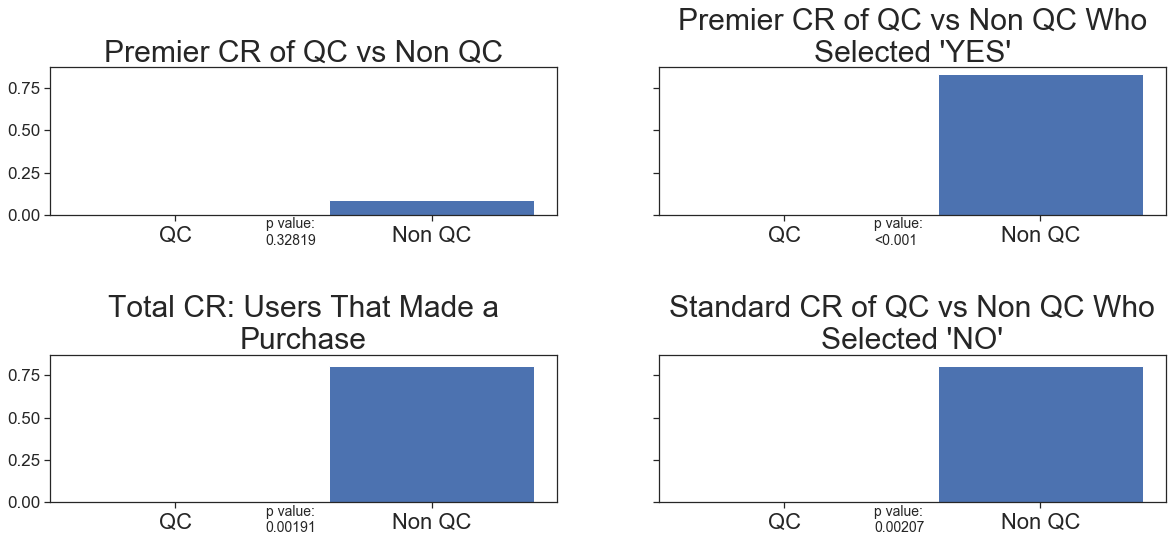

____________________________________________________________________________________________________


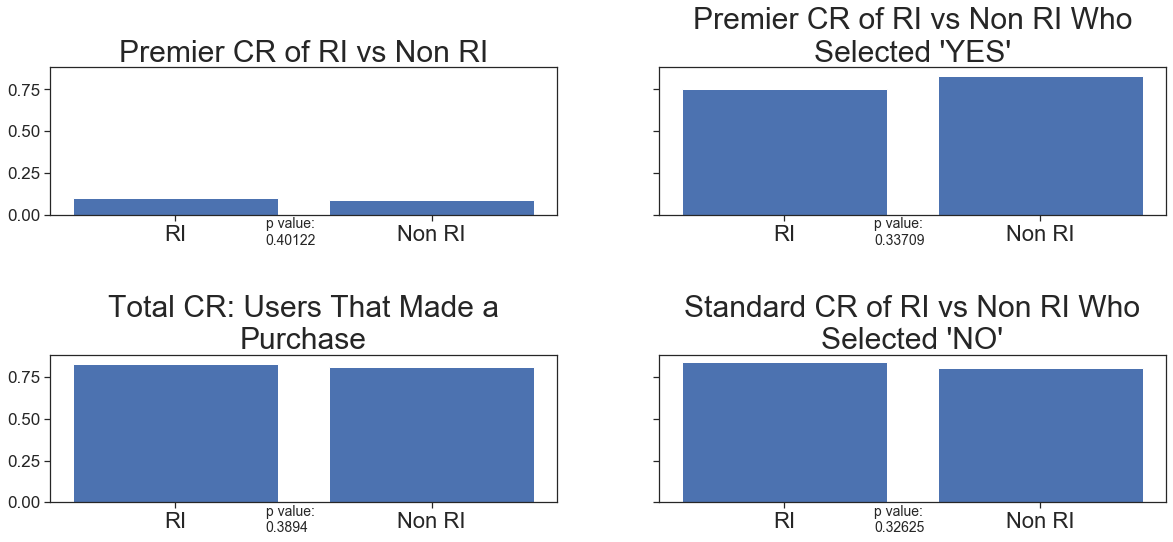

____________________________________________________________________________________________________


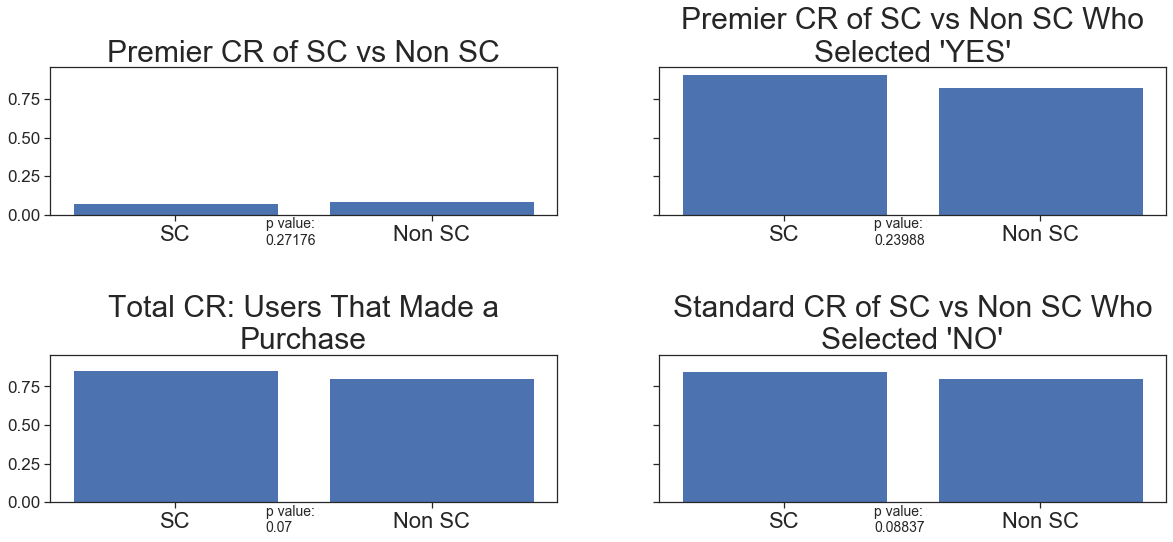

____________________________________________________________________________________________________


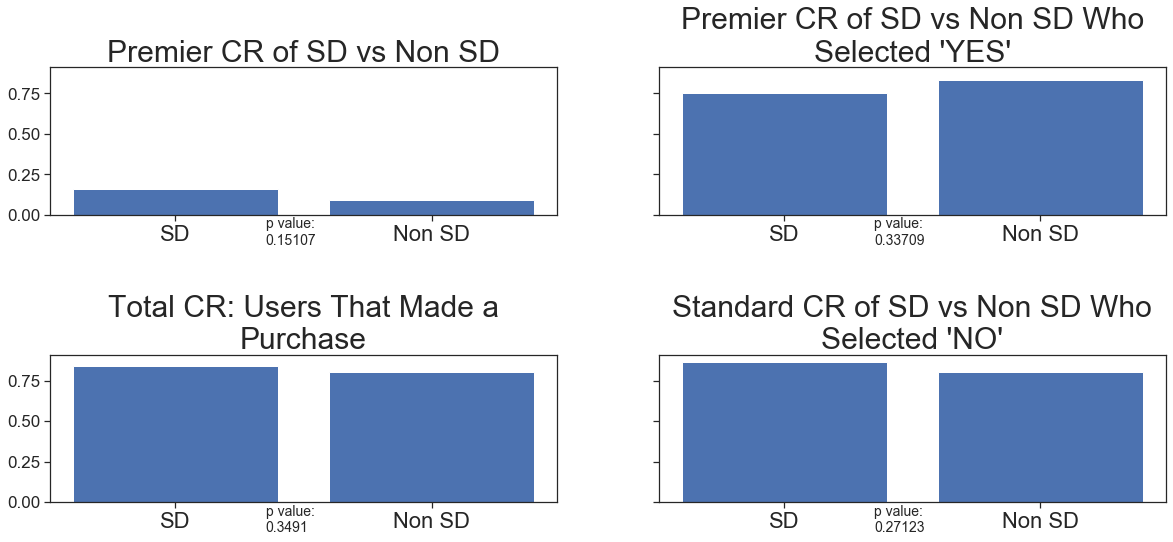

____________________________________________________________________________________________________


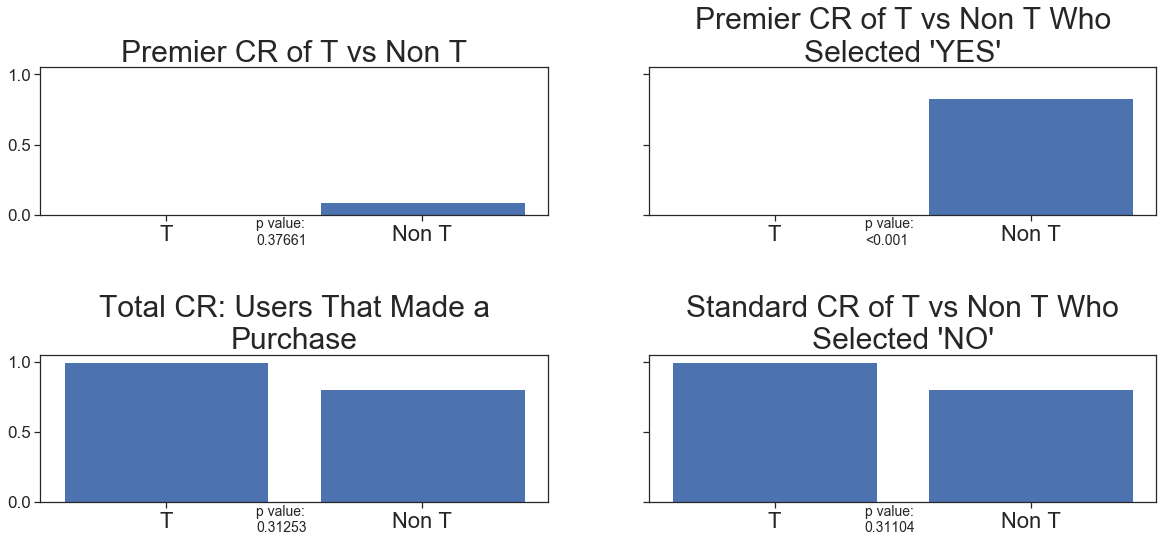

____________________________________________________________________________________________________


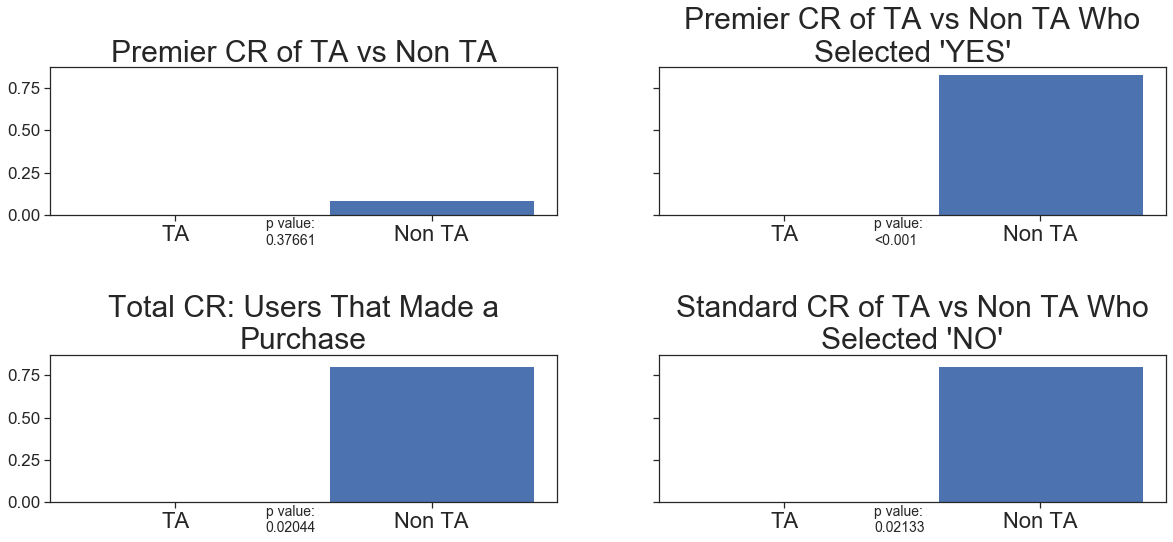

____________________________________________________________________________________________________


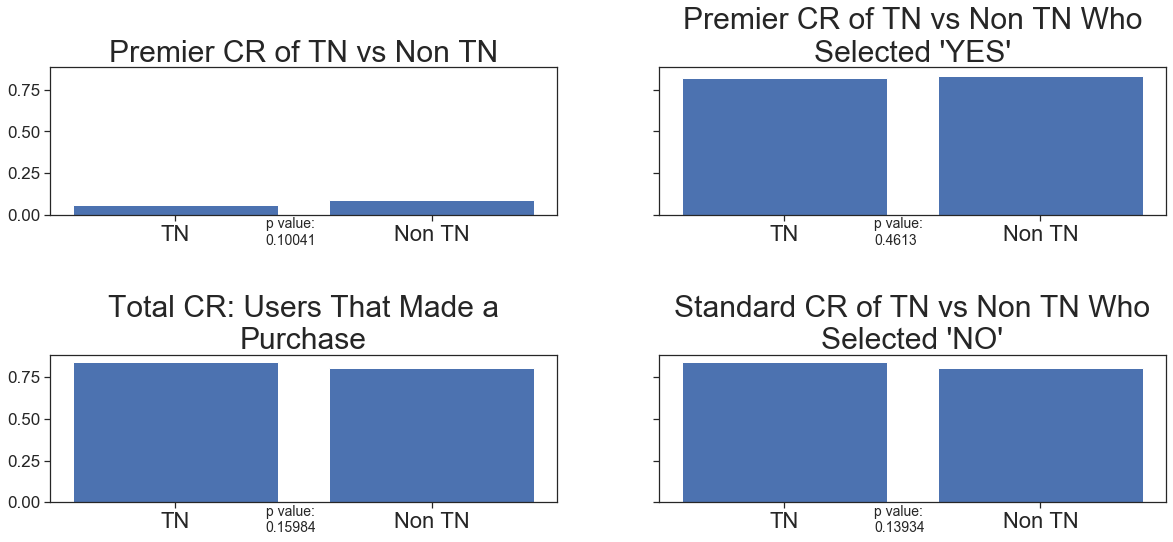

____________________________________________________________________________________________________


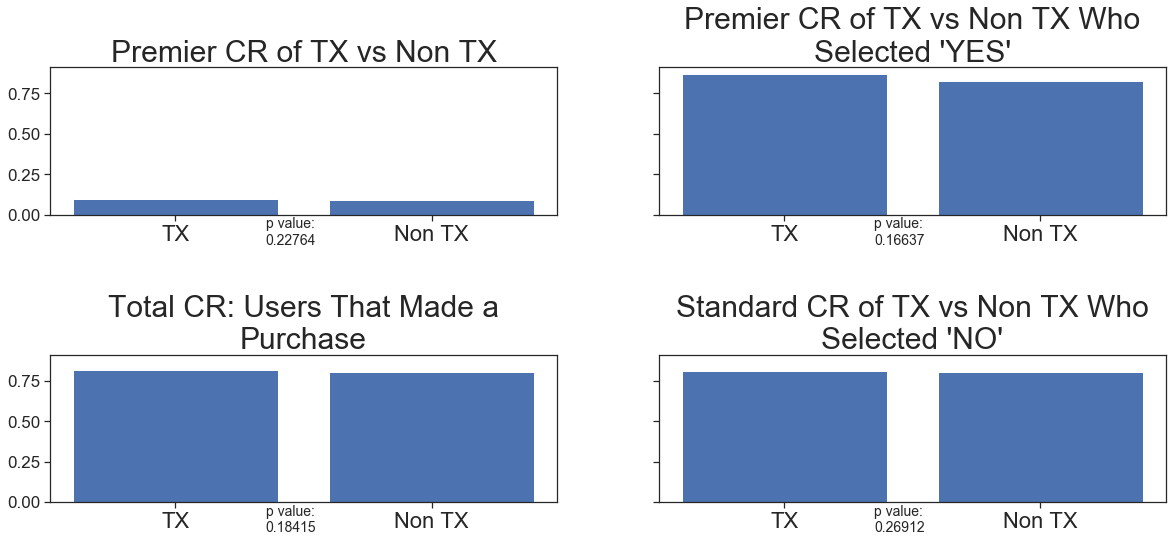

____________________________________________________________________________________________________


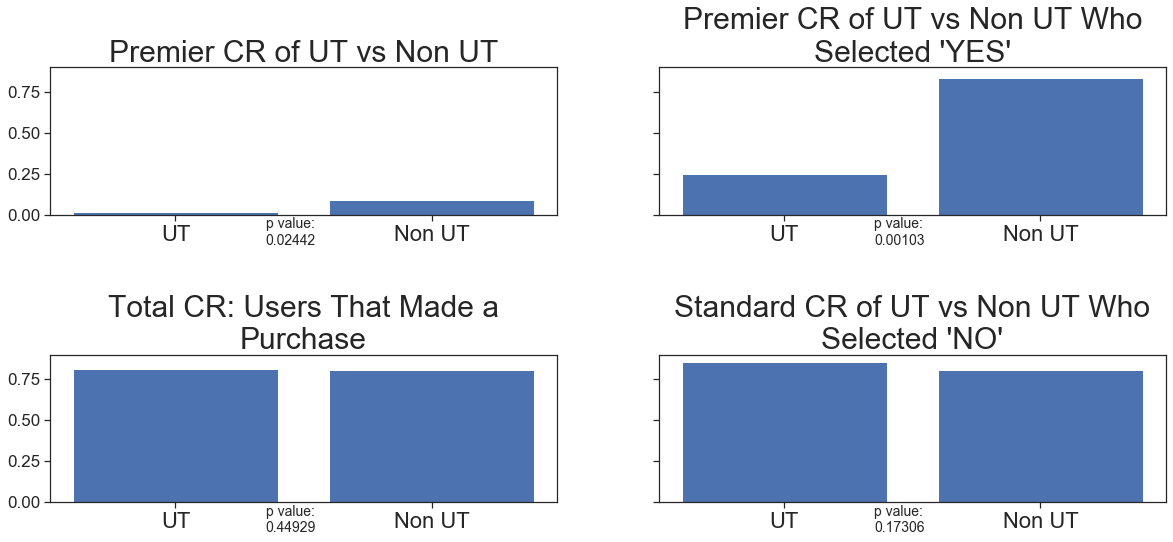

____________________________________________________________________________________________________


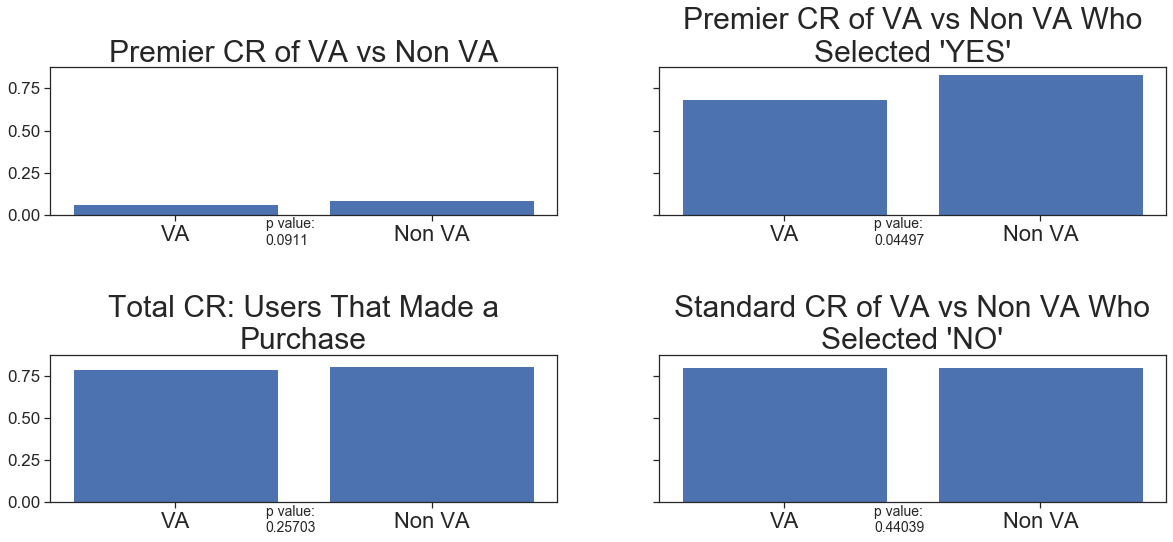

____________________________________________________________________________________________________


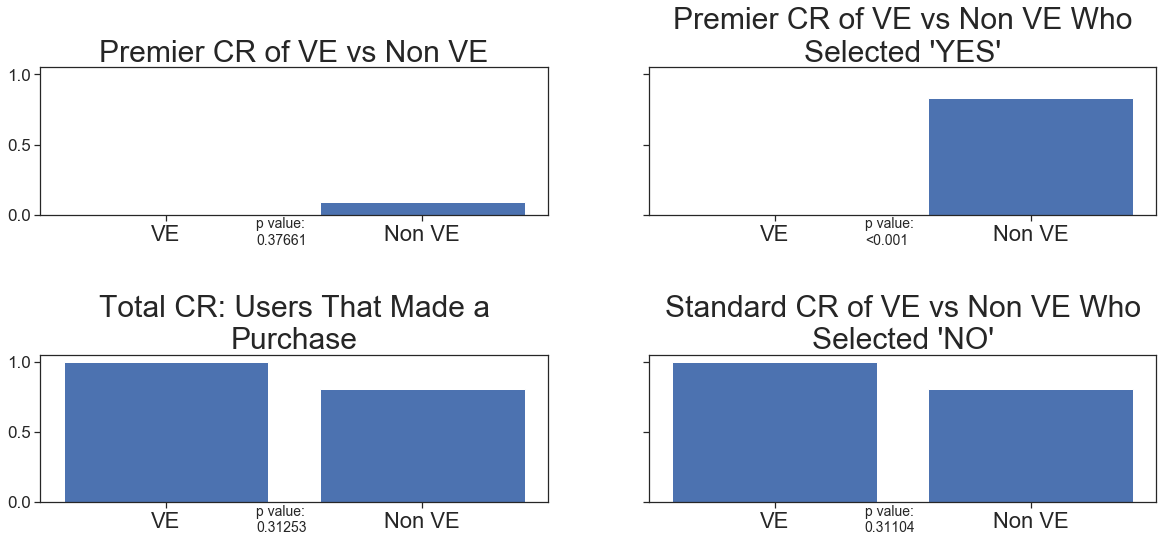

____________________________________________________________________________________________________


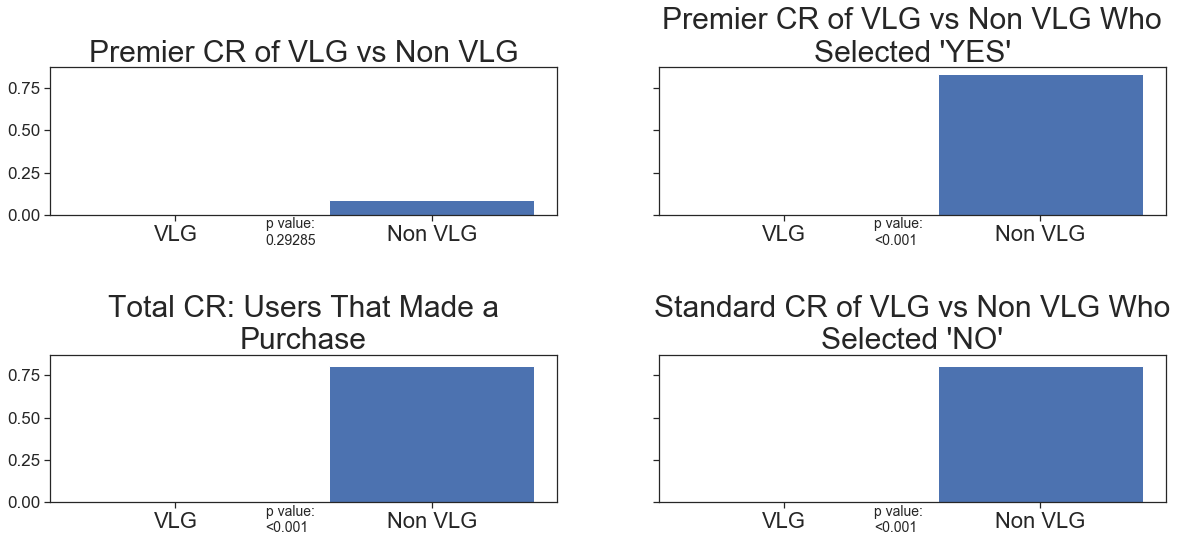

____________________________________________________________________________________________________


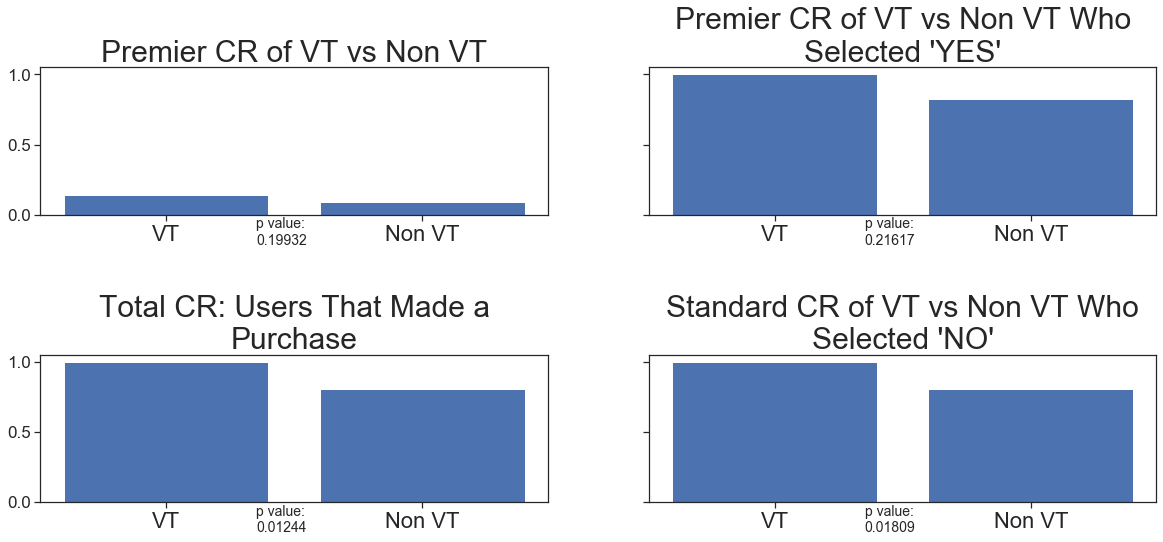

____________________________________________________________________________________________________


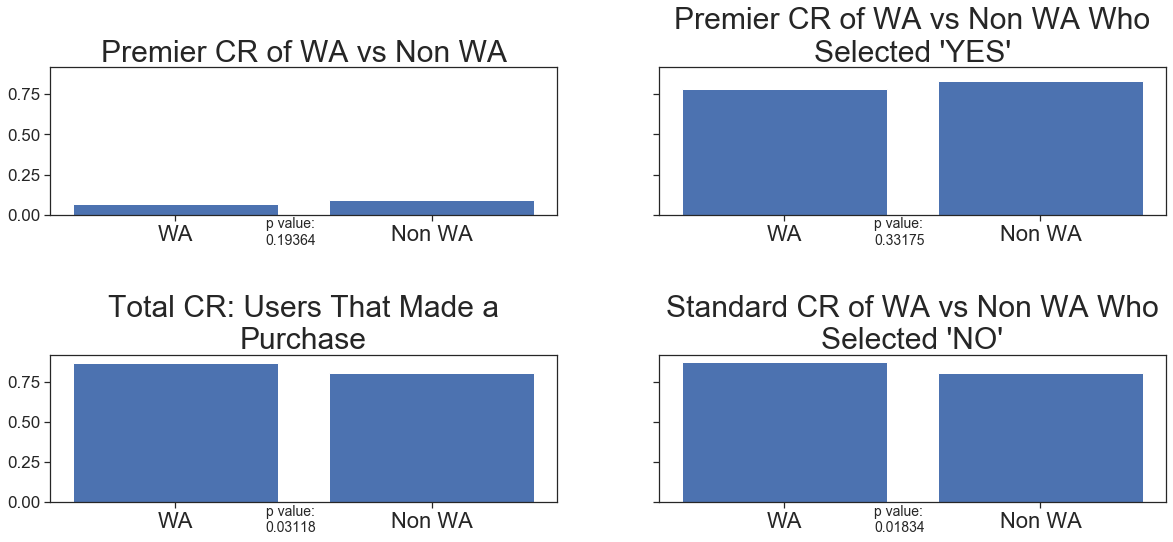

____________________________________________________________________________________________________


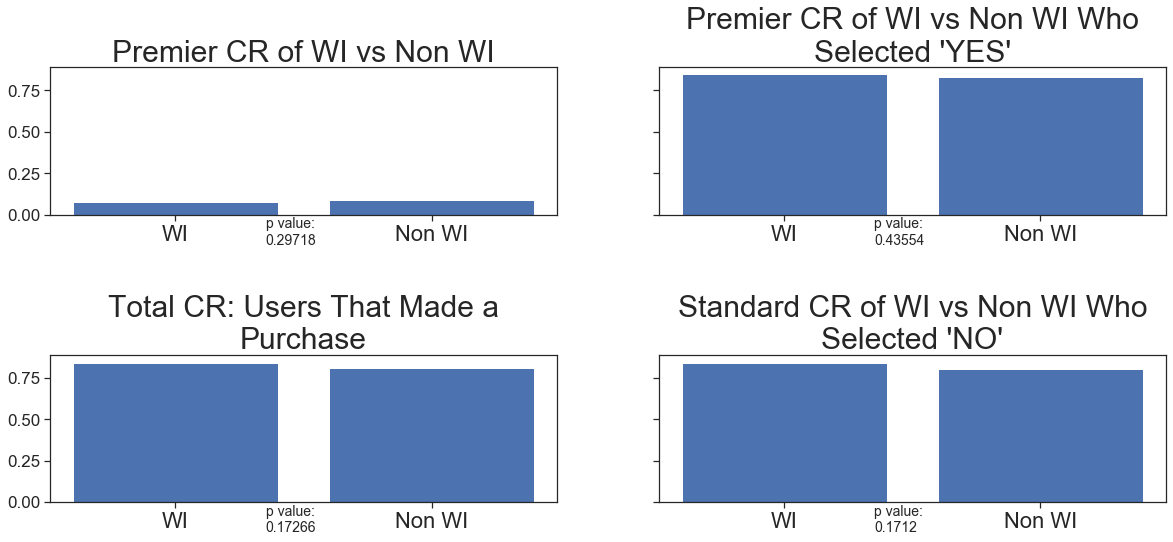

____________________________________________________________________________________________________


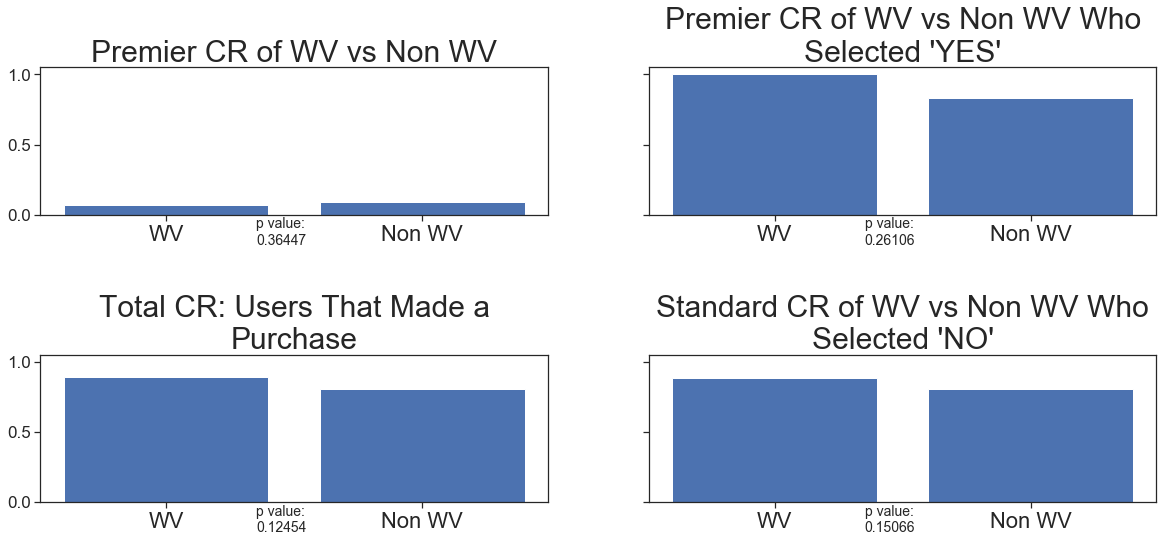

____________________________________________________________________________________________________


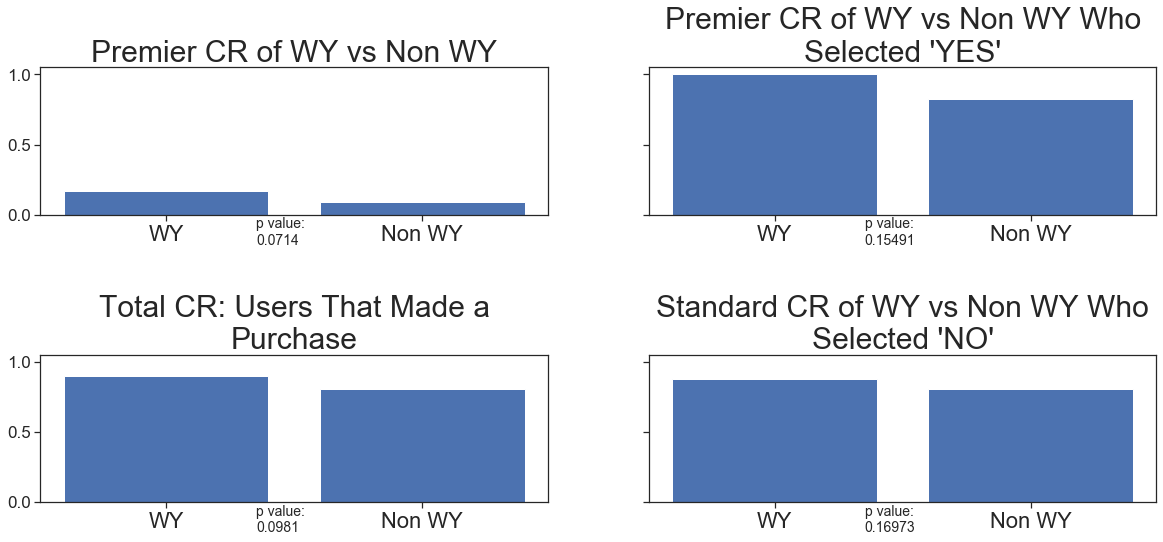

____________________________________________________________________________________________________


In [7]:
for col in binary_cols:
    plot_comparisons(col)
    print('____________________________________________________________________________________________________')

In [288]:
column = 'landpage-hiking'

said_yes_conversion_rate_binary(column)

(1.0, 0.8290598290598291)

In [289]:
df[(df[column]==1)&(df['yes_upgrade_flag']==1)&(df['upgrade_and_purchase']==1)]
df[(df[column]==1)&(df['yes_upgrade_flag']==1)]
df[(df[column]==0)&(df['yes_upgrade_flag']==1)&(df['upgrade_and_purchase']==1)]
df[(df[column]==0)&(df['yes_upgrade_flag']==1)]



source_visitor_id  visit_num  First_Visit  \
21    5268009166666670000000000000000000000          5            0   
26    5268050000000000000000000000000000000         10            0   
29    5268074500000000000000000000000000000         96            0   
31    5268090833333330000000000000000000000          3            0   
49    5268237833333330000000000000000000000          3            0   
...                                     ...        ...          ...   
8605  5337866833334640000000000000000000000          3            0   
8607  5337883166667970000000000000000000000          1            1   
8608  5337891333334640000000000000000000000          1            1   
8610  5337907666667970000000000000000000000          1            1   
8617  5337964833334640000000000000000000000          2            0   

                     date   min_timestamp_date min_timestamp_time  \
21    2016-11-29 00:00:00  2016-11-29 00:00:00           14:08:55   
26    2016-12-13 00:00:00  2016-12-13 00:00:00           09:58:45   
29    2016-12-06 00:00:00  2016-12-06 00:00:00           15:43:27   
31    2016-12-05 00:00:00  2016-12-05 00:00:00           09:28:59   
49    2016-11-21 00:00:00  2016-11-21 00:00:00           12:46:25   
...                   ...                  ...                ...   
8605  2017-04-19 00:00:00  2017-04-19 00:00:00           12:37:45   
8607  2017-04-19 00:00:00  2017-04-19 00:00:00           12:54:50   
8608  2017-04-19 00:00:00  2017-04-19 00:00:00           12:54:45   
8610  2017-04-19 00:00:00  2017-04-19 00:00:00           13:26:29   
8617  2017-07-10 00:00:00  2017-07-10 00:00:00           08:31:04   

            max_timestamp                         Recipe  purchase_flag  \
21    2016-11-29 14:15:00  Recipe B | Upgrade Suggestive              1   
26    2016-12-13 10:11:00  Recipe B | Upgrade Suggestive              1   
29    2016-12-06 16:25:00  Recipe B | Upgrade Suggestive              1   
31    2016-12-05 10:13:00  Recipe B | Upgrade Suggestive              1   
49    2016-11-21 13:06:00  Recipe B | Upgrade Suggestive              1   
...                   ...                            ...            ...   
8605  2017-04-19 12:52:00  Recipe B | Upgrade Suggestive              1   
8607  2017-04-19 13:50:00  Recipe B | Upgrade Suggestive              0   
8608  2017-04-19 13:37:00  Recipe B | Upgrade Suggestive              1   
8610  2017-04-19 13:34:00  Recipe B | Upgrade Suggestive              1   
8617  2017-07-10 09:00:00  Recipe B | Upgrade Suggestive              1   

      no_thanks_flag  ...  TX  UT  VA VE VLG VT WA  WI  WV  WY  
21                 0  ...   0   0   0  0   0  0  0   0   0   0  
26                 0  ...   0   0   0  0   0  0  0   0   0   0  
29                 0  ...   1   0   0  0   0  0  0   0   0   0  
31                 0  ...   0   0   0  0   0  0  0   0   0   0  
49                 0  ...   0   0   0  0   0  0  0   0   0   0  
...              ...  ...  ..  ..  .. ..  .. .. ..  ..  ..  ..  
8605               0  ...   0   0   0  0   0  0  0   0   0   0  
8607               0  ...   0   0   0  0   0  0  0   0   0   0  
8608               0  ...   1   0   0  0   0  0  0   0   0   0  
8610               0  ...   0   0   0  0   0  0  0   0   0   0  
8617               0  ...   0   0   0  0   0  0  0   0   0   0  

[936 rows x 175 columns]

In [400]:
column = 'landpage-hiking'

column_purchases = df[(df[column]==1)&(df['yes_upgrade_flag']==1)]['upgrade_and_purchase']
non_column_purchases = df[(df[column]==0)&(df['yes_upgrade_flag']==1)]['upgrade_and_purchase']
MannWhitneyU(non_column_purchases,column_purchases)

MannwhitneyuResult(statistic=388.0, pvalue=0.3260134543732214)

In [401]:
# Compare the Loyalty users vs the Non Loyalty users conversion rates who clicked yes

MannWhitneyU(non_column_purchases,column_purchases)[1]

0.3260134543732214

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8618 entries, 0 to 8617
Columns: 175 entries, source_visitor_id to WY
dtypes: bool(1), float64(10), int64(147), object(17)
memory usage: 11.5+ MB


In [9]:
df['review_order_flag'].sum()

8608

In [311]:
for col in binary_cols:
    print(col)
    print(df[(df[col]==1)&(df['yes_upgrade_flag']==1)&].shape[0])

First_Visit
317
loyalty_user
121
camp_page_flag
238
hiking__page_flag
232
kayak_page_flag
54
run_page_flag
24
deals_page_flag
11
winter_page_flag
14
snow_page_flag
30
socks+hiking_flag
23
landpage-hiking
1
landpage camping
1
landpage run
1
loyalty_user
121
landpage winter
121
SEO
587
SEM
350
login_page_flag
0
review_order_flag
937
OpS_Android
8
OpS_Chrome_OS
0
OpS_iOS
9
OpS_Linux
0
OpS_Mac OS X
143
OpS_Ubuntu
0
OpS_Windows 10
371
OpS_Windows_7
341
OpS_Windows8
10
OpS_Windows_8.1
48
OpS_Windows_Vista
4
OpS_Windows_XP
3
***
72
3
1
40
0
AB
0
AK
0
AL
14
AR
7
AZ
15
BC
0
BY
0
C
0
CA
133
CO
23
CT
14
DC
10
DE
6
DL
0
ENG
0
FL
51
GA
37
GJ
0
GP
0
HI
4
IA
5
ID
1
IL
27
IN
17
KA
1
KS
3
KY
12
LA
21
MA
14
MD
17
ME
1
MI
11
MN
9
MO
16
MS
9
MT
2
NC
28
ND
3
NE
2
NH
3
NJ
27
NM
1
NV
12
NY
51
OH
18
OK
9
ON
19
OR
11
OU
0
OY
0
PA
22
QC
0
RI
4
SC
11
SD
4
T
0
TA
0
TN
11
TX
83
UT
4
VA
19
VE
0
VLG
0
VT
3
WA
14
WI
13
WV
2
WY
5


In [18]:
# Setting X and y for model training

X = df.iloc[:,np.r_[1, 2, 26, 30:41, 44, 45:72, 73:80, 92:175]]
y = df['upgrade_and_purchase']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# Manual upsampling
t_df = pd.concat([X_train,y_train], axis=1, sort=False) # t_df stands for train dataframe
upgraded_t_df = t_df[t_df['upgrade_and_purchase'] == 1]
not_upgraded_t_df = t_df[t_df['upgrade_and_purchase'] == 0].sample(frac=1, random_state=0).reset_index(drop=True)[:(4*len(upgraded_t_df))]

train_frame = pd.concat([upgraded_t_df, upgraded_t_df, upgraded_t_df, upgraded_t_df, not_upgraded_t_df]).sample(frac=1, random_state=0).reset_index(drop=True)

X_resampled = train_frame.drop('upgrade_and_purchase', axis=1, inplace=False)
y_resampled = train_frame['upgrade_and_purchase']

In [241]:
# Training another Random Forest Classifier with default hyper parameters

clf = RandomForestClassifier()

clf.fit(X_resampled, y_resampled)



y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.8553750966744006

In [197]:
# Training a Random Forest Classifier with set hyper paramaters

clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_resampled, y_resampled)



y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)


0.848414539829853

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_of_interest = ['time_before_popup', 'hits_before_popup', 'pageviews_before_popup','visit_num']
X_scaled = scaler.fit_transform(X_resampled[cols_of_interest])


# Scale and use log loss

clf = LogisticRegression()

clf.fit(X_scaled, y_resampled)

coef = clf.coef_

y_pred = clf.predict(scaler.transform(X_test[cols_of_interest]))

accuracy_score(y_test, y_pred)

0.6689868522815159

In [243]:
X_resampled.head()

visit_num  First_Visit  IPD  camp_page_flag  hiking__page_flag  \
0        113            0    0               0                  1   
1          3            0    0               0                  0   
2        852            0    0               0                  0   
3          1            1    0               0                  0   
4          1            1    0               0                  0   

   kayak_page_flag  run_page_flag  deals_page_flag  winter_page_flag  \
0                0              0                1                 0   
1                1              0                0                 0   
2                0              0                0                 0   
3                0              0                0                 0   
4                0              0                0                 0   

   snow_page_flag  ...  TX  UT  VA  VE  VLG  VT  WA  WI  WV  WY  
0               0  ...   0   0   0   0    0   0   0   0   0   0  
1               0  ...   0   0   0   0    0   0   0   0   0   0  
2               0  ...   0   0   0   0    0   0   0   0   0   0  
3               0  ...   0   0   0   0    0   0   0   0   0   0  
4               0  ...   0   0   0   0    0   0   0   0   0   0  

[5 rows x 132 columns]

In [245]:
pd.set_option('display.max_rows', None)
pd.DataFrame(data=[coef[0]],columns=list(X_resampled[cols_of_interest].columns)).T.sort_values(0, ascending=False)

0
hits_before_popup       0.277357
time_before_popup       0.079033
visit_num              -0.007270
pageviews_before_popup -0.134287

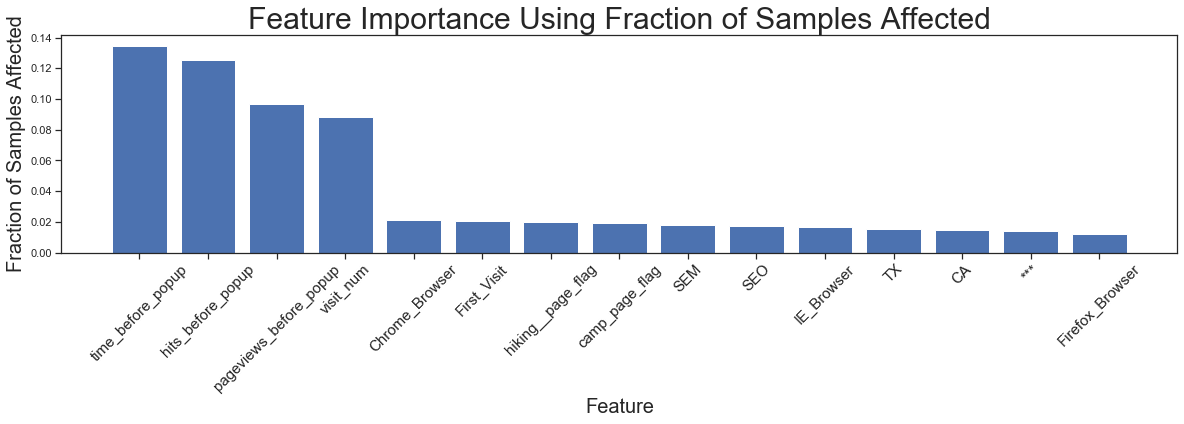

In [199]:
# Plotting the feature importance of the recent Random Forest model (clf)
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : clf.feature_importances_},
                           index=X_resampled.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected', ascending = False)

plt.figure(figsize=(20, 4))
plt.xticks(rotation=45, fontsize=15)
plt.title('Feature Importance Using Fraction of Samples Affected',fontsize=30)
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Fraction of Samples Affected',fontsize=20)
plt.bar(feat_scores[:15].index,
       feat_scores[:15]['Fraction of Samples Affected'].values)
plt.show()

In [200]:
feat_scores[:10].index

Index(['time_before_popup', 'hits_before_popup', 'pageviews_before_popup',
       'visit_num', 'Chrome_Browser', 'First_Visit', 'hiking__page_flag',
       'camp_page_flag', 'SEM', 'SEO'],
      dtype='object')

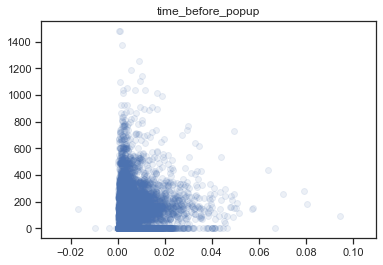

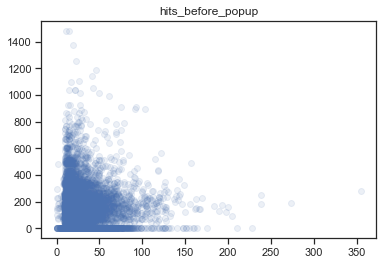

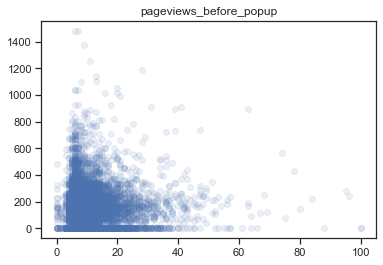

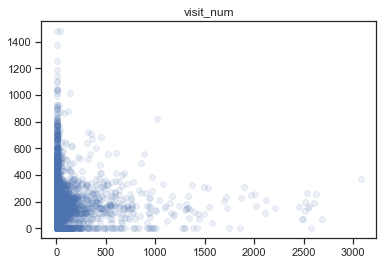

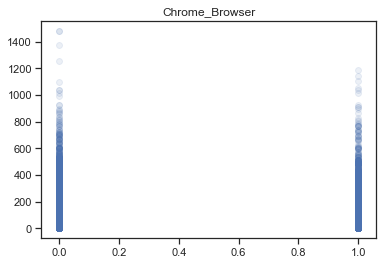

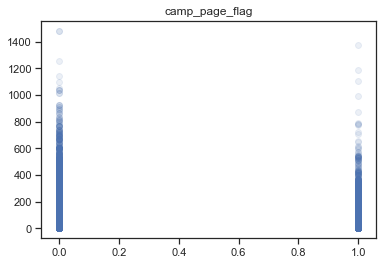

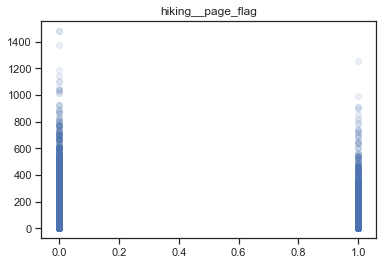

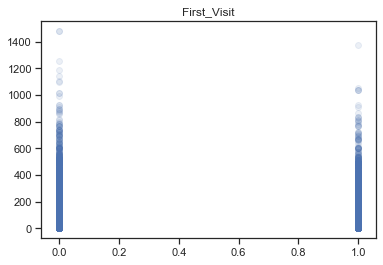

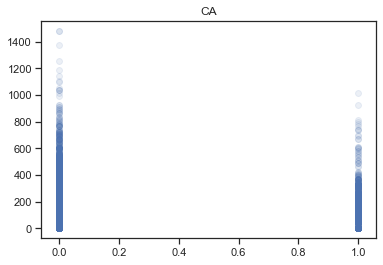

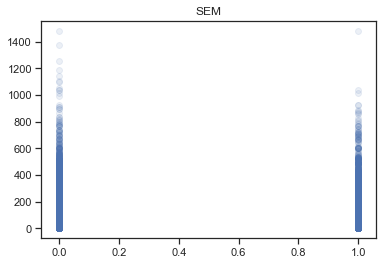

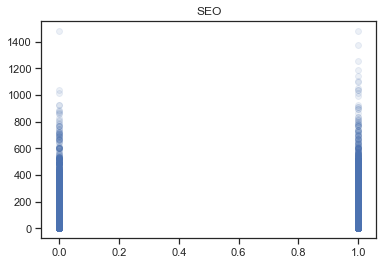

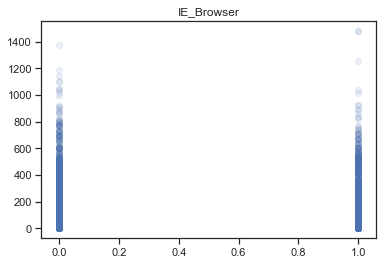

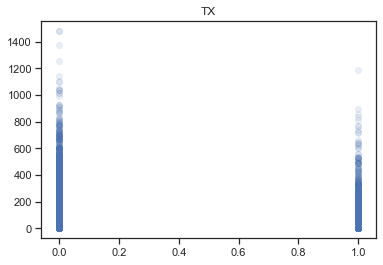

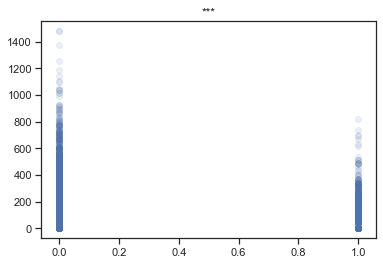

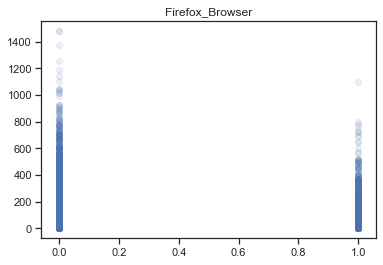

In [191]:
for col in feat_scores[:15].index:
    plt.figure()
    plt.title(col)
    plt.scatter(df[col],df['total_revenue'], alpha=.1)

In [181]:
feat_scores[:15].index

Index(['time_before_popup', 'hits_before_popup', 'pageviews_before_popup',
       'visit_num', 'Chrome_Browser', 'camp_page_flag', 'hiking__page_flag',
       'First_Visit', 'CA', 'SEM', 'SEO', 'IE_Browser', 'TX', '***',
       'Firefox_Browser'],
      dtype='object')

In [201]:
# Testing multiple models using the upsampled data and cross-validating

models = []
models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
rf2 = RandomForestClassifier(n_estimators=100, criterion='gini',
                                max_depth=10, random_state=0, max_features=None)
models.append(("RandomForest2",rf2))
models.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=0)))

results = []
names = []
for name,model in models:
    result = cross_val_score(model, X_resampled, y_resampled,  cv=3)
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

LogisticRegression 0.5559803492741818
SVC 0.5433268638224199
LinearSVC 0.5513817688608963
KNeighbors 0.6274905025241679
RandomForest 0.9240777638299856
RandomForest2 0.7524925704295486
MLPClassifier 0.5


### Testing Random Forest with just top 10 featured based on importance

In [122]:
# Training a Random Forest Classifier 

feature_num = 10

clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_resampled[feat_scores[:feature_num].index], y_resampled)



y_pred = clf.predict(X_test[feat_scores[:feature_num].index])

accuracy_score(y_test, y_pred)




0.7045630317092034

In [ ]:
from sklearn.linear_model import LogisticRegression



## Identifying the conversion rates of the useres who selected "yes" and useres who selected "no" after their selection.

In [134]:
num_useres_responded_yes = df[df['yes_upgrade_flag'] == 1].count()[0]
num_useres_responded_yes

937

In [136]:
num_useres_responded_yes_and_purchased = df[(df['yes_upgrade_flag'] == 1) & (df['purchase_flag'] == 1)].count()[0]
num_useres_responded_yes_and_purchased

777

In [137]:
num_useres_responded_yes_and_purchased / num_useres_responded_yes

0.8292422625400213

In [140]:
# Checking to see that the upgrade and purchase column aligns with the data that the yes upgrade and purchase flag data
df[df['upgrade_and_purchase'] == 1].count()[0] == df[(df['yes_upgrade_flag'] == 1) & (df['purchase_flag'] == 1)].count()[0]

True

### 82% of the useres who responded yes to the prompt, purchased an item.

In [156]:
df[(df['no_thanks_flag'] == 1) & (df['purchase_flag'] == 1)].count()[0] / df[df['no_thanks_flag'] == 1].count()[0]

0.8828213879408419

### 88% of the useres who responded "no" to the prompt, purchased an item.

In [161]:
df[(df['hit either yes or no'] == 1) & (df['purchase_flag'] == 1)].count()[0] / df[df['hit either yes or no'] == 1].count()[0]

0.8758062476286834

### 87% of users who responded to the prompt purchased an item

In [178]:
df[(df['hit either yes or no'] == 0) & (df['purchase_flag'] == 1)].count()[0] / df[df['hit either yes or no'] == 0].count()[0]

0.0

### 0% of the users who did not respond to the prompt purchased an item

In [179]:
# revenue per order of people who responded yes or no to prompt

In [180]:
# revenue per order of people who responded yes or no to prompt
# Why is it working for the hiking products

In [159]:
df[(df['hit either yes or no'] == 0) & (df['purchase_flag'] == 1)].count()[0]

0

In [166]:
df[(df['hit either yes or no'] == 1) & (df['purchase_flag'] < 3)].count()[0]

7907

In [167]:
df[(df['hit either yes or no'] == 0) & (df['purchase_flag'] < 3)].count()[0]

680

In [168]:
len(df)

8618

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.base import clone
from rfpimp import *

import warnings
warnings.filterwarnings('ignore')

def mkdf(columns, importances):
    I = pd.DataFrame(data={'Feature':columns, 'Importance':importances})
    I = I.set_index('Feature')
    I = I.sort_values('Importance', ascending=False)
    return I

In [175]:
from sklearn.ensemble.forest import _generate_unsampled_indices

def oob_classifier_accuracy(rf, X_train, y_train):
    X = X_train.values
    y = y_train.values

    n_samples = len(X)
    n_classes = len(np.unique(y))
    predictions = np.zeros((n_samples, n_classes))
    for tree in rf.estimators_:
        unsampled_indices = _generate_unsampled_indices(tree.random_state, n_samples)
        tree_preds = tree.predict_proba(X[unsampled_indices, :])
        predictions[unsampled_indices] += tree_preds

    predicted_class_indexes = np.argmax(predictions, axis=1)
    predicted_classes = [rf.classes_[i] for i in predicted_class_indexes]

    oob_score = np.mean(y == predicted_classes)
    return oob_score

def permutation_importances(rf, X_train, y_train, metric):
    """
    Return importances from pre-fit rf; metric is function
    that measures accuracy or R^2 or similar. This function
    works for regressors and classifiers.
    """
    baseline = metric(rf, X_train, y_train)
    imp = []
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col])
        m = metric(rf, X_train, y_train)
        X_train[col] = save
        imp.append(baseline - m)
    return np.array(imp)

In [176]:
base_rf = RandomForestClassifier(n_estimators=100,
                                 min_samples_leaf=5,
                                 n_jobs=-1,
                                 oob_score=True)


rf = clone(base_rf)

rf.fit(X_resampled, y_resampled)
oob = oob_classifier_accuracy(rf, X_resampled, y_resampled)
print("oob accuracy",oob)

imp = permutation_importances(rf, X_resampled, y_resampled,
                              oob_classifier_accuracy)
I = mkdf(X_resampled.columns,imp)
viz = plot_importances(I)

TypeError: _generate_unsampled_indices() missing 1 required positional argument: 'n_samples_bootstrap'